# <b>Lab 1</b>: Visualization & Data Preprocessing
# <center><font color='blue'>Student Exam Scores Extended Dataset</font></center> 
***
### <center><b> Team Members: </b> Joey Hernandez, Daniel Chang, and Vo Nguyen</center>

### <b>Table of Contents</b>
<a class="anchor" id="toc"></a>
* **[Business Understanding](#understand)**
* **[Data Understanding](#data)**
    * [Import Library](#import)
    * [Loading the Data](#load)
    * [Data Description](#description)  
* **[Data Quality](#quality)**
    * [Data Inspection](#inspect)
    * [Missing Values At A Glance](#missing)
    * [Missing Values Heatmap](#nanheatmap)
    * [Addressing Duplicates](#duplicate)
    * [Addressing Outliers](#duplicate)
* **[Data Summary Statistics](#summary)**
* **[Top Features | Data Visualization](#visual)**
    * [1) Gender](#one)
    * [2) Parent Education](#two)
    * [3) Ethnic Groups](#three)
    * [4) Test Prep](#four)
    * [5) Lunch Type](#five)
* **[Exploration of Attribute Relationships](#explore)**
     * [Cross Tabulation](#cross)
     * [Correlation Heatmaps](#heatmap)
     * [Visual Exploration](#plotting)
* **[Creating Additional Features](#possible)**
    * [Pass/Fail](#pass)
* **[Exceptional Work](#work)**
    * [Multiple Correspondence Analysis](#mca)
* **[Conclusion](#conclusion)**

<hr>

## <b>Business Understanding [↑](#toc)</b>
<a class="anchor" id="understand"></a>
The dataset (fictional) comprises scores from three tests of students at a public school, as well as personal and socio-economic factors that may have interaction effects. The purpose of collecting this data is to identify potential relationships between personal and socio-economic factors and test scores. By understanding which factors have the most significant impact on test scores, educators, parents, and students can focus their attention on variables that could potentially help students earn higher scores. This information can be used to inform educational policies and practices, as well as to develop targeted interventions to support students who may be struggling academically. Ultimately, the goal of collecting this data is to improve educational outcomes and promote academic success for all students.<br><br>
Student education and testing scores are critical to their future success. Education provides the foundation upon which students will build their future, and improving the efficiency of learning and testing experiences can have a positive impact on many students' futures. By analyzing the dataset, we can identify factors that influence student performance and develop strategies to improve academic outcomes.<br><br>
Our metric of success data mining process can be assessed with whether or not we are able to uncover patterns and/or significant relationships that help us to better understand student performance factors. This could include identifying significant predictors of test scores, understanding the impact of certain attributes on student scores, etc. By evaluating the results of our analyses in light of the original research questions, we can determine whether we have gained useful insights from our data mining process which can inform educational policies and practices and promote academic success for all students.<br><br>
To measure the effectiveness of a good prediction algorithm, we need to evaluate its accuracy in predicting test scores and its interpretability in identifying the factors that influence those scores. Accuracy can be measured using standard metrics such as mean squared error or root mean squared error, which compare the predicted test scores to the actual scores. However, accuracy alone is not sufficient to evaluate the effectiveness of a prediction algorithm. We also need to consider the interpretability of the results, which requires us to examine the relationship between the input variables and the predicted test scores.

***

## <b>Data Understanding [↑](#toc)</b>
<a class="anchor" id="data"></a>

Our team will be performing exploratory data analysis with an emphasis on visualization and data processing using the dataset found on [Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). The EDA will consist of statistical summaries of attributes, visualizing attributes, and providing interpretations and conclusions based on the visualization and data processing.

### <b>Import Library [↑](#toc)</b>
<a class="anchor" id="import"></a>

In [1]:
# Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import seaborn as sns
from tabulate import tabulate

In [2]:
# remove "future" warnings
warnings.simplefilter(action="ignore", category= FutureWarning)

### <b>Loading the Data [↑](#toc)</b>
<a class="anchor" id="load"></a>

In [3]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
#  select all columns except the first column (index)
df = df[df.columns[1:]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


### <b>Data Description [↑](#toc)</b>
<a class="anchor" id="description"></a>


### Data Meaning and Types: 

|Feature   |Description   |Data Type   |Value Type (Scale)  |
|:---------|:--------------|:---------------|:------------|
| Gender | Gender of the Student | Object (Categorical) | Male/Female |
| EthnicGroup | Ethnicity of the Student | Object (Categorical) | Group A to E |
| ParentEduc | Parent(s) Educational Background | Object (Categorical) | Some High School to Master's Degree |
| LunchType | School Lunch Type | Object (Categorical) | Standard or Free/Reduced |
| TestPrep | Test Preparation Course Completed | Object (Categorical) | Completed or None |
| ParentMaritalStatus | Parent(s) Martial Status | Object (Categorical) | Married/Single/Windowed/Divorced |
| PracticeSport | How Often Student Practice Sport(s) | Object (Categorical) |Never/Sometimes/Regularly |
| IsFirstChild | First Child of the Family | Object (Categorical) | Yes/No |
| NrSiblings | # of Siblings | Int64(Continuous) | 0 - 7 |
| TransportMeans | Transportation | Object (Categorical) | School Bus or Private |
| WklyStudyHours | # of Hours Study Weekly | Object (Categorical) | Less than 5 hours; Between 5 and 10 hours; More than 10 hours |
| MathScore | Math Test Score| Int64(Continuous) | 0 - 100 |
| ReadingScore | Reading Test Score | Int64(Continuous) | 0 - 100  |
| WritingScore | Writing Test Score | Int64(Continuous) | 0 - 100  |


<hr>

## <b>Data Quality [↑](#toc)</b>
<a class="anchor" id="quality"></a>

### <b>Data Inspection [↑](#toc)</b>
<a class="anchor" id="inspect"></a>

The original (extended) dataset has 30,641 rows and 14 attributes. The "id" attribute was removed early in our data exploration as it is an index and was not of use for our analysis. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


###  Missing Values At A Glance [↑](#toc)
<a class="anchor" id="missing"></a>
  
  - The data set contained many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".<br><br>    
   - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given responses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered.<br><br>      
   - The missing data will of course be handled on a case by case basis, but we will evaluate the missing values to uncover potential reasons that will aid us in understanding how to handle the NANs.<br><br>
   - In total NAN makeup 37.2% of the data in our dataframe.

### Missing Values - Potential Reasons:

Ultimately there can be numerous reasons for why there are so many missing values especially when we have limited knowledge on the data gathering and study creation process. 
Left to our assumptions some possible reasons for the missing values could be the following:

   - **Ethnic Group**: This could be the result of not fitting into Group A-E, or a choice to not provide the information. or truly missing data.<br><br>     
   - **Parent Edu**: This could be a result of not fitting into the specific groups (having a PhD for example), or a choice not to provide the information. or truly missing data.<br><br>      
   - **TestPrep**: This is likely to be a result of not fitting into the specific groups (maybe being "in progress", or "started"/"some"). The reasoning is that this is (likely) not a controversial or discriminatory question in nature and would leave us with a reasonable assumption. <br><br>         
   - **ParentMartitalStatus**: This is likely to be a result of choosing to not offer a response, or truly missing data. (additionally there is the potential for this to be due to not having the answer choice "never married" meaning the parents are together but never married.)<br><br>      
   - **Practice Sport**: This could be a result of not fitting into a specific group (there is no answer for "not in sports", or addressing other extra curricular activities, etc).<br><br>        
   - **Is First Child**: likely to be missing data. Alternatively many instances of twins who don't know who was first or have a "step" sibling of the same age.<br><br>  
   - **Transport Means**: can be missing data or likely to be result of not fitting into the specific group (no walking/biking option)<br><br> 
   - **Wkly Study Hours**: likely to be missing data since the scale of options is covered, or maybe even "other" if they participate in an activity that is study related but isn't "independent" studying.  <br><br> 
     
Because we are unsure of the true reasoning it is best to investigate the data itself to see if we can uncover some of the missing data characteristics that will help aid our decision for handling the missing data. 

### Missing Value Heatmap [↑](#toc)
<a class="anchor" id="nanheatmap"></a>
- So that we could better understand any underlying patterns or associations in the NAN values found in our data we created a NAN heatmap. The heatmap will:
    - Provide a visual representation of missing data patterns across variables in a dataset.
    - Quickly assess the extent of missing data for each variable.
    - Reveal relationships between missing values across different variables.
    - Determine missingness mechanisms such as MCAR, MAR, MNAR. 

In [5]:
#missing data heatmap
plt.figure(figsize=(12,12), dpi = 300)
sns.heatmap(df.isnull(), cmap = "YlGnBu", cbar = False)
plt.show()

In [6]:
# Checking Missing Data
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# Percentage of missing data
100 * df.isnull().sum() / len(df)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [8]:
def percent_missing(df):
    '''
    INPUT
        df - dataframe
    OUTPUT
        percent_nan - percentage of nulls in dataframe
    '''
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

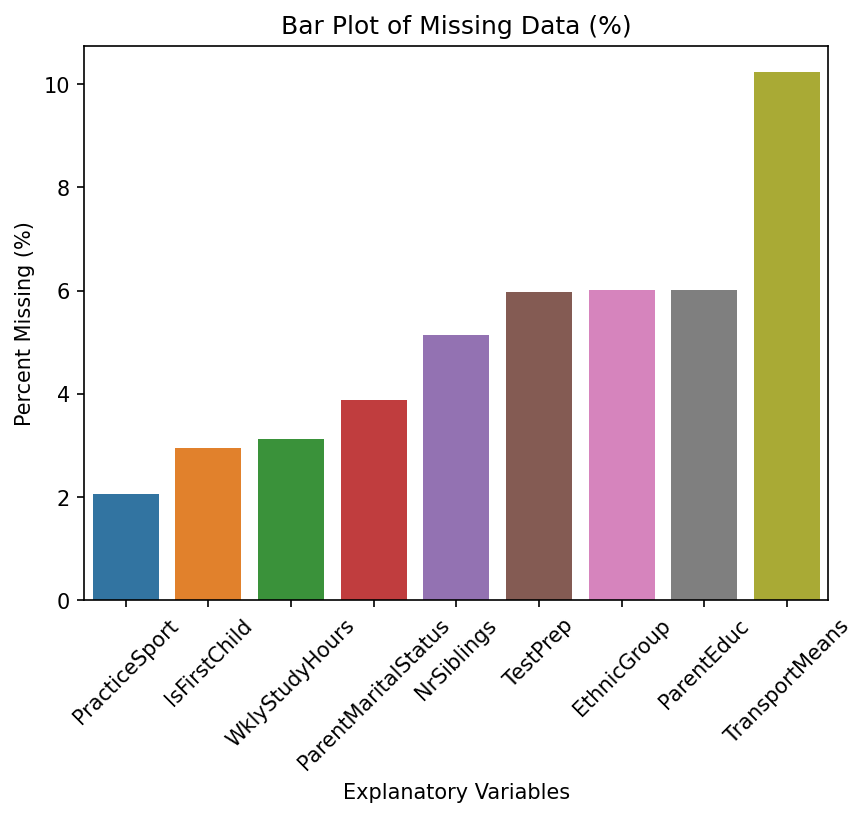

In [9]:
# plot of missing data (percentage) 
plt.figure(dpi = 150)
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.title("Bar Plot of Missing Data (%)")
plt.xlabel("Explanatory Variables")
plt.ylabel("Percent Missing (%)")
plt.xticks(rotation = 45);

### - Handling Missing Values 
   
   After investigation of our data and under the assumption that our data are missing completely at random, there are a number of ways for us to proceed:
   1) Discard observations with any missing values
   2) Relying on a learning algorithm to deal with missing values in the training phase
   3) Impute all missing values before training. 

**The 2 options discussed for our group:**


Option 1 would effectively remove 37.2% of the observations in our data frame. This is quite a substantial loss of information and was ultimately decided against. 

Option 3 (imputation). This option seems to make sense given that the data appear to be MCAR, it will allow us to keep the 37% of our data effectively preserving our sample size, and it will help us to maintain more statistical power and precision. It should however be noted that while data imputation is very useful in handling missing values some tradeoffs and consideration are to be had such as: 
 - Potential Bias
 - Assumption reliance
 - Loss of Variability
 - Uncertainty estimation


### Missing Value Decision Application

In [10]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

### Addressing Duplicates [↑](#toc)
<a class="anchor" id="duplicate"></a>

There are no duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

In [11]:
# viewing duplicated data rows/cols
duplicate_sum = df.duplicated().sum()
print("Total Duplicated Rows", duplicate_sum)

duplicate_sum_column = df.duplicated(). sum(axis =0)
print("Total Duplicated Columns", duplicate_sum_column)

Total Duplicated Rows 1
Total Duplicated Columns 1


### Addressing Outliers [↑](#toc)
<a class="anchor" id="outlier"></a>

#### Histogram of Scores

To see the overall distribution and outliers of our data we created histograms for the test score variables. Additionally, so that we can make efficient use of our plots, we have overlaid the median score on the histograms so that we can see where that lies within the distribution for each of the test scores.

We chose the median because we found that the data is skewed; therefore, the median is the more appropriate way method.

In [12]:
math_m = df["MathScore"].median()
write_m = df["WritingScore"].median()
read_m = df["ReadingScore"].median()

#math_m, write_m, read_m
m_df = pd.DataFrame({"Math Score Median":[math_m],
                           "Writing Score Median": [write_m],
                           "Reading Score Median":[read_m]})

m_df

,Math Score Median,Writing Score Median,Reading Score Median
0,67.0,69.0,70.0


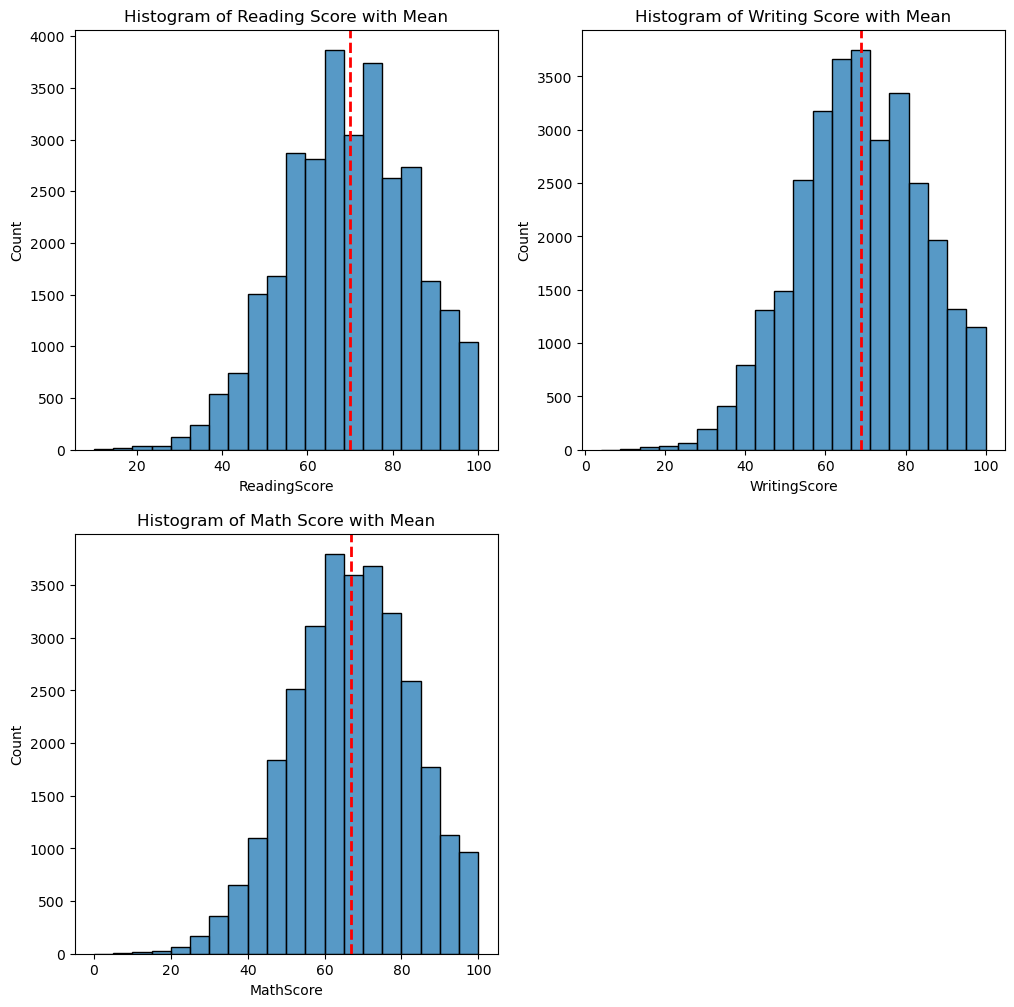

In [13]:
# plot histogram and mean
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 12))
a = sns.histplot(x = "ReadingScore",data=df,ax=axes[0,0], bins = 20)
a.axvline(read_m, color = 'r', linestyle = 'dashed', linewidth = 2)
b = sns.histplot(x = "WritingScore",data=df,ax=axes[0,1],bins = 20)
b.axvline(write_m, color = 'r', linestyle = 'dashed', linewidth = 2)
b = sns.histplot(x = "MathScore",data=df,ax=axes[1,0],bins = 20)
b.axvline(math_m, color = 'r', linestyle = 'dashed', linewidth = 2)

axes[0, 0].set_title("Histogram of Reading Score with Mean")
axes[0, 1].set_title("Histogram of Writing Score with Mean")
axes[1, 0].set_title("Histogram of Math Score with Mean")

fig.delaxes(axes[1][1]);

#### IQR and Identifying Outliers

While there are a number of outliers and one notable one is 0 in Math Score, we have decided that it wouldn't make any sense to remove any of them because we believe that every single value in each of these score columns are rather important. We will not remove any data points. 

In [14]:
def find_IQR(df,x):
    '''
    INPUT
        df - dataframe to be used
        x - interested column
    OUTPUT
        Q1 - First Quartile
        Q3 - Third Quartile
        IQR - Interquartile Range of interested column
    '''
    # IQR
    Q1 = np.percentile(df[x], 25)
    Q3 = np.percentile(df[x], 75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [15]:
# Math IQR
Q1, Q3, IQR = find_IQR(df, "MathScore")

# Upper Bound
math_upper=Q3+1.5*IQR
mathupper_array=df[np.array(df["MathScore"]>=math_upper)]


In [16]:
# Lower bound
math_lower=Q1-1.5*IQR
mathlower_array=df[np.array(df["MathScore"]<=math_lower)]

mathlower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
136,female,group C,some college,free/reduced,none,single,regularly,yes,1.0,school_bus,< 5,21,38,33
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
751,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,female,group C,some college,free/reduced,none,single,sometimes,yes,3.0,private,5 - 10,11,39,34
28597,female,group D,high school,free/reduced,completed,married,sometimes,yes,2.0,school_bus,> 10,9,32,32
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
29654,female,group B,associate's degree,free/reduced,none,single,sometimes,no,4.0,private,5 - 10,19,41,34


In [17]:
# Reading IQR
Q1, Q3, IQR = find_IQR(df, "ReadingScore")

# Upper Bound
reading_upper=Q3+1.5*IQR
readingupper_array=df[np.array(df["ReadingScore"]>=reading_upper)]

In [18]:
# Lower bound
reading_lower=Q1-1.5*IQR
readinglower_array=df[np.array(df["ReadingScore"]<=reading_lower)]

readinglower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,married,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,male,group C,associate's degree,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,27,26,23
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30412,male,group C,some high school,free/reduced,none,single,regularly,no,1.0,private,5 - 10,33,25,29


In [19]:
# Writing IQR
Q1, Q3, IQR = find_IQR(df, "WritingScore")

# Upper Bound
write_upper=Q3+1.5*IQR
writeupper_array=df[np.array(df["WritingScore"]>=write_upper)]


In [20]:
# Lower bound
write_lower=Q1-1.5*IQR
writelower_array=df[np.array(df["WritingScore"]<=write_lower)]

writelower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,married,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,female,group E,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,30,32,26
29817,male,group D,high school,free/reduced,none,married,sometimes,no,1.0,private,5 - 10,33,31,22
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30478,male,group D,associate's degree,standard,none,married,sometimes,no,1.0,school_bus,< 5,32,19,20


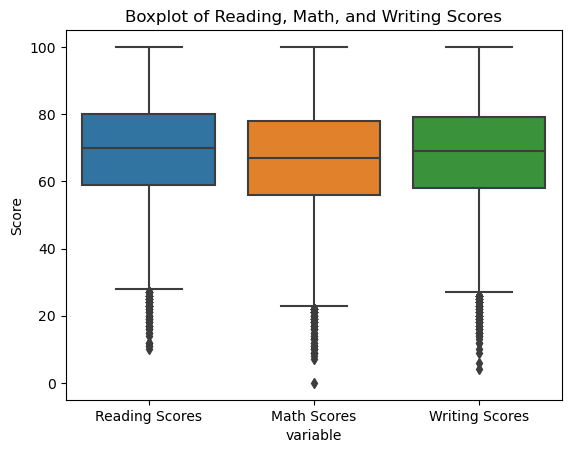

In [21]:
# Create a DataFrame of the scores
scores_df = df[["ReadingScore", "MathScore", "WritingScore"]]

# Melt the DataFrame to "long-form" format
scores_melt = pd.melt(scores_df)

# Create the boxplot using Seaborn
sns.boxplot(x="variable", y="value", data=scores_melt)

# Add labels to the x-axis ticks
plt.xticks([0, 1, 2], ["Reading Scores", "Math Scores", "Writing Scores"])

# Add labels to the y-axis
plt.ylabel("Score")

# Add a title
plt.title("Boxplot of Reading, Math, and Writing Scores")

# Display the plot
plt.show()

<hr>

## <b> Dataset Summary Statisitcs [↑](#toc) </b>
<a class="anchor" id="summary"></a>
Analyzing summary statistics, handling outliers, missing values, and duplicated data are essential steps in the data preprocessing phase of conducting EDA. Additionally, this step ensures we are able to have reliable and accurate data to work with and use to conduct experiments where we have a full understanding of the interpretability and application that our data allows.<br><br>
- Furthermore this process will aid us in various areas such as:<br><br>
    - **Understanding Data:** Summary statistics provide a concise overview of the dataset, enabling data scientists to gain insights, identify patterns, and guide further analysis.
    - **Ensuring Data Quality:** Handling outliers, missing values, and duplicate data is crucial for maintaining the reliability and integrity of data analysis and modeling processes.
    - **Maintaining Model Performance:** Properly addressing outliers and missing values improves model stability and accuracy, leading to more reliable predictions.
    - **Avoiding Biased Conclusions:** By appropriately handling outliers, missing values, and duplicate data, data scientists can minimize bias and ensure that their findings are representative and unbiased.
    - **Data Quality Assurance:** Cleaning and preprocessing the data effectively ensures that subsequent analyses and models are built on reliable and high-quality data.
    - **Improving Efficiency:** Dealing with outliers, missing values, and duplicate data streamlines the dataset, making data processing and analysis more efficient, accurate, and computationally effective.

### Metrics Defined

   - **Range**: The range is the difference between the highest and the lowest values in a dataset. It gives an indication of how spread out the data is. <br><br>
   - **Mode**: The mode is the value that appears most frequently in a dataset. It represents the most common or typical value in the data. <br><br> 
   - **Mean**: The mean is the average of all values in a dataset. It is calculated by summing up all the values and dividing by the number of values. <br><br>
   - **Median**: The median is the middle value of a dataset when it is ordered from lowest to highest (or highest to lowest). It is used as a measure of central tendency when the dataset contains outliers or is not normally distributed. <br><br>
   - **Standard Deviation**: The standard deviation is a measure of the spread or dispersion of a dataset. It represents how much the values in a dataset vary from the mean. A higher standard deviation indicates a larger spread of the data. <br><br> 
   - **Min**: The minimum value is the smallest value in a dataset.<br><br> 
   - **25%**: The 25th percentile, also known as the first quartile, is the value below which 25% of the data falls. <br><br> 
   - **50%**: The 50th percentile, also known as the median, is the middle value of the dataset. <br><br> 
   - **75%**: The 75th percentile, also known as the third quartile, is the value below which 75% of the data falls. <br><br> 
   - **Max**: The maximum value is the largest value in a dataset.<br><br> 
   - **Count**: The count is the total number of values in a dataset.<br><br> 

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NrSiblings,30641.0,2.087106,1.442665,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


In [23]:
# Calculate the statistics using describe()
reading_stats = df["ReadingScore"].describe()
math_stats = df["MathScore"].describe()
writing_stats = df["WritingScore"].describe()

# Calculate the mode separately
reading_mode = df["ReadingScore"].mode()
math_mode = df["MathScore"].mode()
writing_mode = df["WritingScore"].mode()

# Calculate the Median Separately
reading_median = df["ReadingScore"].median()
math_median = df["MathScore"].median()
writing_median = df["WritingScore"].median()

# Calculate the Range Separately
reading_range = (df["ReadingScore"].max()-df["ReadingScore"].min())
math_range = (df["MathScore"].max()-df["MathScore"].min())
writing_range = (df["WritingScore"].max()-df["WritingScore"].min())


# Add the mode to the statistics DataFrame
reading_stats["Mode"] = reading_mode[0]
math_stats["Mode"] = math_mode[0]
writing_stats["Mode"] = writing_mode[0]

# Add the Median to the statistics DataFrame
reading_stats["Median"] = reading_median
math_stats["Median"] = math_median
writing_stats["Median"] = writing_median

# Add the Range to the statistics DataFrame
reading_stats["Range"] = reading_range
math_stats["Range"] = math_range
writing_stats["Range"] = writing_range

# Combine the statistics into a single DataFrame
stats_df = pd.DataFrame({"Reading Score": reading_stats,
                         "Math Score": math_stats,
                         "Writing Score": writing_stats})

# Convert the DataFrame to a visual table
table = tabulate(stats_df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)

╒════════╤═════════════════╤══════════════╤═════════════════╕
│        │   Reading Score │   Math Score │   Writing Score │
╞════════╪═════════════════╪══════════════╪═════════════════╡
│ count  │      30641      │   30641      │      30641      │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ mean   │         69.3775 │      66.5584 │         68.4186 │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ std    │         14.759  │      15.3616 │         15.4435 │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ min    │         10      │       0      │          4      │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ 25%    │         59      │      56      │         58      │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ 50%    │         70      │      67      │         69      │
├────────┼─────────────────┼──────────────┼─────────────────┤
│ 75%    │         80      │      78      │         79      │
├───────

  ### Significance of the Values Calculated:
  
  **Range:** The range of Reading Score, Math Score, and Writing Score can provide an idea of how spread out the scores are and the variability of the performance of students in these subjects.<br><br> 
   **Mode:** The mode of Reading Score, Math Score, and Writing Score can provide an idea of the most common score achieved by students in these subjects, which can be useful for identifying areas of strength and weakness.<br><br> 
   **Mean:** The mean of Reading Score, Math Score, and Writing Score can provide an idea of the average performance of students in these subjects, which can be useful for comparing the performance of different groups of students.<br><br> 
   **Median:** The median of Reading Score, Math Score, and Writing Score can provide an idea of the central tendency of the scores, which can be useful for identifying outliers and extreme values that may skew the mean.<br><br> 
   **Standard Deviation:** The standard deviation of Reading Score, Math Score, and Writing Score can provide an idea of the spread of the scores around the mean, which can be useful for identifying the variability of the performance of students in these subjects.<br><br> 
   **Min:** The minimum score of Reading Score, Math Score, and Writing Score can provide an idea of the lowest score achieved by students in these subjects.<br><br> 
   **25%, 50%, and 75%**: The quartiles of Reading Score, Math Score, and Writing Score can provide an idea of the spread and distribution of the scores, which can be useful for identifying the performance of students in different percentile ranges.<br><br> 
   **Max:** The maximum score of Reading Score, Math Score, and Writing Score can provide an idea of the highest score achieved by students in these subjects.<br><br> 
   **Count**: The count of Reading Score, Math Score, and Writing Score can provide an idea of the sample size of students who took the test in each subject, which can be useful for making inferences about the population of students.<br><br>     


<hr>

## <b> Top Features | Data Visualization [↑](#toc) </b>
<a class="anchor" id="visual"></a>

In [24]:
#Number of Missing Values in Each Column
df.isnull().sum()

df3 = df

df3.describe()
df3.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### <b>1) Gender | Test Score Visualization [↑](#toc)</b>
<a class="anchor" id="one"></a>

**Visual Interpretation**

- Looking at the density plot, we can see that the female group distribution has greater (higher) scores than the male group in Reading and Writing. The male group seemed to score higher on Math. <br><br> Looking at the scatterplot, we see an interesting relationship between MathScore vs. Writing & Reading Score, which seems to provide additional evidence to what we witness in the density plot. There are clear divides in the scatterplots between the two genders suggesting that there may be a gender-based difference or correlation in the relationship between the math and reading/writing scores.

**Why the Visual is Appropriate:**
- The pairplot function allows us to visualize pairwise relationships between numerical variables in a dataset. Additionally by examining scatter plots we are able to visually assess the strength and direction of correlations between different numerical variables. Lastly, the pairplot includes a density plot which provides a visual representation of the data distribution helping to understand the shape, skewness, and spread of each variable individually. 

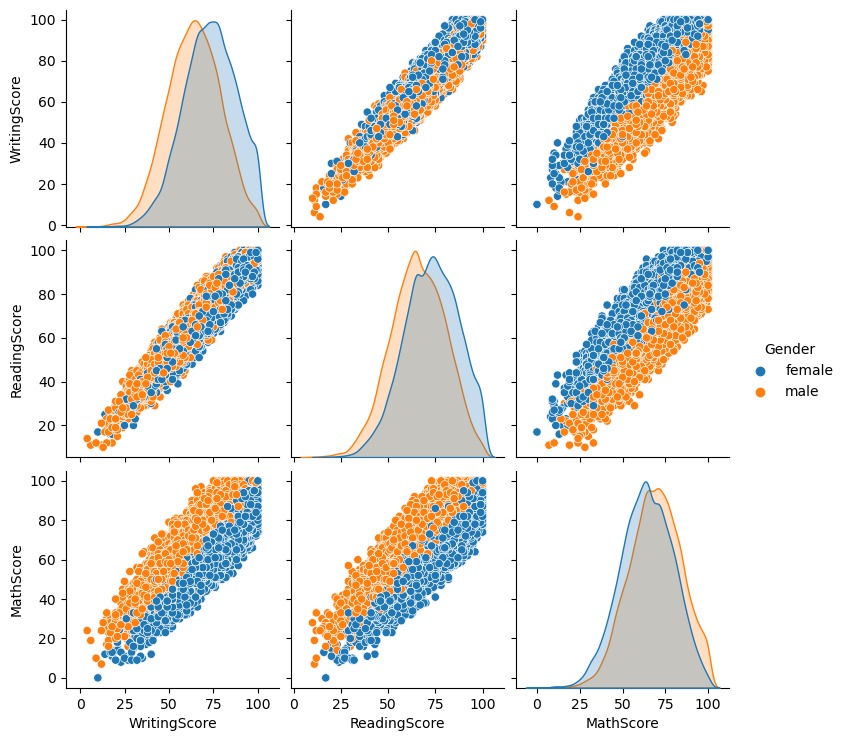

In [25]:
#Full Bar Plot Comparisons
sns.pairplot(df3[["WritingScore", "ReadingScore","MathScore", "Gender"]], hue= "Gender")
plt.show()

In [26]:
## boxplot
def plot_imputed(col):
    '''
    INPUT:
        col - choose interested column for the x-axis; write with quotations
    '''
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

    sns.boxplot(ax=axes[0,0], data = df3, x = col, y = "MathScore",)
    sns.boxplot(ax = axes[0,1], data = df3, x = col, y = "ReadingScore")
    sns.boxplot(ax=axes[1,0], data = df3, x = col, y = "WritingScore")
    sns.countplot(ax=axes[1,1], x=col, data=df3)

    axes[0,0].set_title(f"Math Scores by {col}")
    axes[0,1].set_title(f"Reading Scores by {col}")
    axes[1,0].set_title(f"Writing Scores by {col}")
    axes[1,1].set_title(f"{col} Count")

    plt.tight_layout()

    plt.show()

## multivariate plot
def plot_imputed_2var(col, col2):
    '''
    INPUT:
        col - choose interested column for the x-axis; write with quotations
        col2 - choose interested column for the hue; write with quotations
    '''
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))        

    sns.boxplot(ax=axes[0, 0],x=col,  y="MathScore",data=df3,hue=col2)
    axes[0, 0].set_title(f"MathScore for {col} Grouped by {col2}")

    p = sns.boxplot(ax=axes[0, 1],x=col,  y="ReadingScore",data=df3,hue=col2)
    axes[0, 1].set_title(f"ReadingScore for ParentEduc Grouped by {col2}")

    p = sns.boxplot(ax=axes[1, 0],x=col,  y="WritingScore",data=df3,hue=col2)
    axes[1, 0].set_title(f"WritingScore for ParentEduc Grouped by {col2}")

    # customize x-axis tick labels for each subplot
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=70)
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=70)
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=70)
    
    fig.delaxes(axes[1][1])
    
    plt.tight_layout()

    plt.show()

### <b>2) Parent Education | Test Score Visualization [↑](#toc)</b>
<a class="anchor" id="two"></a>

**Visual Interpretation**
- A pattern of increasing median test scores can be observed as "increases" in education level take place.
In addition to the observation of this pattern, the boxplots below provide visual representation of the distribution of test scores and show the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
  
<br><br>
**Why the Visual is Appropriate:**
- A box plot is a good visual for comparing education levels against test scores because it displays the distribution of scores for each level of education in a compact and intuitive way. The box represents the interquartile range (IQR) of the data, with the median (50th percentile) represented as a horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, while any data points outside this range are represented as individual dots. This allows for easy comparison of the distribution of test scores for different levels of education, as well as identifying potential outliers or extreme values.
<br><br>

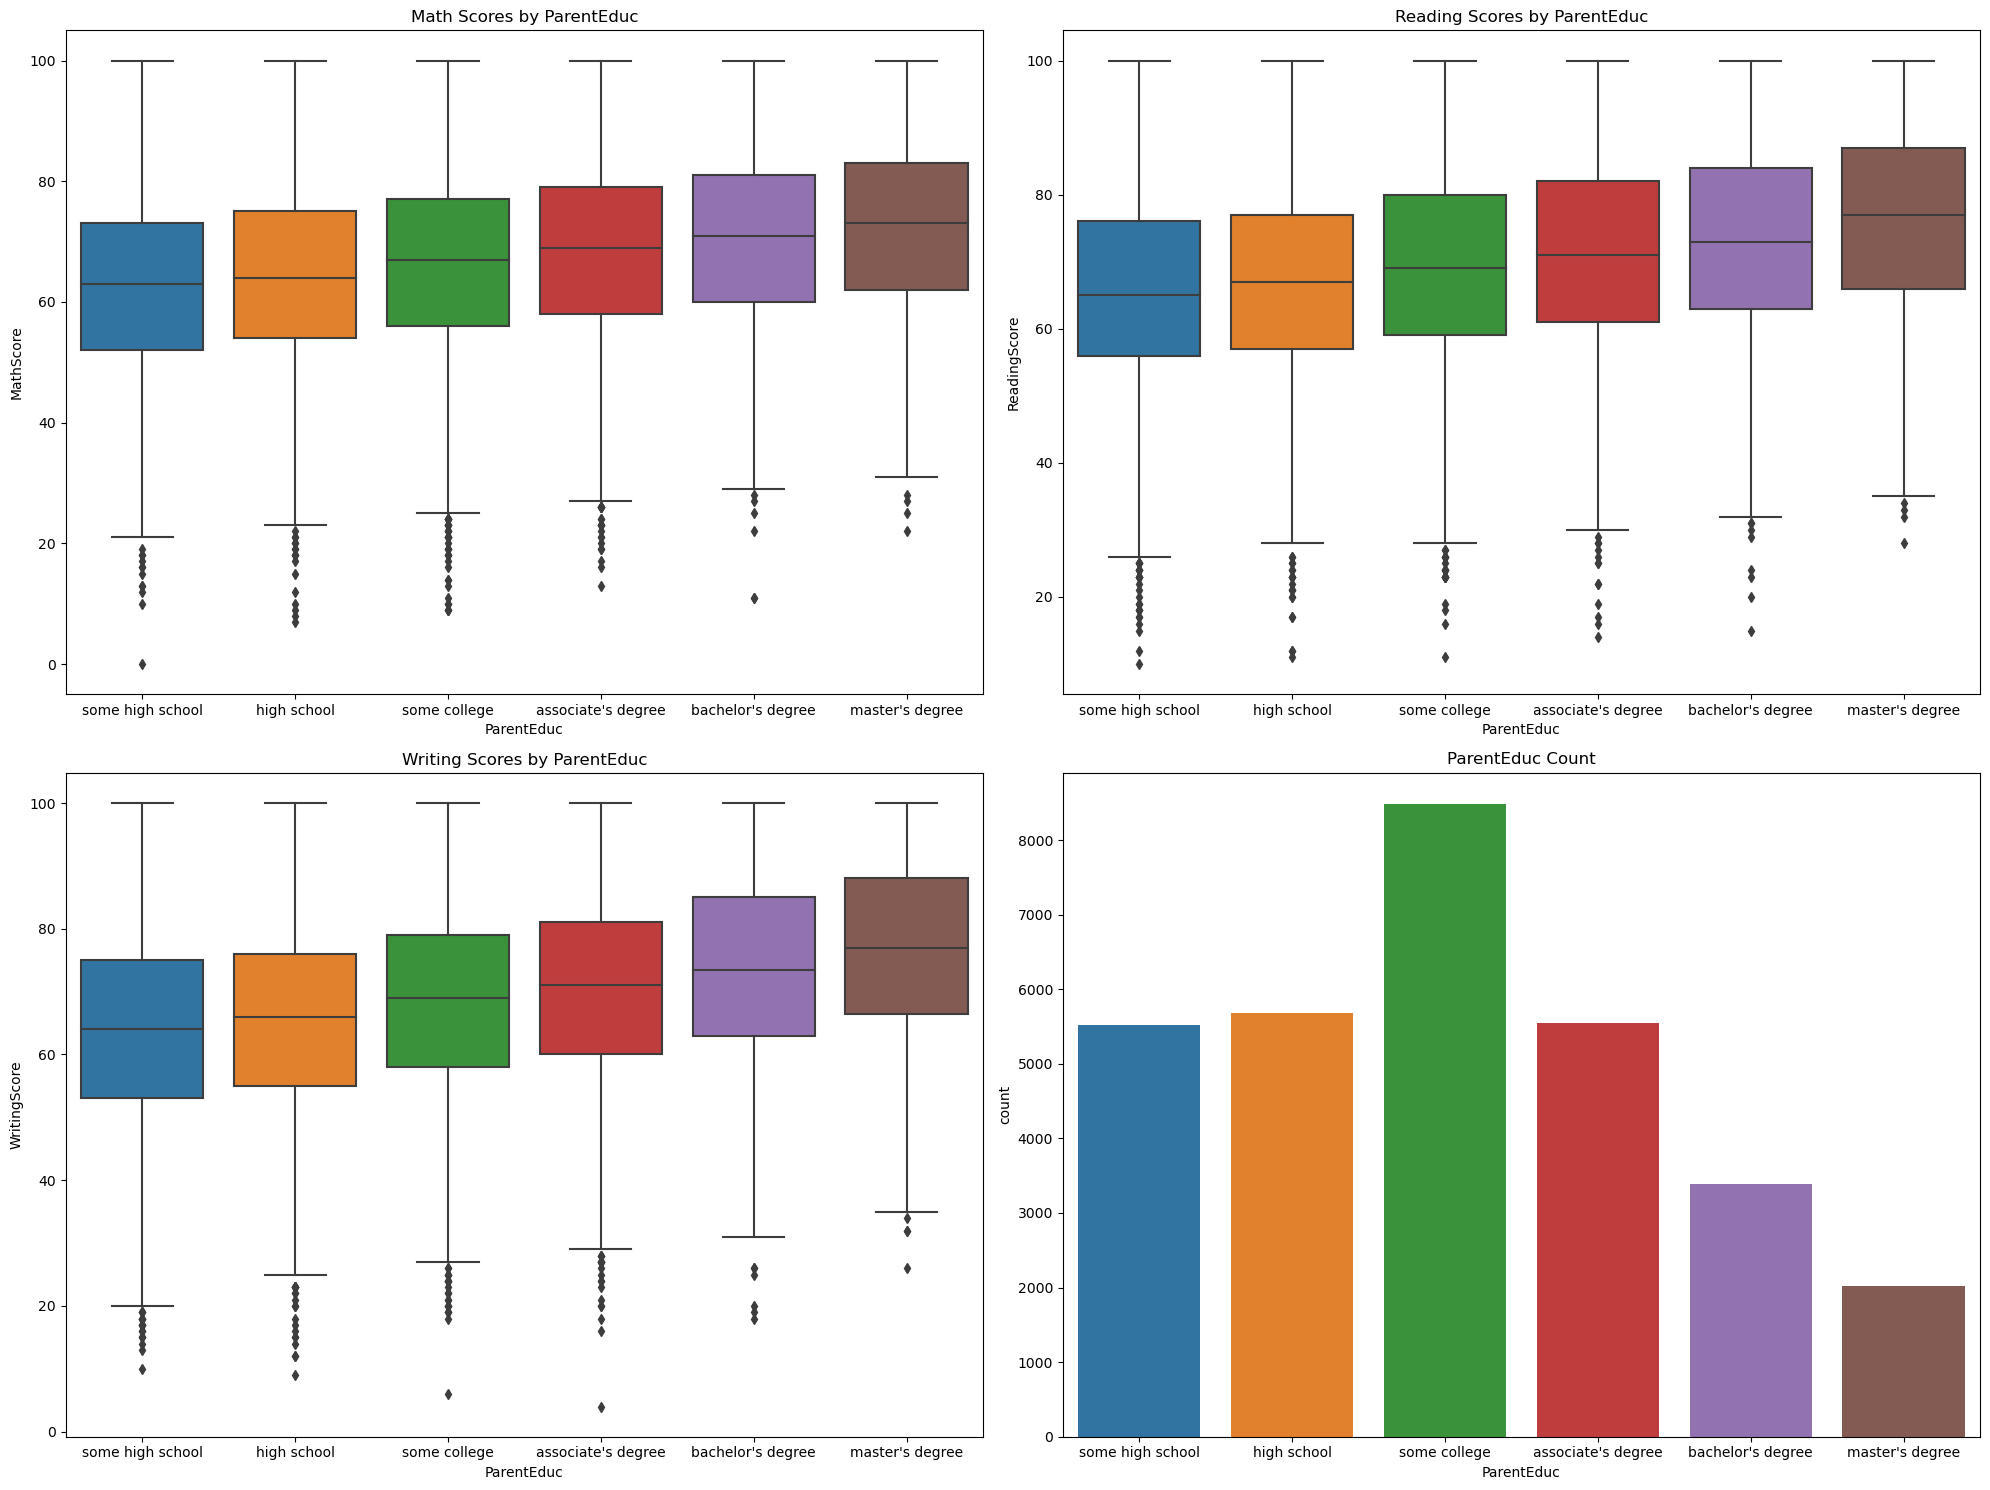

In [27]:
df3["ParentEduc"] = df3["ParentEduc"].astype('category')
df3["ParentEduc"] = df3["ParentEduc"].cat.reorder_categories(["some high school","high school", 
                                                                            "some college", "associate's degree", "bachelor's degree", "master's degree"])

plot_imputed("ParentEduc")

### <b>3) Ethnic Groups | Test Score Visualization</b> [↑](#toc)
<a class="anchor" id="three"></a>

**Visual Interpretation**
- We can see that the median test score increases as we move observe scores for the ethnic groups in alphabetical order. Group E, has a median that seems to increase significantly from group D. The plots below illustrate the distribution of test scores and show the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br><br>

**Why the Visual is Appropriate:**
- Boxplots are a suitable visual representation for comparing test scores among different ethnic groups A-E because they provide a concise and informative summary of the distribution of the data, allowing for effective comparisons and identification of patterns or differences between the groups. 
<br><br>

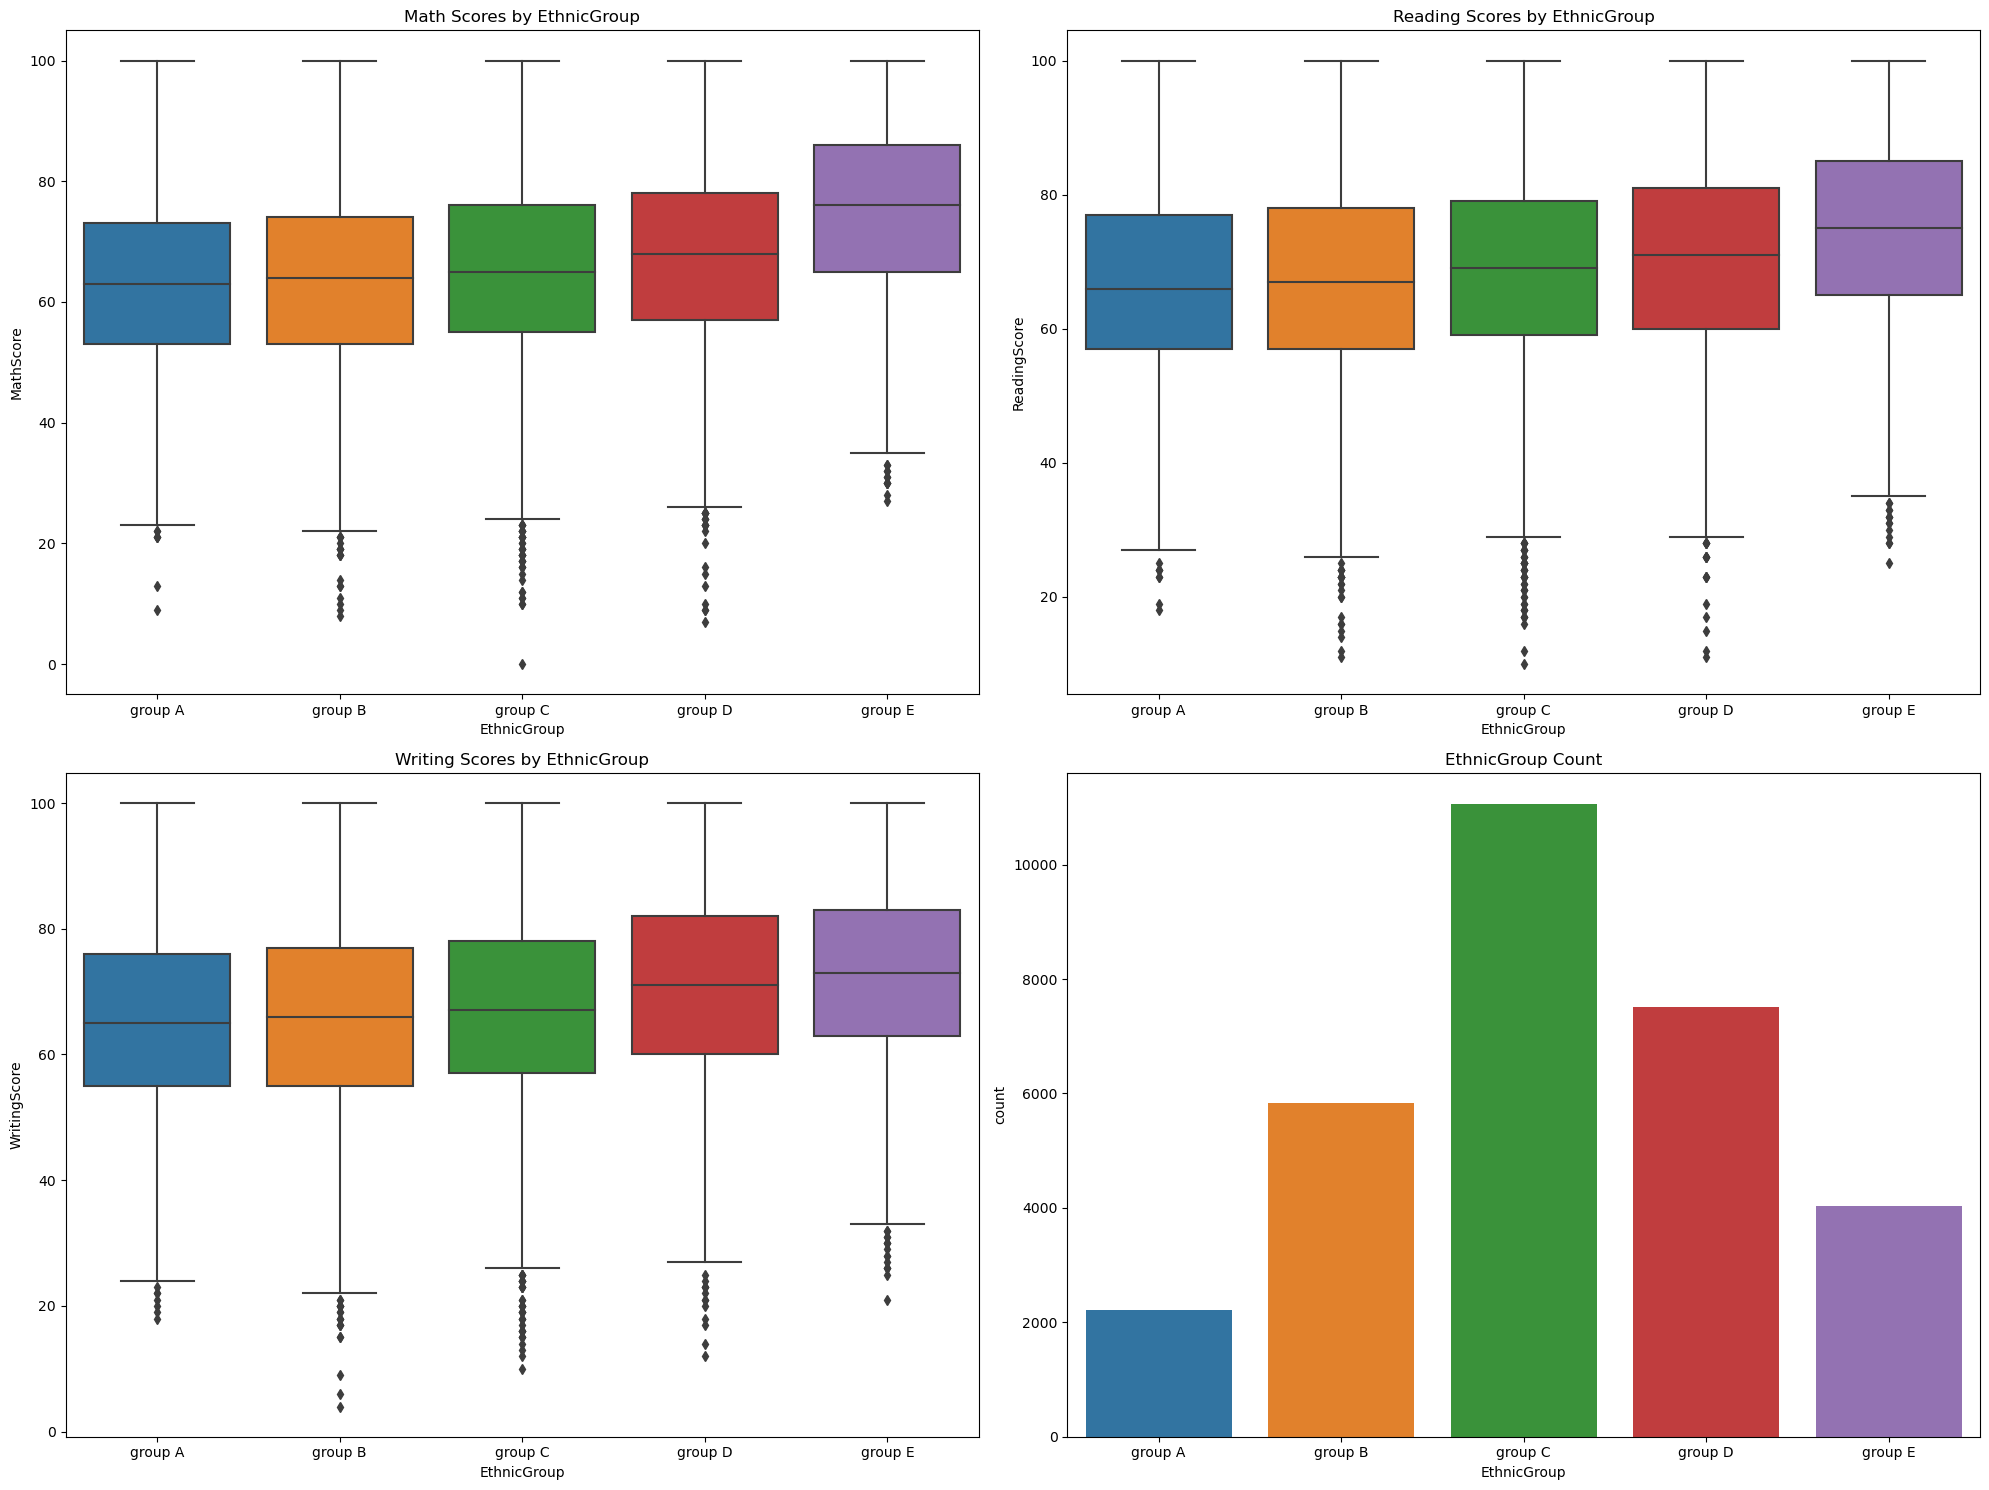

In [28]:
df3['EthnicGroup'] = df3['EthnicGroup'].astype('category')
df3["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E"])


plot_imputed("EthnicGroup")

### <b>4) Test Prep | Test Score Visualization </b>[↑](#toc)
<a class="anchor" id="four"></a>

**Visual Interpretation**
 - As expected from an intuitive perspective, those who have completed their test prep have a higher median score than those who did none of the test prep. The box plots created visually show the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br><br>

**Why the Visual is Appropriate:**
- A box plot is an appropriate visual for comparing the test scores for groups who did/didn't participate in test prep. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.

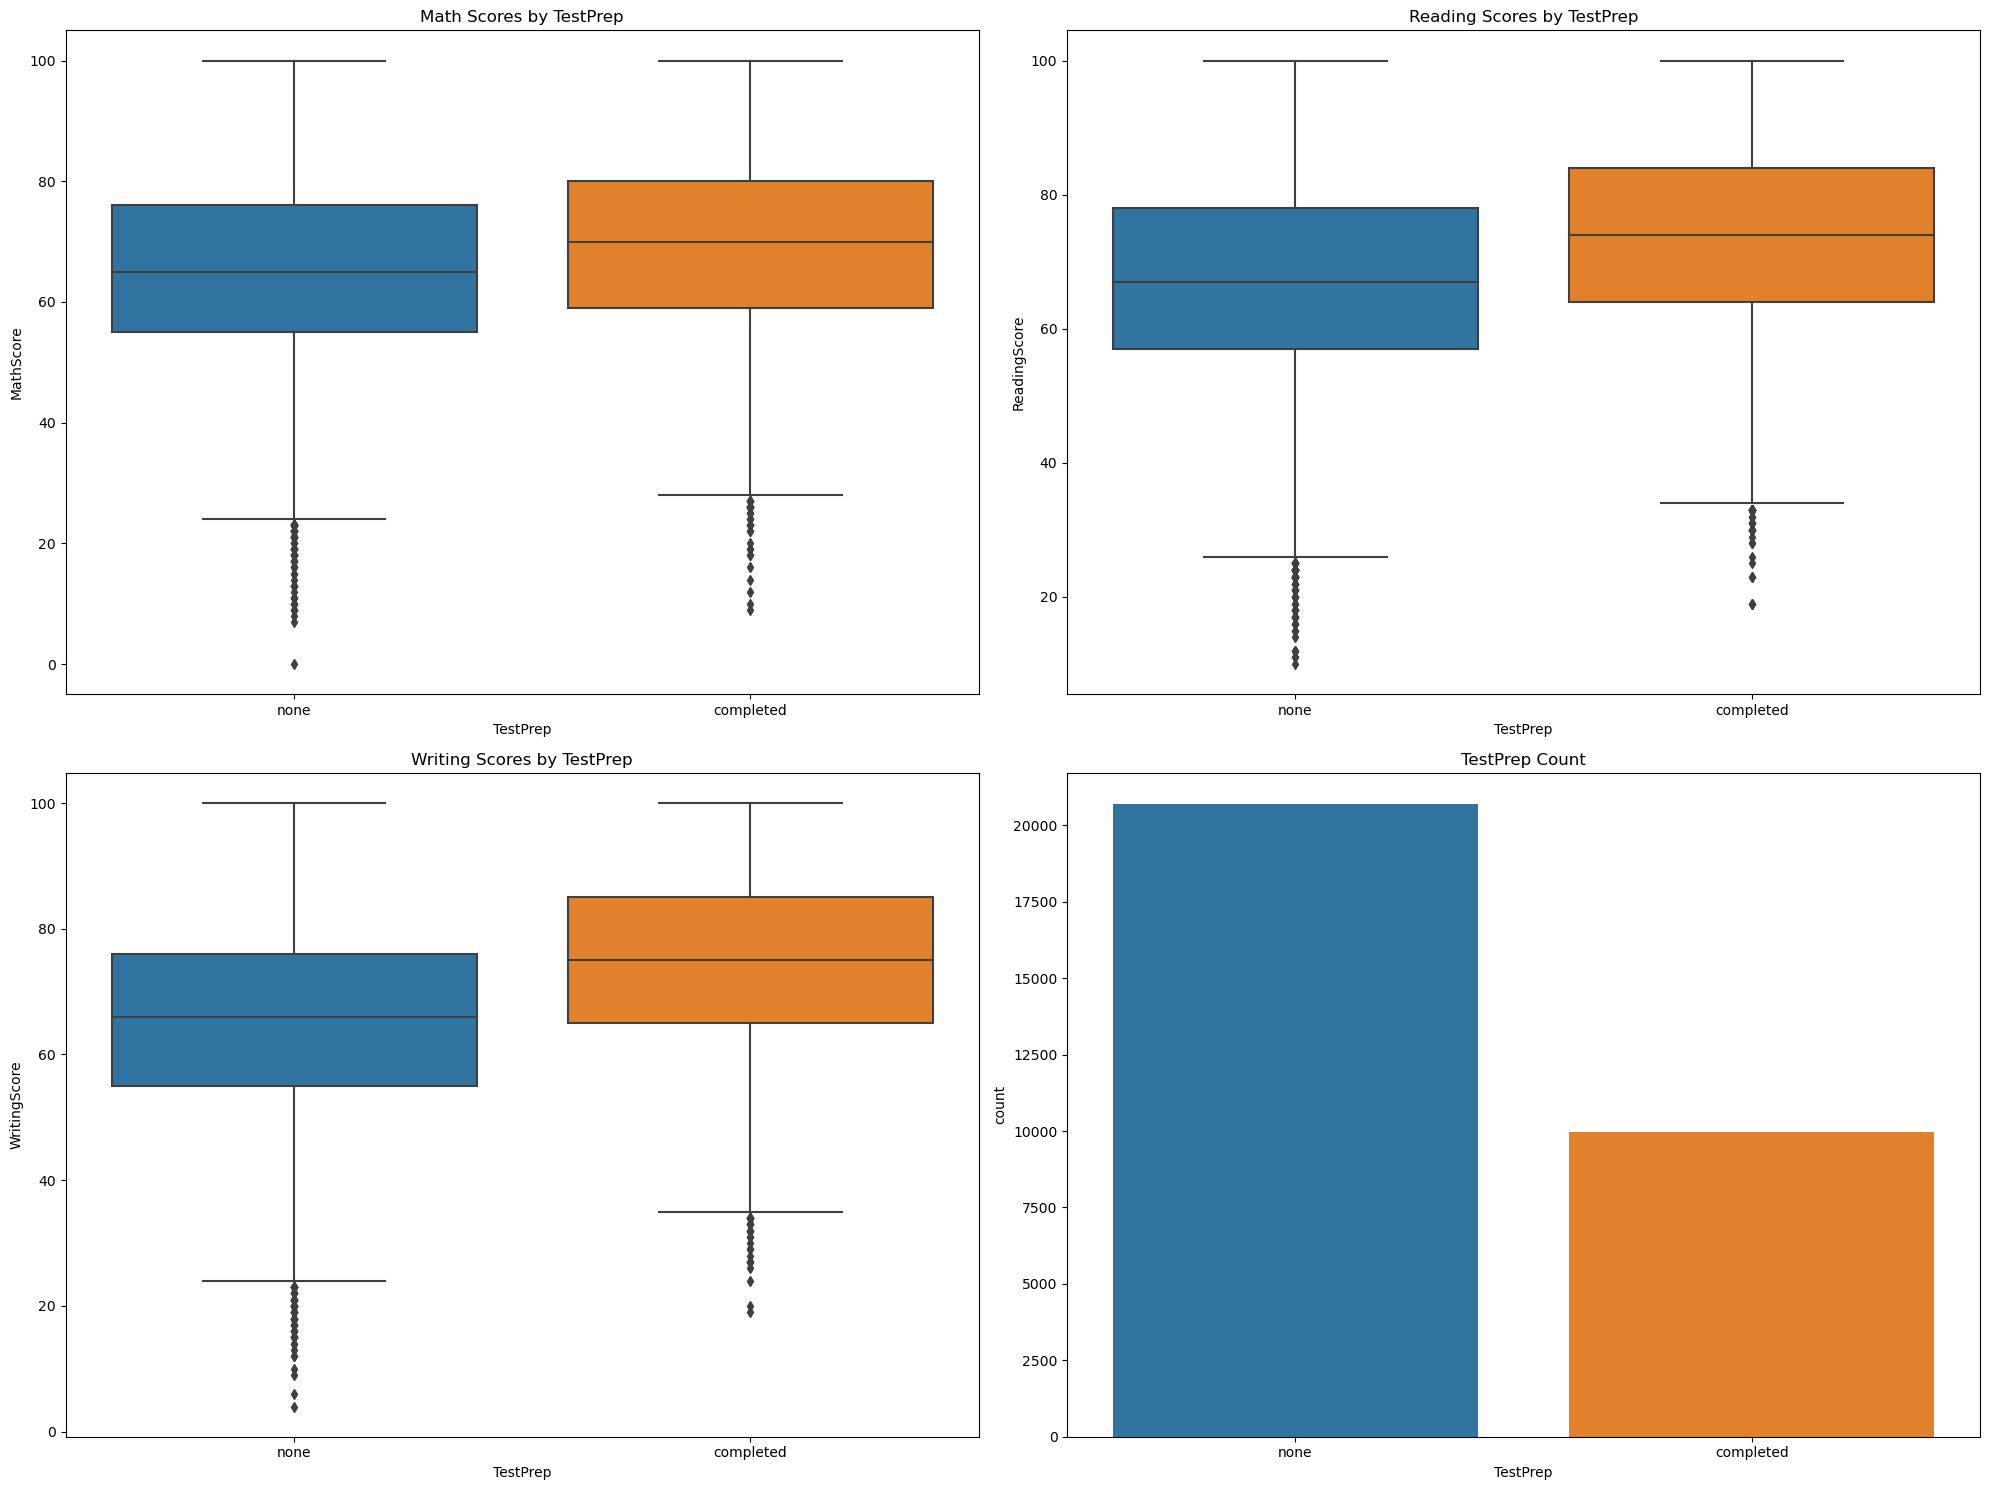

In [29]:
plot_imputed("TestPrep")

### <b>5) Lunch Type | Test Score Visualization [↑](#toc)</b>
<a class="anchor" id="five"></a>

**Visual Interpretation**
- As we can see from our count plot, most students in this data set eat on a standard lunch plan. When we look at the boxplots, we find that those with free/reduced lunch score a significantly lower grade than those with standard lunch.
The boxplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.

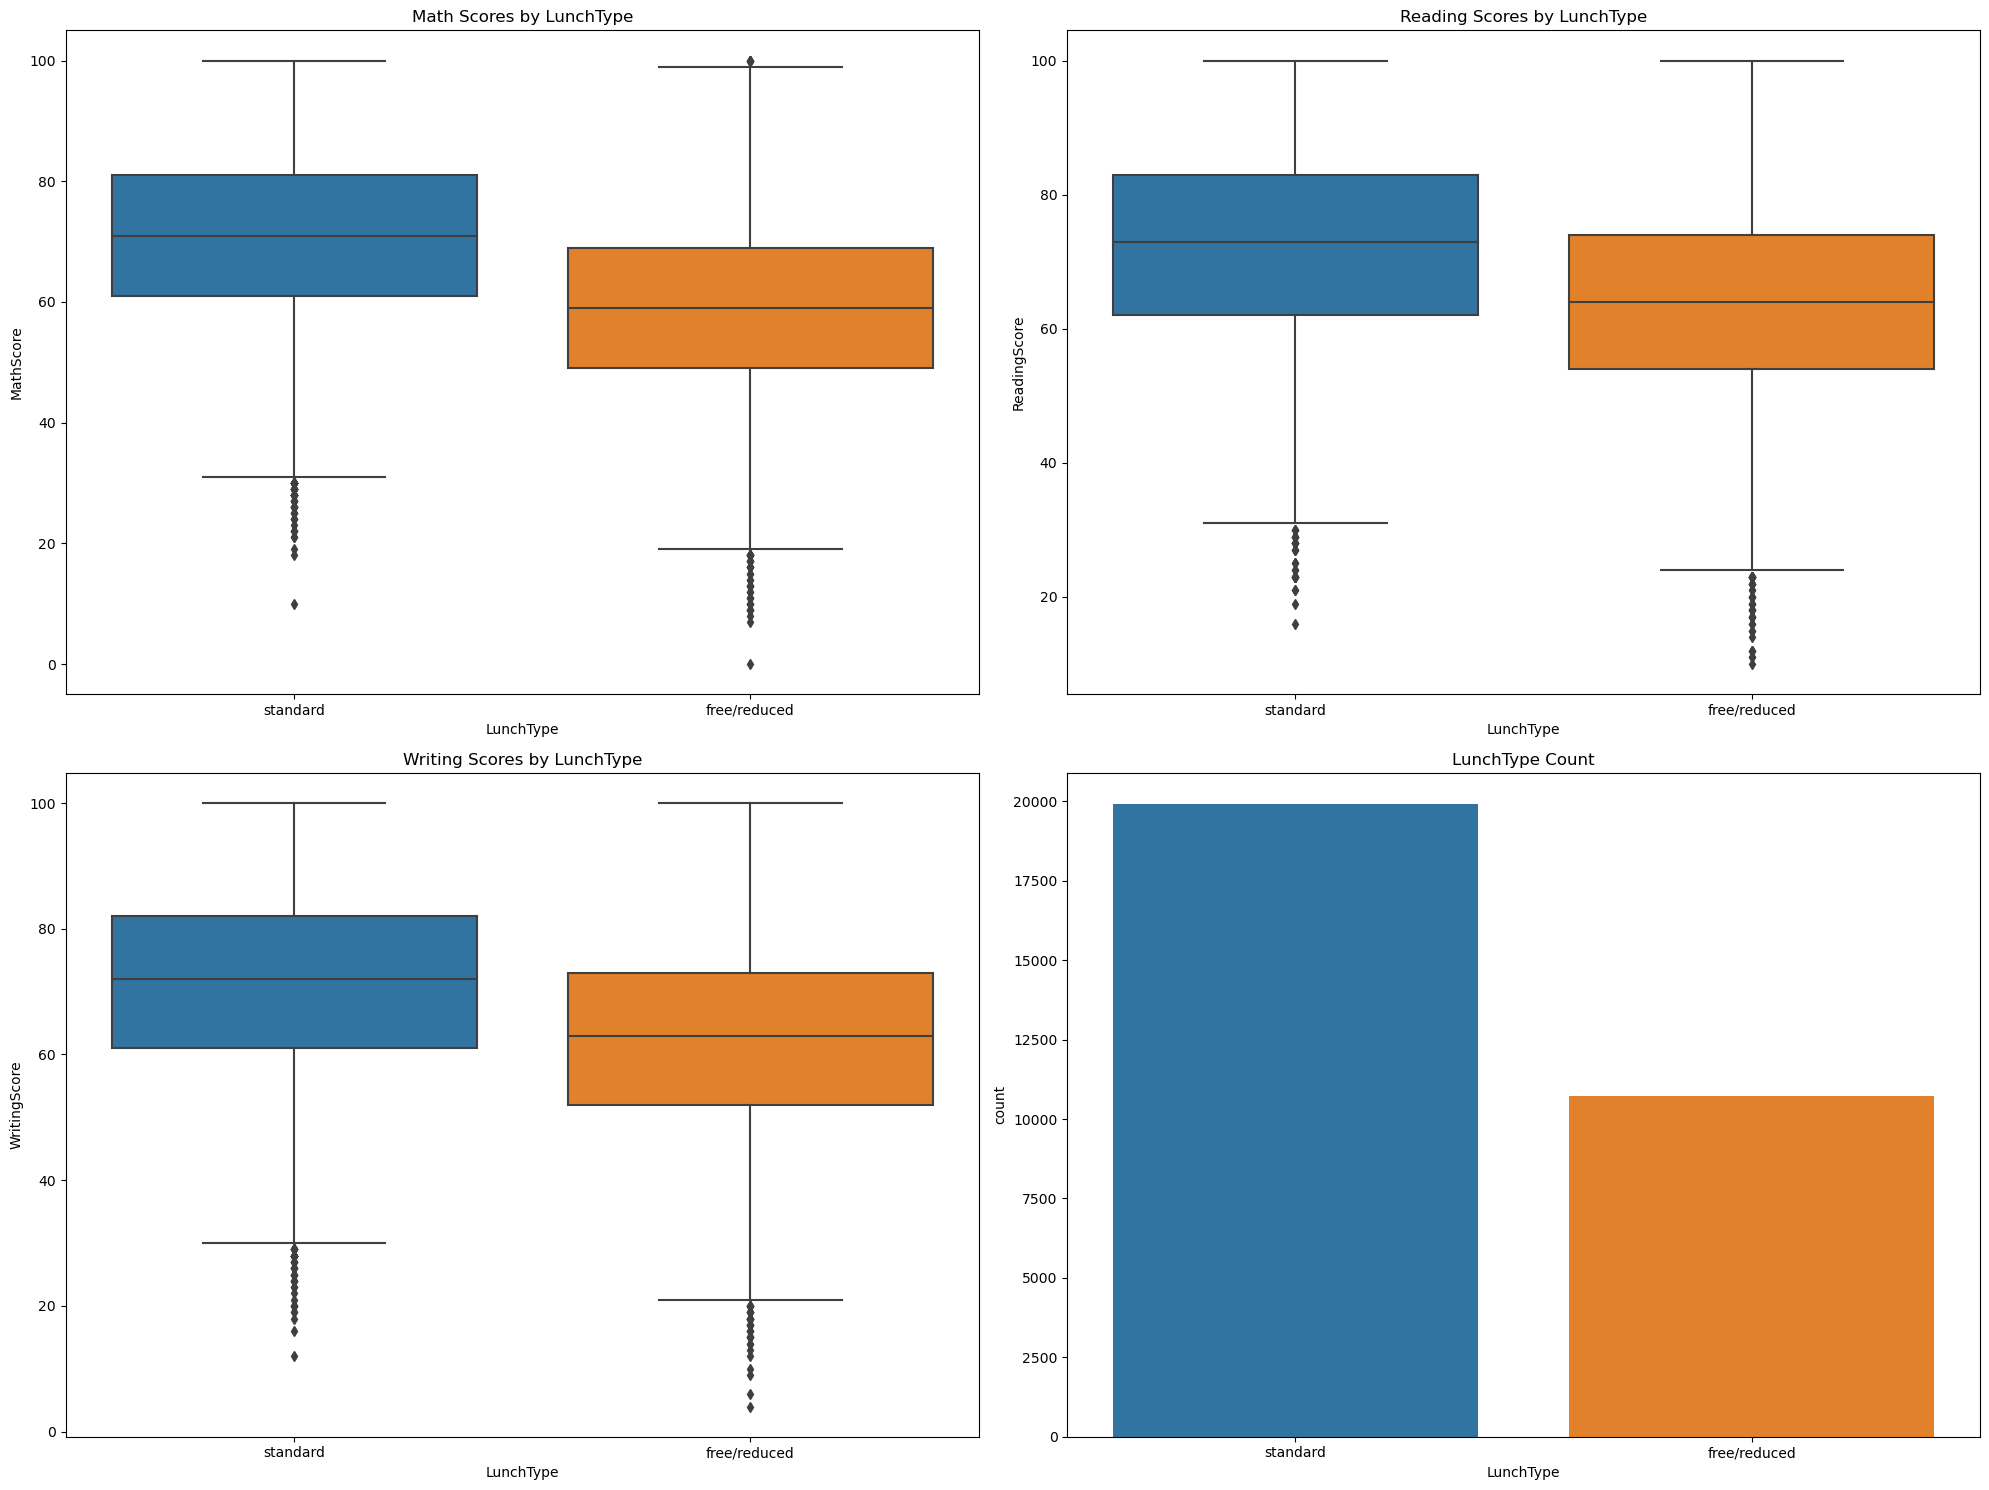

In [30]:
plot_imputed("LunchType")

###  Gender | Scores - Extra

Due to our findings above, let's take a look at the scores of each gender in general.

As we can see below, it seems that just by examining the gender, we find that females do score higher on reading and writing and male score higher on math. This is not the result of adding another variable.

As we can see from the count plot, we have a relatively balanced number of males and females.

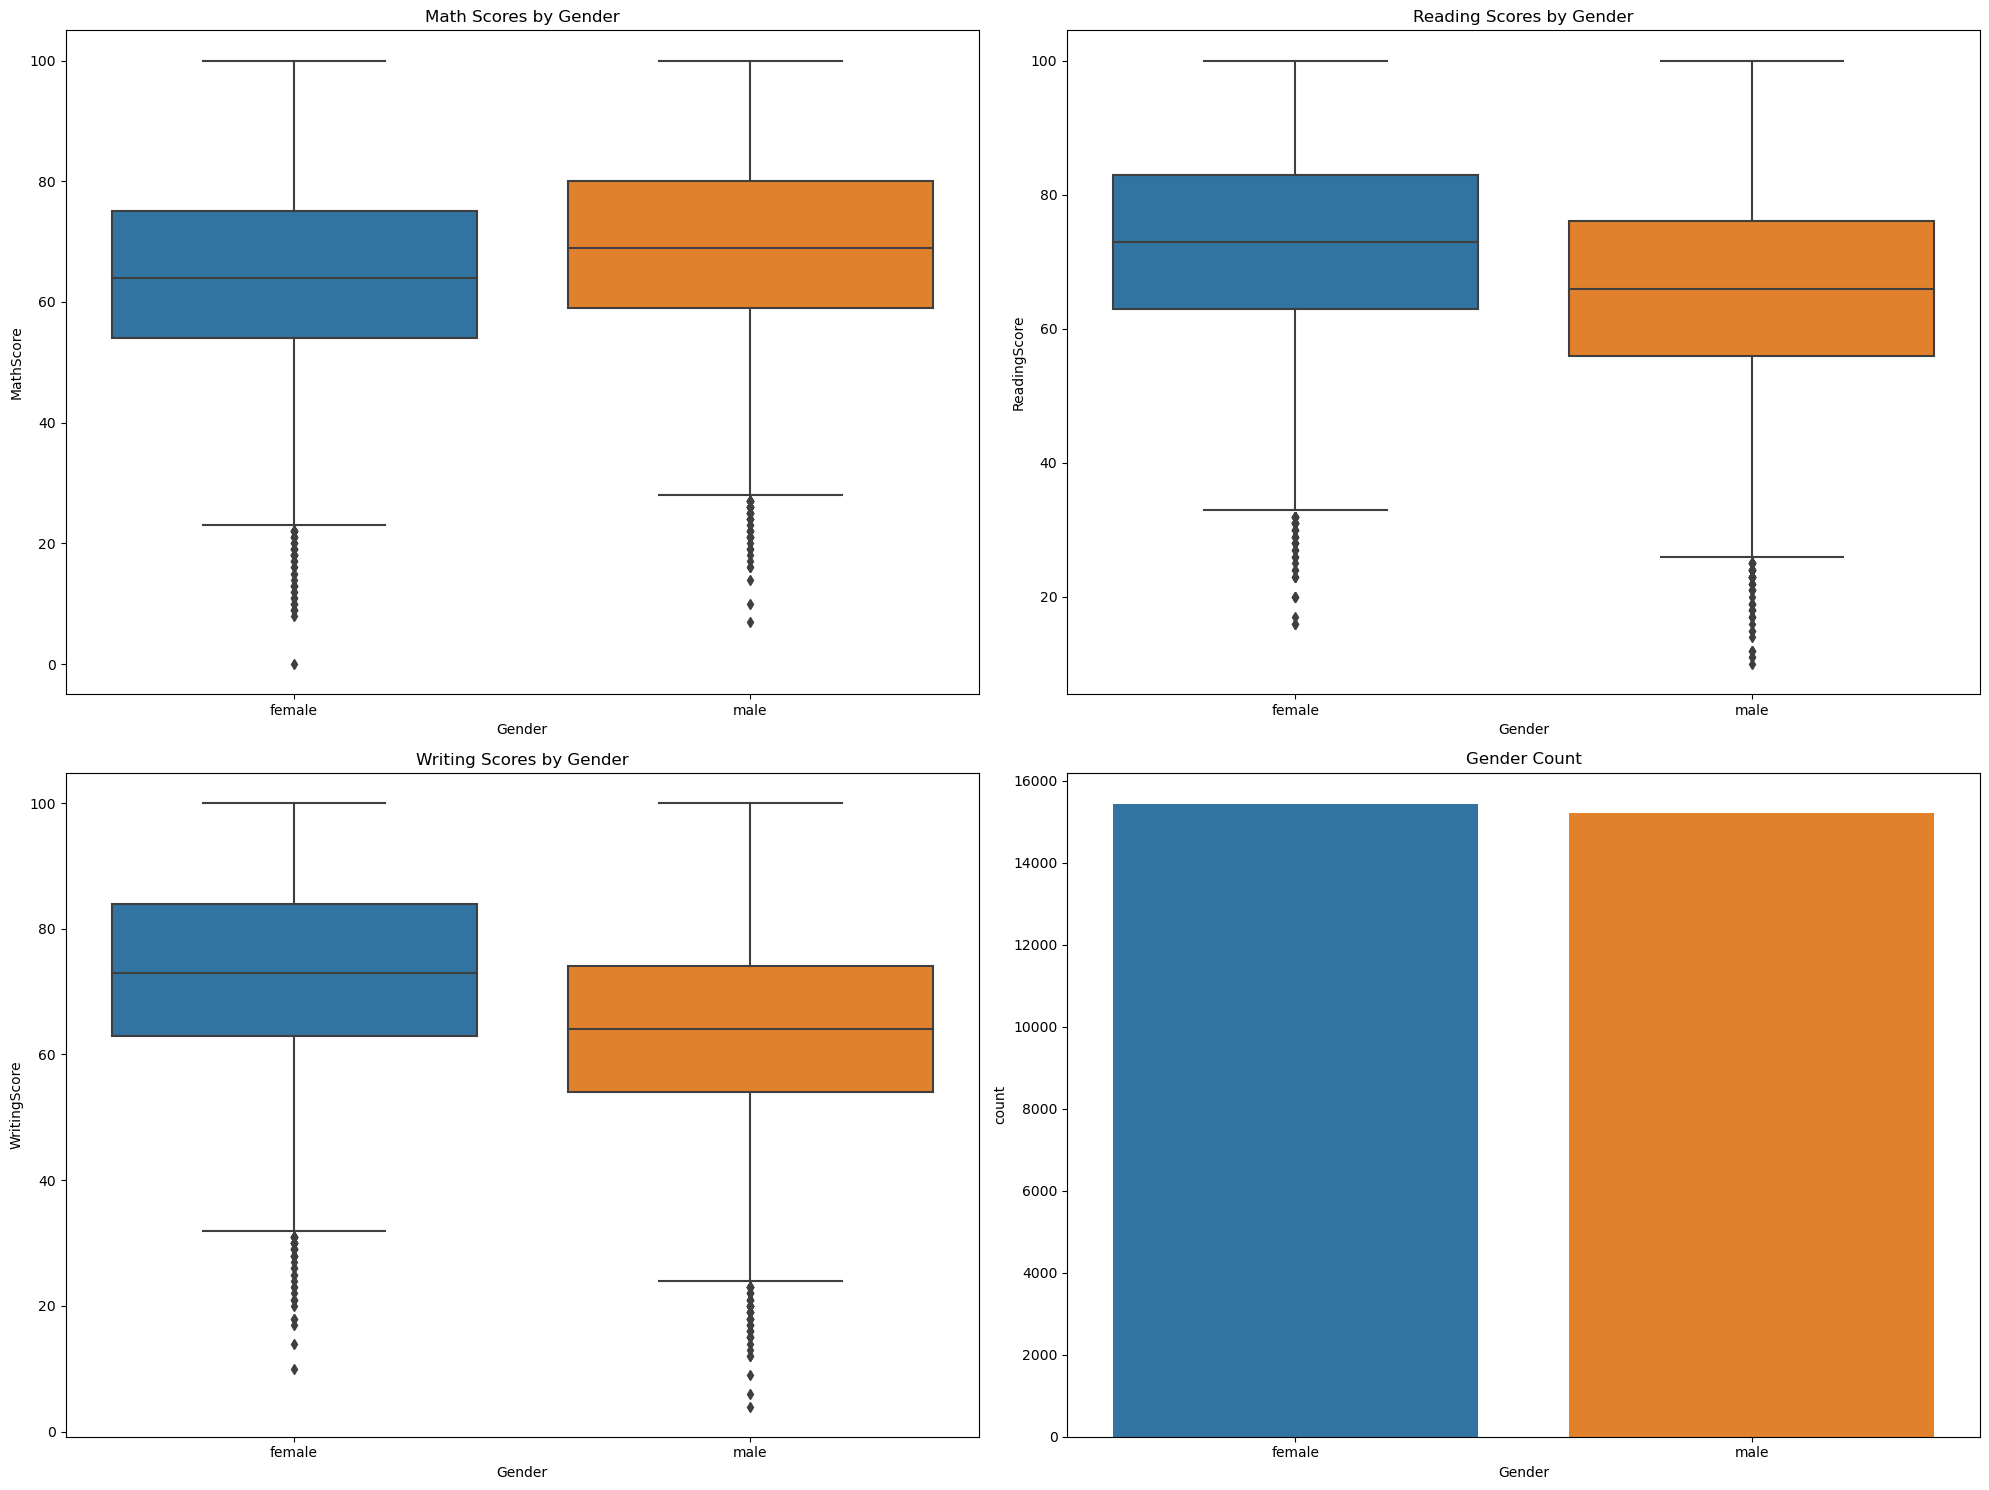

In [31]:
plot_imputed("Gender")

<hr>

## Exploration of Attribute Relationships [↑](#toc)
<a class="anchor" id="explore"></a>


#### Cross tabulation [↑](#toc)
<a class="anchor" id="cross"></a>

**Cross Tabulation Defined:**
- A statistical technique used to explore relationships between two categorical variables. It organizes the data into a table format, with one variable represented by rows and the other variable represented by columns. Each cell in the table shows the count or frequency of occurrences for a combination of categories from both variables. Cross tabulation enables the examination of how the two variables relate to each other and helps identify patterns, dependencies, or associations between the attributes.

In [32]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"

In [33]:
df["MathResult"] = df["MathScore"].apply(pass_fail)

In [34]:
df["ReadingResult"] = df["ReadingScore"].apply(pass_fail)

In [35]:
df["WritingResult"] = df["WritingScore"].apply(pass_fail)

### Math Cross Tabulations


 MathResult          Fail  Pass
ParentEduc                    
some high school    3662  1855
high school         3528  2159
some college        4794  3684
associate's degree  2896  2654
bachelor's degree   1566  1820
master's degree      814  1209 



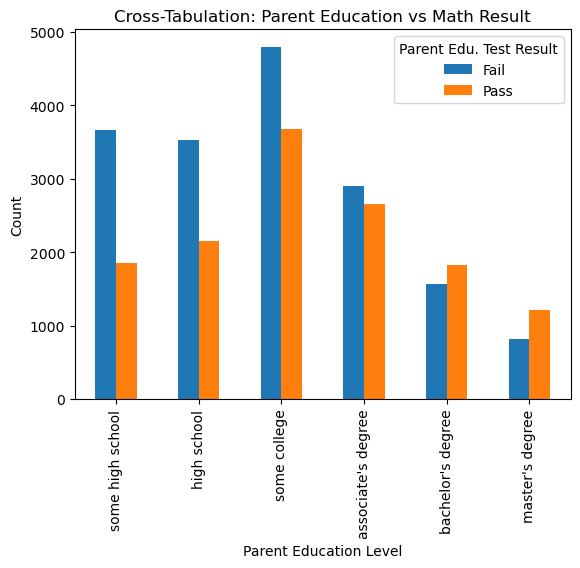

In [36]:
cross_tab = pd.crosstab(df['ParentEduc'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Parent Education vs Math Result')
plt.legend(title='Parent Edu. Test Result')
plt.show()



 MathResult    Fail   Pass
LunchType                
free/reduced  8147   2589
standard      9113  10792 



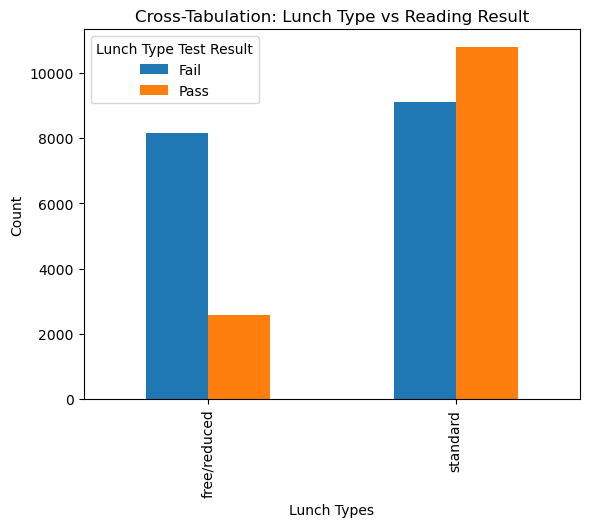

In [37]:
cross_tab = pd.crosstab(df['LunchType'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Lunch Types')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Lunch Type vs Reading Result')
plt.legend(title='Lunch Type Test Result')
plt.show()



 MathResult   Fail  Pass
EthnicGroup            
group A      1465   754
group B      3751  2075
group C      6673  4379
group D      4010  3493
group E      1361  2680 



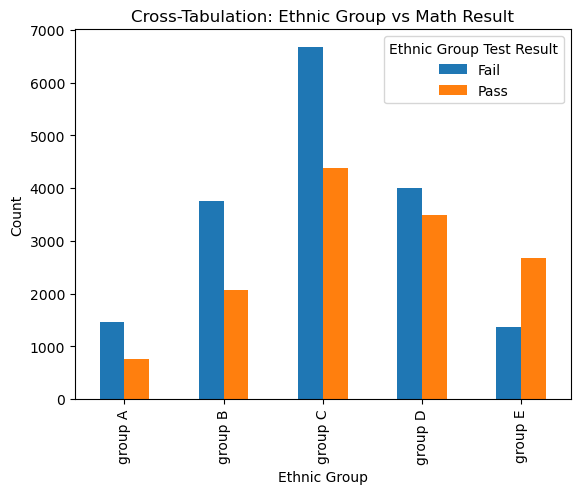

In [38]:
cross_tab = pd.crosstab(df['EthnicGroup'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Ethnic Group vs Math Result')
plt.legend(title='Ethnic Group Test Result')
plt.show()


 MathResult   Fail  Pass
TestPrep               
completed    4848  5107
none        12412  8274 



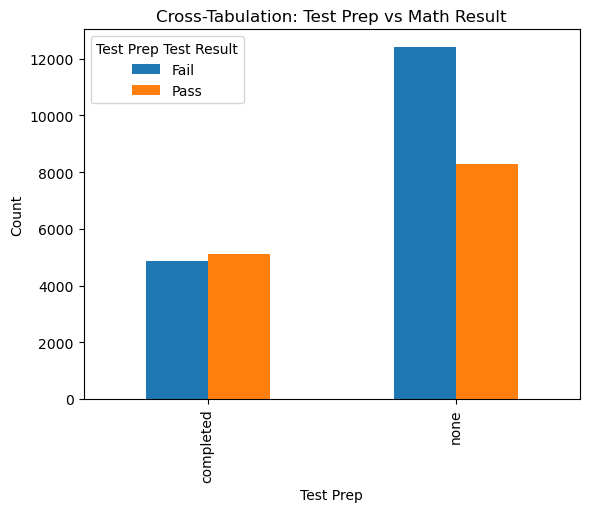

In [39]:
cross_tab = pd.crosstab(df['TestPrep'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Test Prep')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Test Prep vs Math Result')
plt.legend(title='Test Prep Test Result')
plt.show()

### Reading Cross Tabulations


 MathResult          Fail  Pass
ParentEduc                    
some high school    3662  1855
high school         3528  2159
some college        4794  3684
associate's degree  2896  2654
bachelor's degree   1566  1820
master's degree      814  1209 



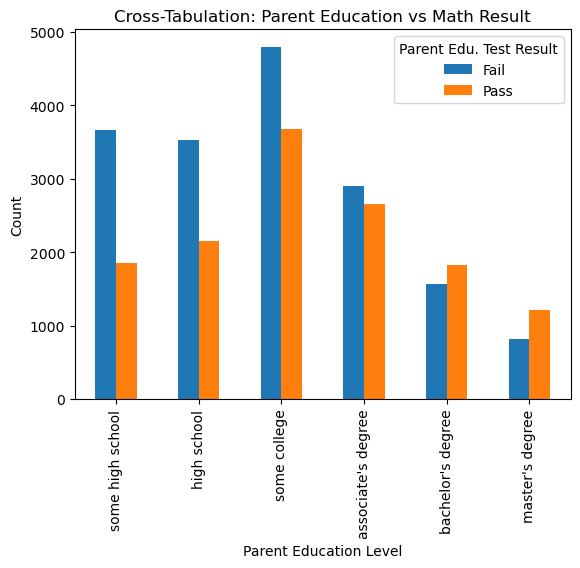

In [40]:
cross_tab = pd.crosstab(df['ParentEduc'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Parent Education vs Math Result')
plt.legend(title='Parent Edu. Test Result')
plt.show()



 MathResult    Fail   Pass
LunchType                
free/reduced  8147   2589
standard      9113  10792 



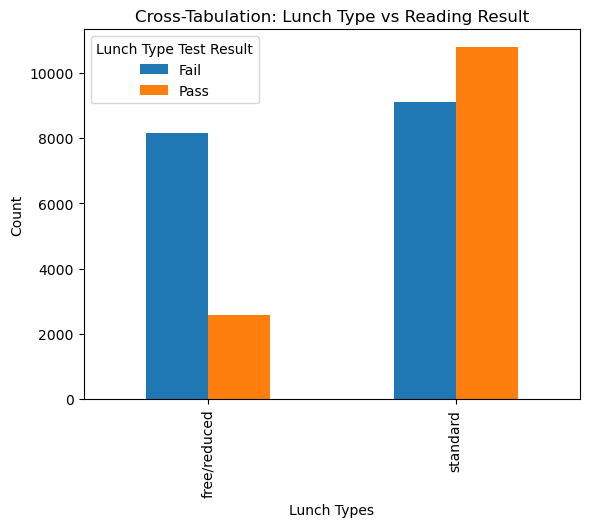

In [41]:
cross_tab = pd.crosstab(df['LunchType'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Lunch Types')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Lunch Type vs Reading Result')
plt.legend(title='Lunch Type Test Result')
plt.show()


 MathResult   Fail  Pass
EthnicGroup            
group A      1465   754
group B      3751  2075
group C      6673  4379
group D      4010  3493
group E      1361  2680 



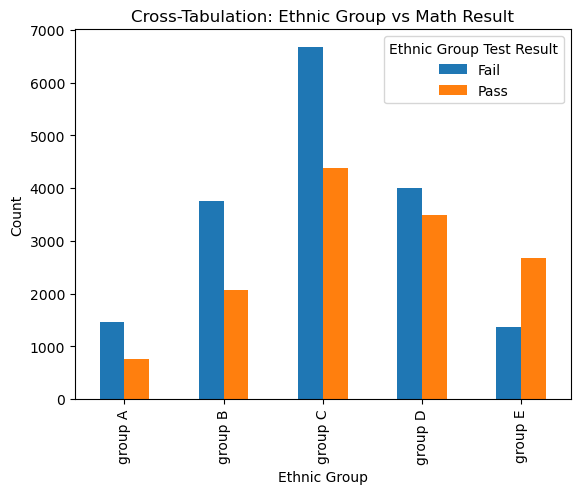

In [42]:
cross_tab = pd.crosstab(df['EthnicGroup'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Ethnic Group vs Math Result')
plt.legend(title='Ethnic Group Test Result')
plt.show()


 MathResult   Fail  Pass
TestPrep               
completed    4848  5107
none        12412  8274 



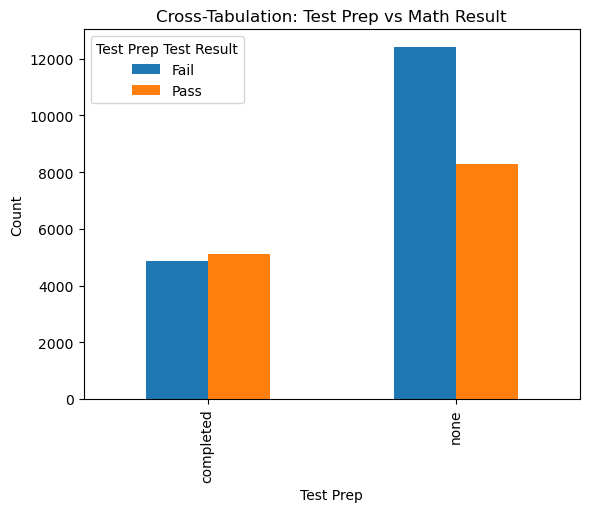

In [43]:
cross_tab = pd.crosstab(df['TestPrep'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Test Prep')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Test Prep vs Math Result')
plt.legend(title='Test Prep Test Result')
plt.show()

### Writing Cross Tabulations


 MathResult          Fail  Pass
ParentEduc                    
some high school    3662  1855
high school         3528  2159
some college        4794  3684
associate's degree  2896  2654
bachelor's degree   1566  1820
master's degree      814  1209 



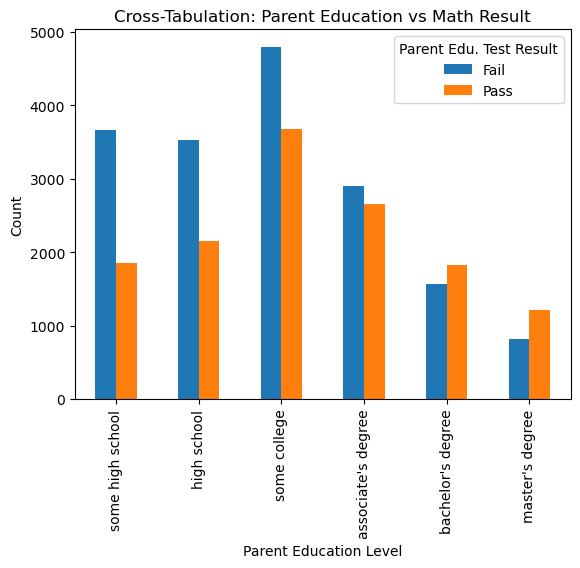

In [44]:
cross_tab = pd.crosstab(df['ParentEduc'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Parent Education vs Math Result')
plt.legend(title='Parent Edu. Test Result')
plt.show()



 MathResult    Fail   Pass
LunchType                
free/reduced  8147   2589
standard      9113  10792 



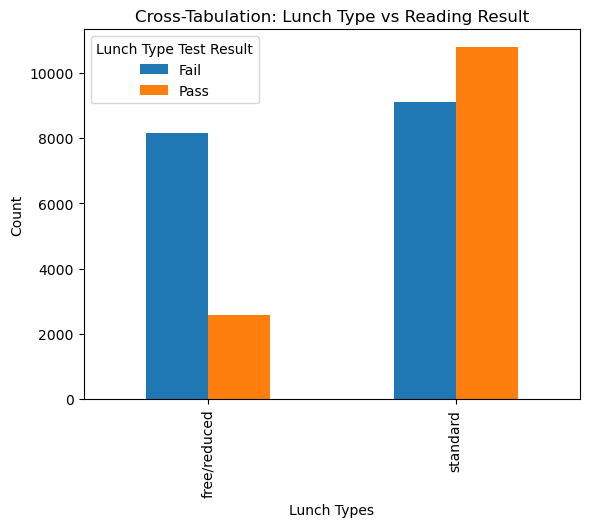

In [45]:
cross_tab = pd.crosstab(df['LunchType'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Lunch Types')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Lunch Type vs Reading Result')
plt.legend(title='Lunch Type Test Result')
plt.show()


 MathResult   Fail  Pass
EthnicGroup            
group A      1465   754
group B      3751  2075
group C      6673  4379
group D      4010  3493
group E      1361  2680 



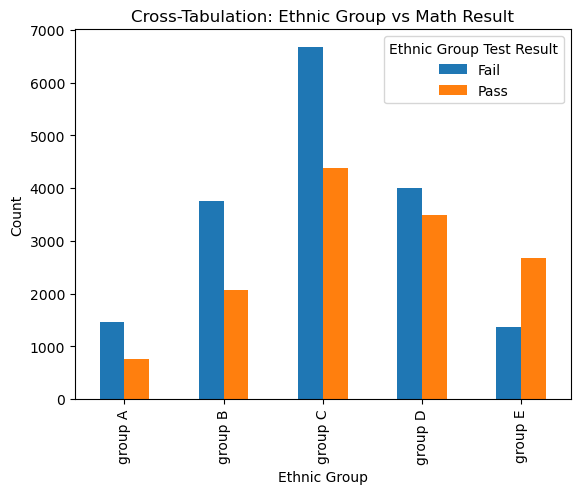

In [46]:
cross_tab = pd.crosstab(df['EthnicGroup'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Ethnic Group vs Math Result')
plt.legend(title='Ethnic Group Test Result')
plt.show()


 MathResult   Fail  Pass
TestPrep               
completed    4848  5107
none        12412  8274 



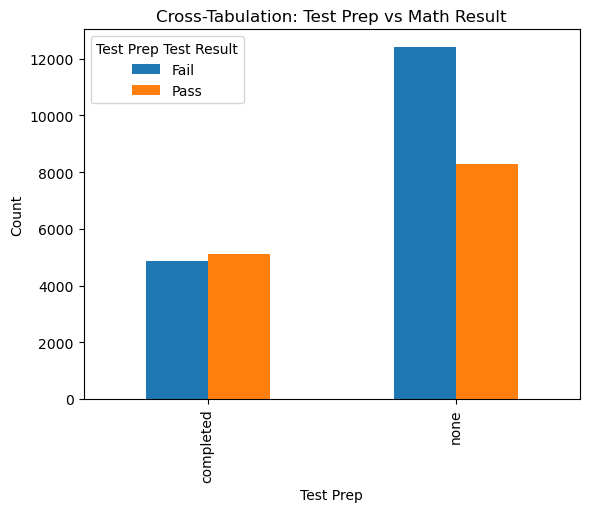

In [47]:
cross_tab = pd.crosstab(df['TestPrep'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")
# Plotting the cross-tabulation table as a grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Test Prep')
plt.ylabel('Count')
plt.title('Cross-Tabulation: Test Prep vs Math Result')
plt.legend(title='Test Prep Test Result')
plt.show()

### Correlation Heatmaps [↑](#toc)
<a class="anchor" id="heatmap"></a>

**Correlation Heatmap Defined:**
- Correlation heatmaps are visual representations that use color gradients to depict the correlation coefficients between pairs of attributes or variables in a dataset. They provide a concise overview of the strength and direction of relationships between variables. Correlation heatmaps are useful in exploring attribute relationships because they allow for quick identification of patterns and dependencies, highlighting variables that are positively or negatively correlated.

In [48]:
df["EthnicGroup"] = df["EthnicGroup"].astype(object)
df["ParentEduc"] = df["ParentEduc"].astype(object)

# new dfs with/without object type
df_obj = df.select_dtypes(include = "object")
df_num = df.select_dtypes(exclude = "object")

# view levels of columns
for col in df_obj.columns:
    unique_values = df_obj[col].unique()
    print(f"Unique values in column '{col}':{unique_values}")

Unique values in column 'Gender':['female' 'male']
Unique values in column 'EthnicGroup':['group C' 'group B' 'group A' 'group D' 'group E']
Unique values in column 'ParentEduc':["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in column 'LunchType':['standard' 'free/reduced']
Unique values in column 'TestPrep':['none' 'completed']
Unique values in column 'ParentMaritalStatus':['married' 'single' 'widowed' 'divorced']
Unique values in column 'PracticeSport':['regularly' 'sometimes' 'never']
Unique values in column 'IsFirstChild':['yes' 'no']
Unique values in column 'TransportMeans':['school_bus' 'private']
Unique values in column 'WklyStudyHours':['< 5' '5 - 10' '> 10']
Unique values in column 'MathResult':['Pass' 'Fail']
Unique values in column 'ReadingResult':['Pass' 'Fail']
Unique values in column 'WritingResult':['Pass' 'Fail']


In [49]:
# creating dummy var for the object type df. 
# dropping first = True for multicollinearity dummy trap
df_obj = pd.get_dummies(df_obj, drop_first = True)

# combining into one df
cor_df = pd.concat([df_num, df_obj], axis = 1)

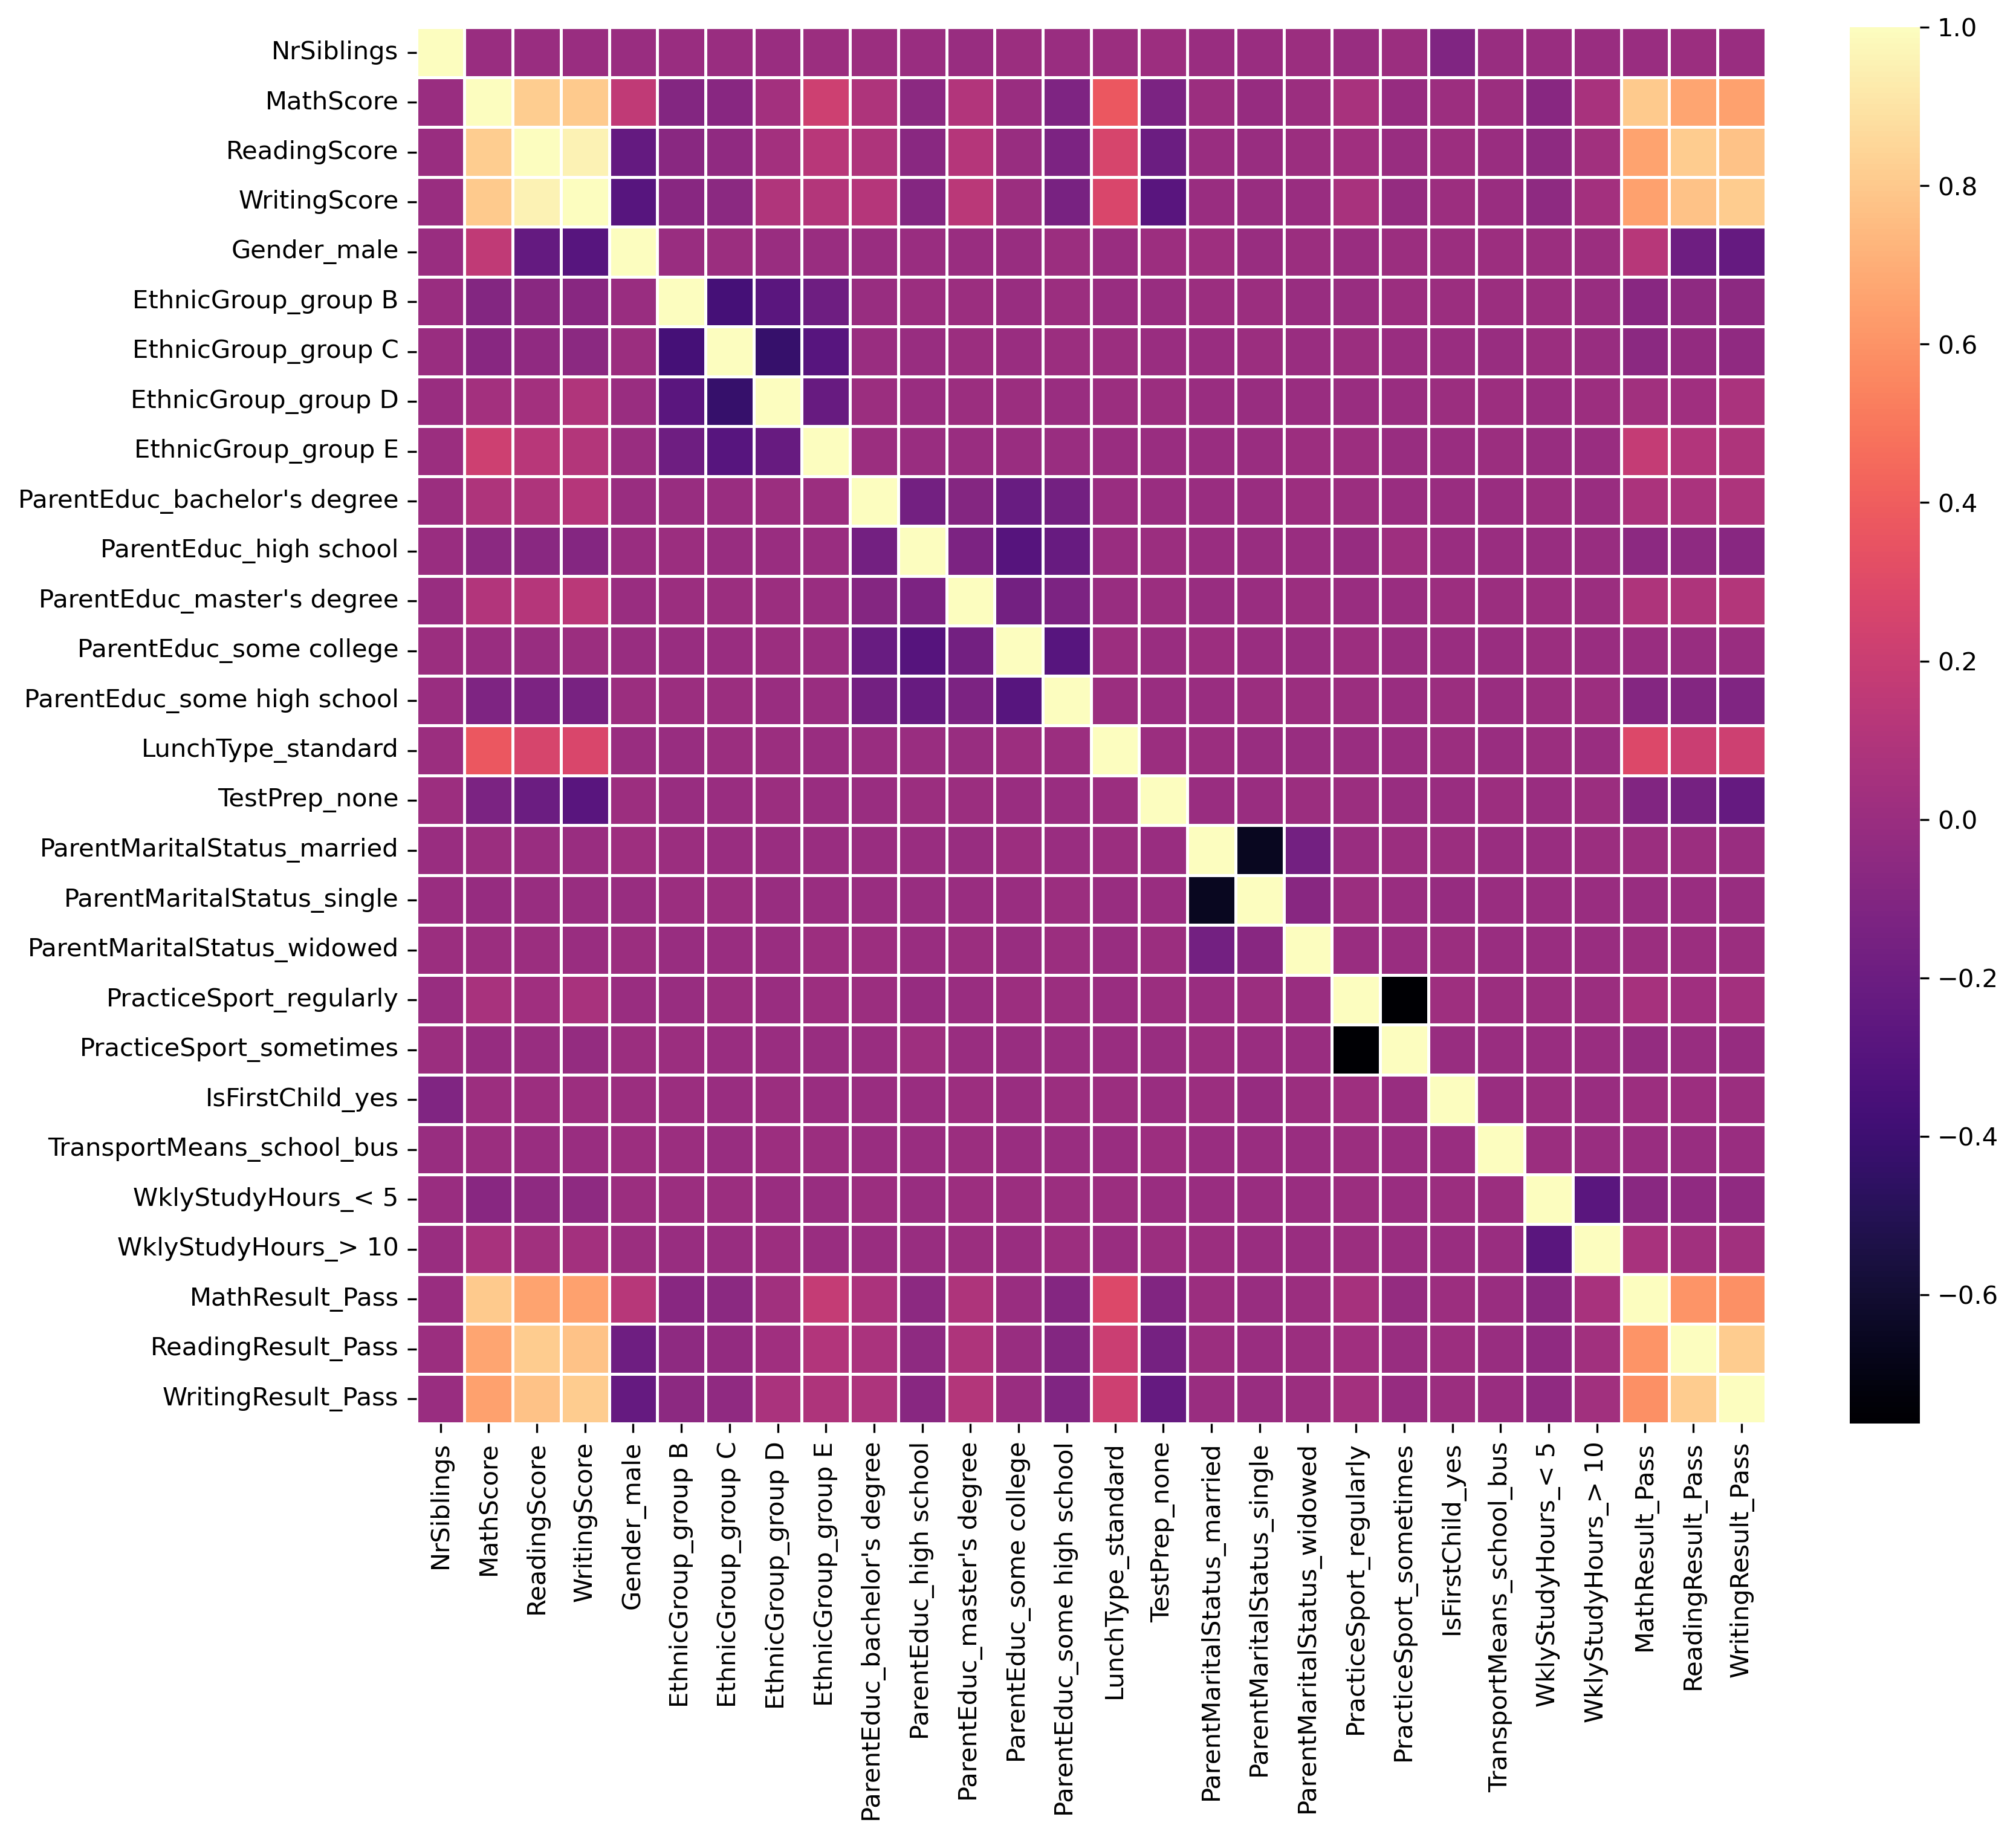

In [50]:
plt.figure(figsize=(12,10), dpi=300)
sns.heatmap(cor_df.corr(),cmap = "magma", linecolor='white', linewidths=.75)
plt.show()

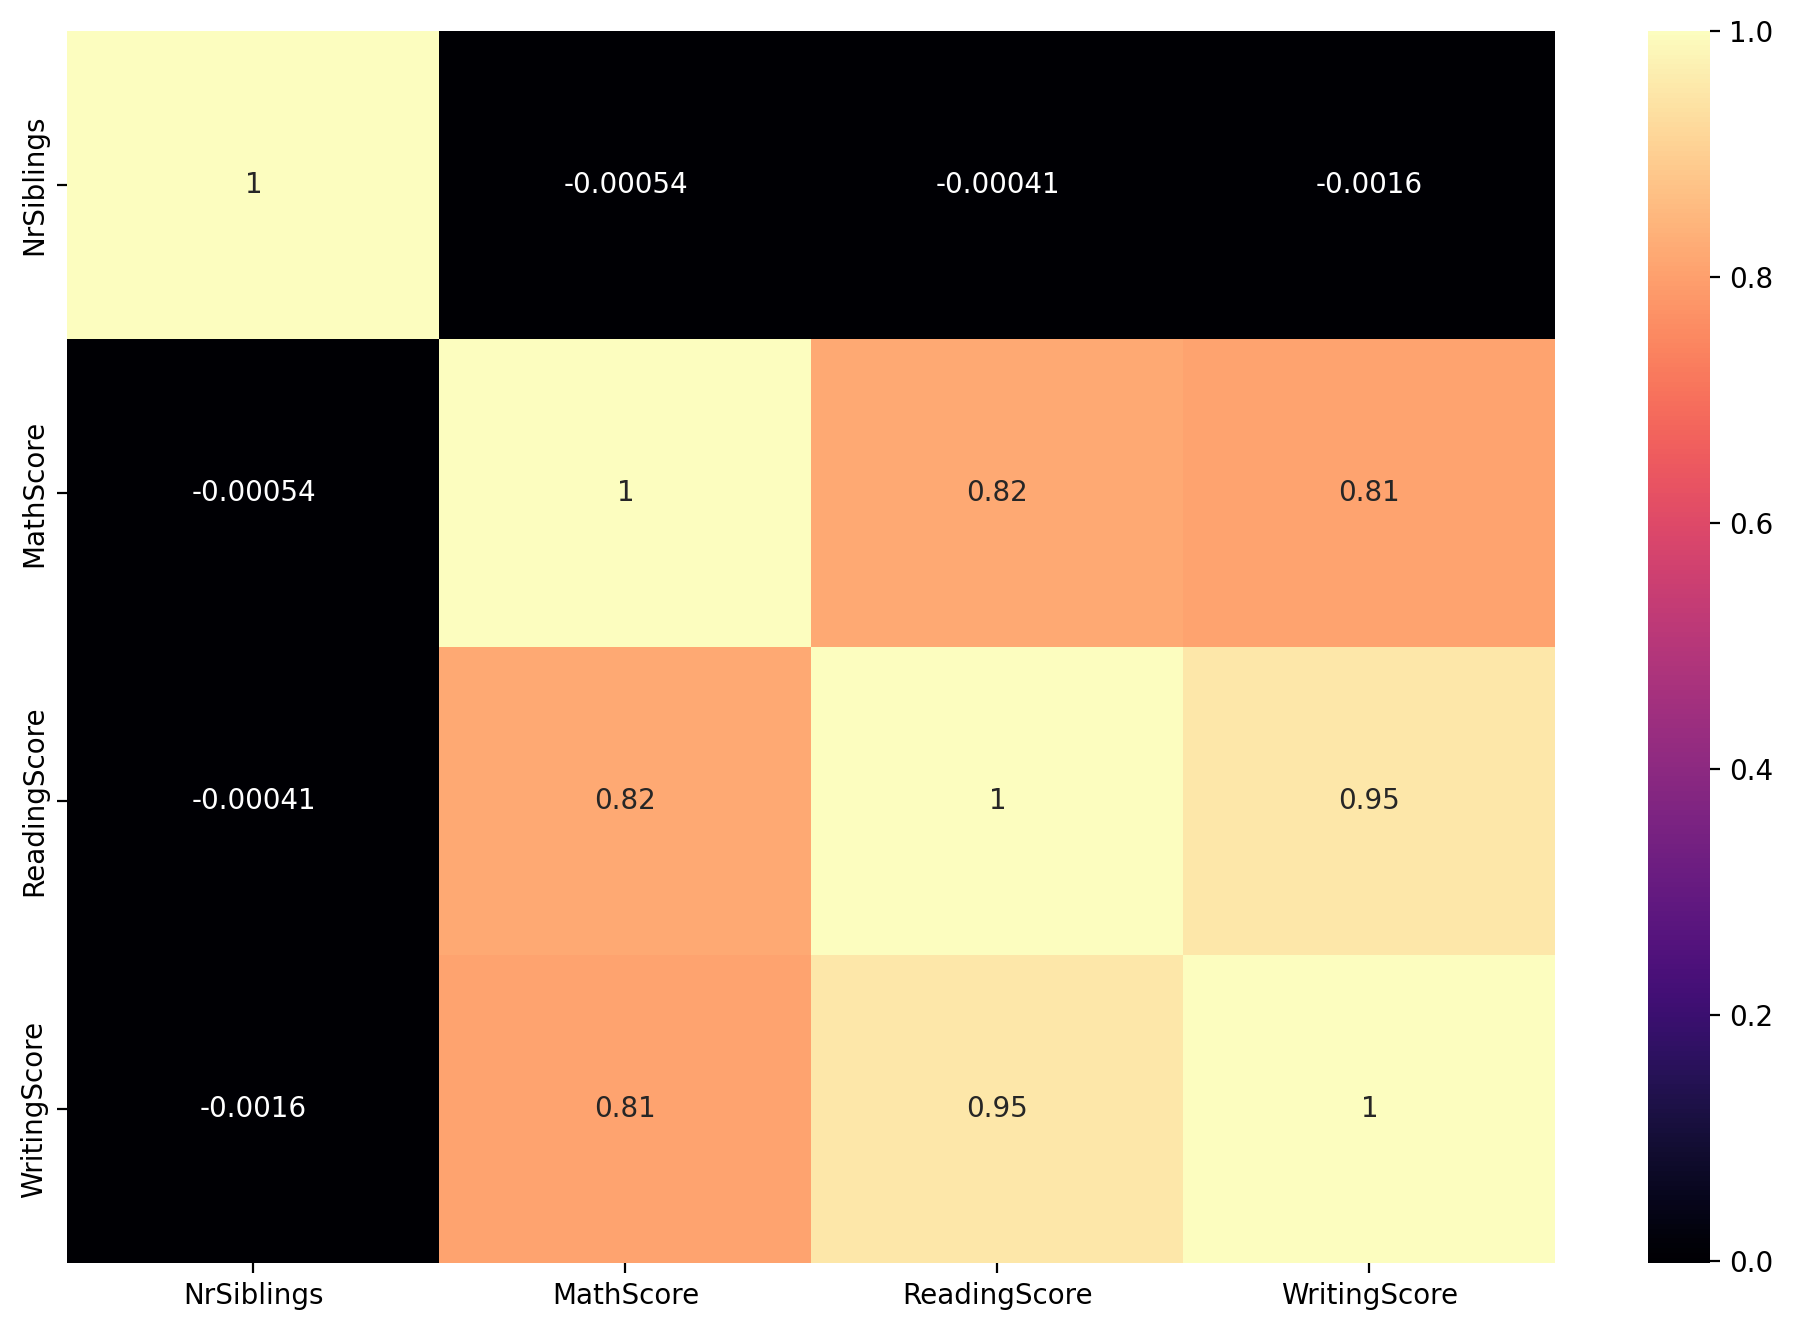

In [51]:
# raw data corr viz. 
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), cmap = "magma", annot=True)
plt.show()

In [52]:
cor_df.corr()["WritingScore"].sort_values(ascending=False)

WritingScore                    1.000000
ReadingScore                    0.952584
WritingResult_Pass              0.808938
MathScore                       0.807118
ReadingResult_Pass              0.773939
MathResult_Pass                 0.650314
LunchType_standard              0.274305
ParentEduc_master's degree      0.136667
ParentEduc_bachelor's degree    0.112119
EthnicGroup_group E             0.107477
EthnicGroup_group D             0.091160
PracticeSport_regularly         0.056602
WklyStudyHours_> 10             0.039798
IsFirstChild_yes                0.009822
ParentEduc_some college         0.001525
ParentMaritalStatus_widowed     0.001315
ParentMaritalStatus_married    -0.000964
NrSiblings                     -0.001584
TransportMeans_school_bus      -0.004522
ParentMaritalStatus_single     -0.008681
PracticeSport_sometimes        -0.022002
WklyStudyHours_< 5             -0.052162
EthnicGroup_group C            -0.061737
EthnicGroup_group B            -0.079176
ParentEduc_high 

When determining Writing Score with correlation, we find that there are several factors that can help us. 

Firstly, the strongest relationships with the Writing scores are the other two exam scores(Math & Reading). Another strong relationships are the exam results which shouldn't come as a surprise since they're related to the score. Everything else can be classified as weak since their correlation is between 0.274 and -0.28. Some weak relationships that stand out are the gender(male) at -0.289312, TestPrep(none) at -0.282308 and LunchType(standard) at 0.274305. 

This seems to affirm our findings in the previous section when we created boxplot to explore any relationship between these variables with the Writing Score.

In [53]:
cor_df.corr()["ReadingScore"].sort_values(ascending=False)

ReadingScore                    1.000000
WritingScore                    0.952584
MathScore                       0.817825
ReadingResult_Pass              0.812386
WritingResult_Pass              0.773737
MathResult_Pass                 0.657498
LunchType_standard              0.258152
EthnicGroup_group E             0.128716
ParentEduc_master's degree      0.116293
ParentEduc_bachelor's degree    0.087993
EthnicGroup_group D             0.038766
WklyStudyHours_> 10             0.030269
PracticeSport_regularly         0.028254
IsFirstChild_yes                0.012117
ParentMaritalStatus_widowed     0.002603
ParentMaritalStatus_married     0.000164
NrSiblings                     -0.000412
TransportMeans_school_bus      -0.004933
ParentEduc_some college        -0.007873
ParentMaritalStatus_single     -0.008195
PracticeSport_sometimes        -0.008583
EthnicGroup_group C            -0.043759
WklyStudyHours_< 5             -0.049362
EthnicGroup_group B            -0.067535
ParentEduc_high 

The Reading Score seems to tell the same story where Math, Writing Scores and Exam Results have the highest/strongest correlation.  

The other weak variables are the same, but should be given attention to, even though their values are a little different. We have: Gender(male) at -0.237097, TestPrep(none) at -0.204724 and LunchType(standard) at 0.258152. 

In [54]:
cor_df.corr()["MathScore"].sort_values(ascending=False)

MathScore                       1.000000
ReadingScore                    0.817825
WritingScore                    0.807118
MathResult_Pass                 0.802676
ReadingResult_Pass              0.665192
WritingResult_Pass              0.653592
LunchType_standard              0.367942
EthnicGroup_group E             0.221775
Gender_male                     0.162391
ParentEduc_master's degree      0.100001
ParentEduc_bachelor's degree    0.089675
WklyStudyHours_> 10             0.062945
PracticeSport_regularly         0.061482
EthnicGroup_group D             0.041074
IsFirstChild_yes                0.014809
ParentMaritalStatus_widowed     0.007399
ParentMaritalStatus_married     0.007144
TransportMeans_school_bus       0.002351
NrSiblings                     -0.000538
ParentEduc_some college        -0.004527
ParentMaritalStatus_single     -0.014035
PracticeSport_sometimes        -0.018130
ParentEduc_high school         -0.065967
WklyStudyHours_< 5             -0.078084
EthnicGroup_grou

The Math Score correlation is slightly different from our previous two(Writing and Reading). A couple of similarities between this and the previous two are that the other two exams scores and its results have the highest correlation with our interested variable. 

Next, we find that some weak relationship that should be paid attention to are: LunchType(standard) at 0.367942, EthnicGroup(E) at 0.221775, Gender(male) at 0.162391 and, if we want to add a weaker link, we can explore TestPrep(none) at -0.134949.

### Visual Exploration | Extra Plots For Exploring Relationships [↑](#toc)
<a class="anchor" id="plotting"></a>

#### 1) ParentEduc | Gender | Score Visual

Now we want to take a look at the scores when ParentEduc is paired with another variable, so we can understand our data better. In this case, we can see how the scores fare when we pair the education level with Gender. 

On the writing and reading scores, no matter the education level, it seems that the female scores higher than the male. However, the male scores higher in the math scores across all the education levels.

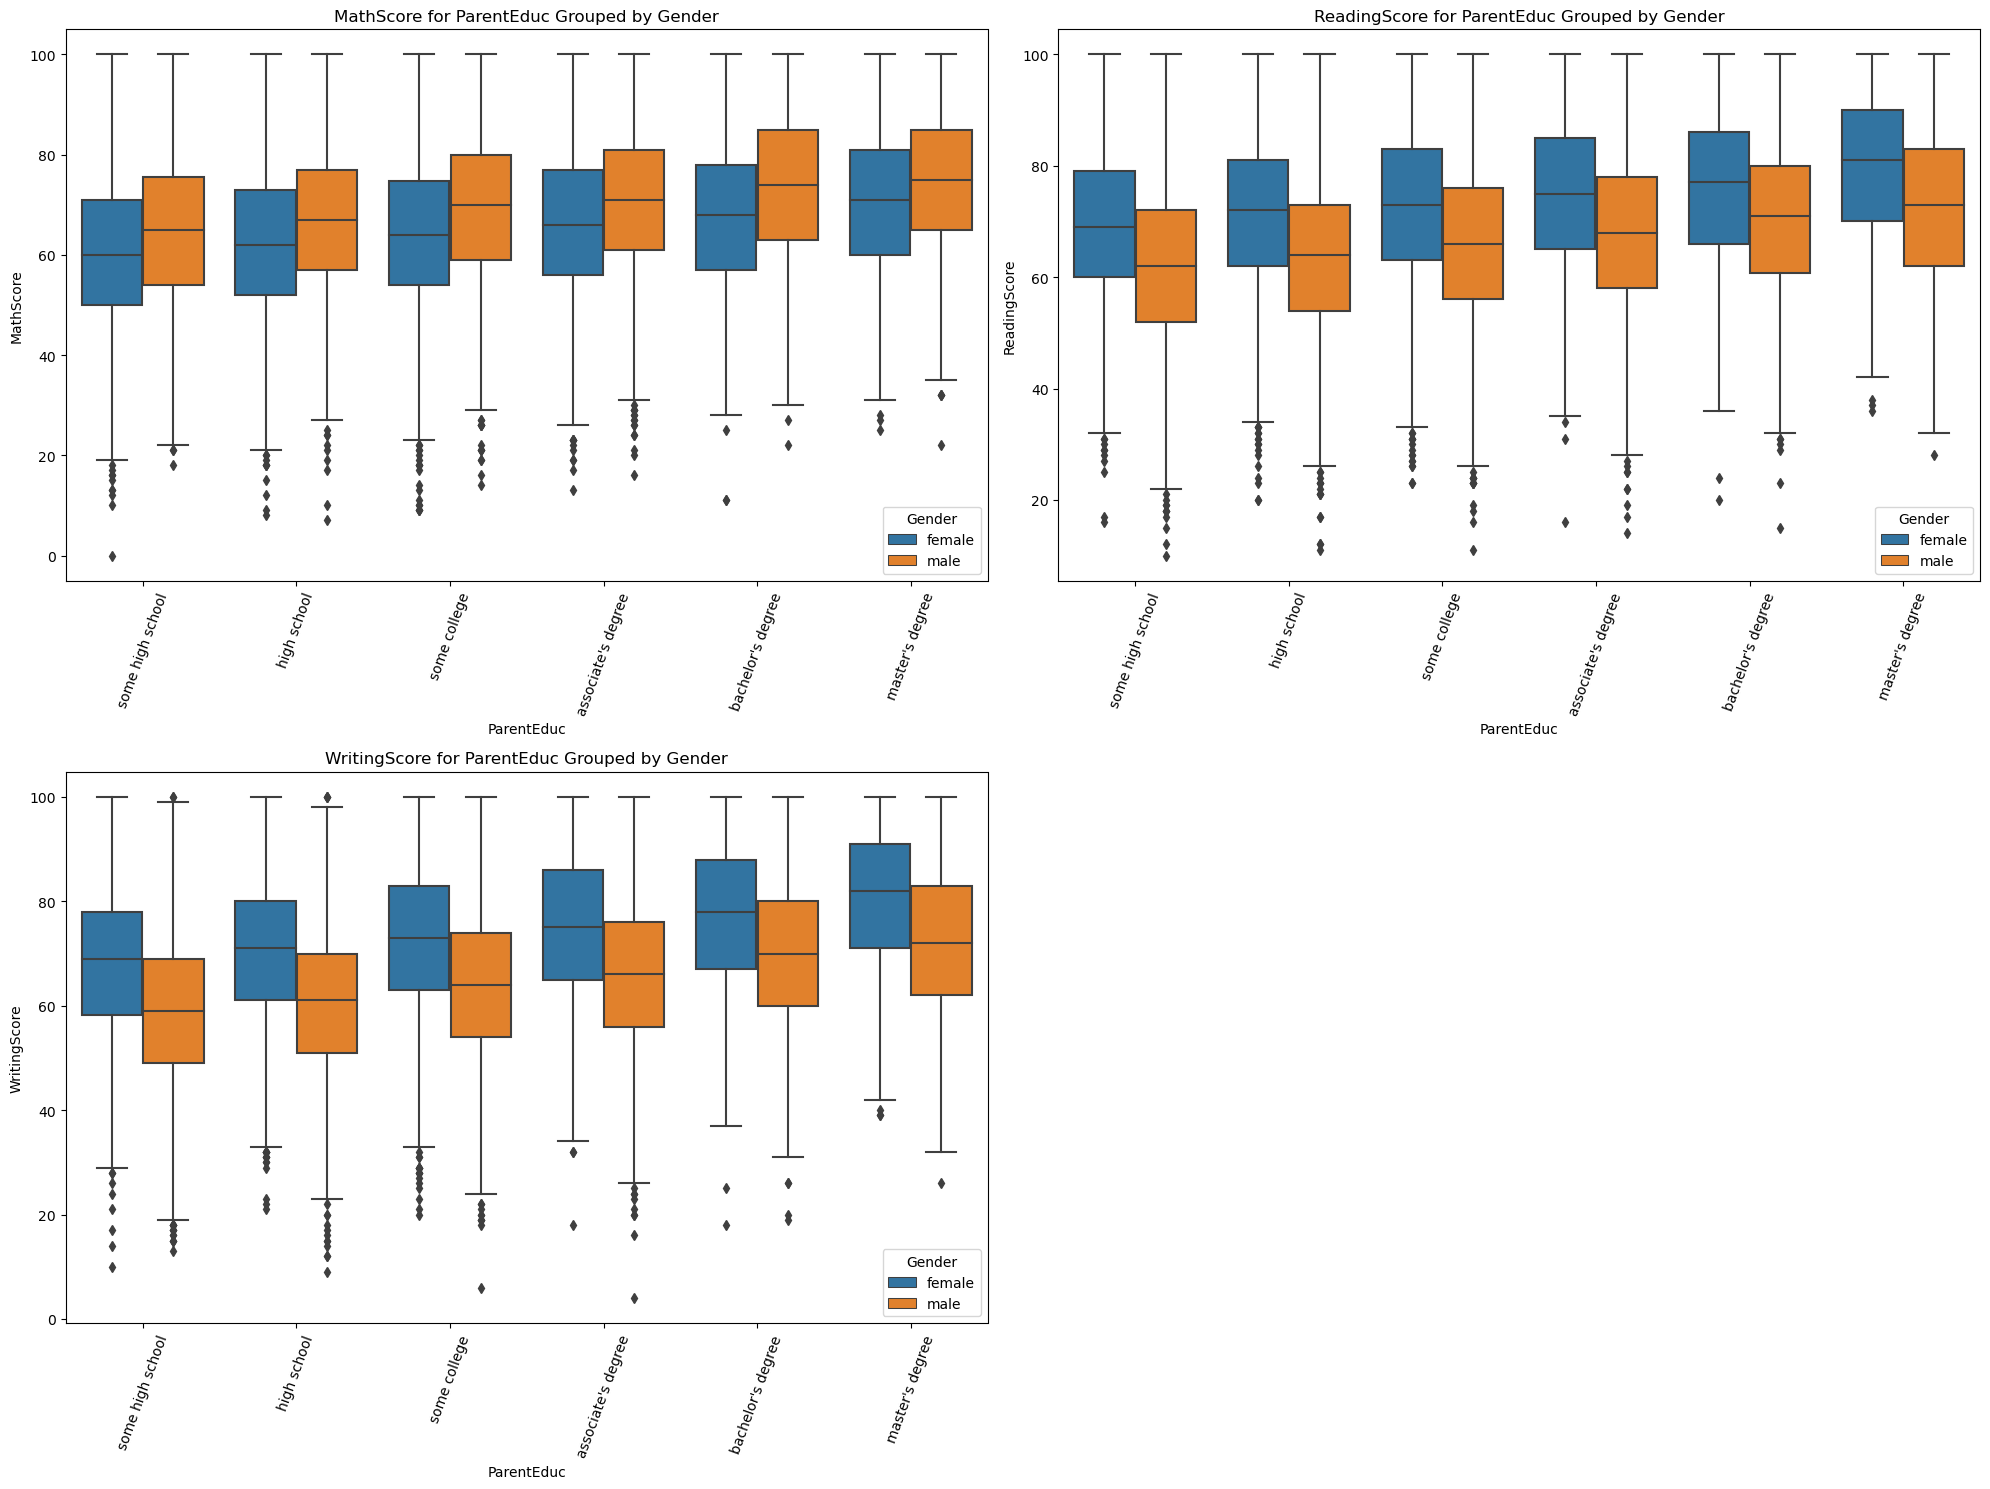

In [55]:
df3["ParentEduc"] = df3["ParentEduc"].astype('category')
df3["ParentEduc"] = df3["ParentEduc"].cat.reorder_categories(["some high school","high school", 
                                                              "some college", "associate's degree", 
                                                              "bachelor's degree", "master's degree"])

plot_imputed_2var("ParentEduc", "Gender")

#### 2) Ethnic Group | Test Prep | Score Visual

Similar to the previous visual analysis, we want to add another variable to see how the scores fare, but, this time, we want to see it with Ethnic Group and Test Prep.

Across the board, we see that those who've completed their test preps achieve a higher score than those who have done none, which shouldn't come as a surprise. It seems like Group E scores the highest overall, except when we examine the Writing Score. Group E and D seem to be neck-and-neck, having roughly the same score with possibly an infinitesimal
difference. 

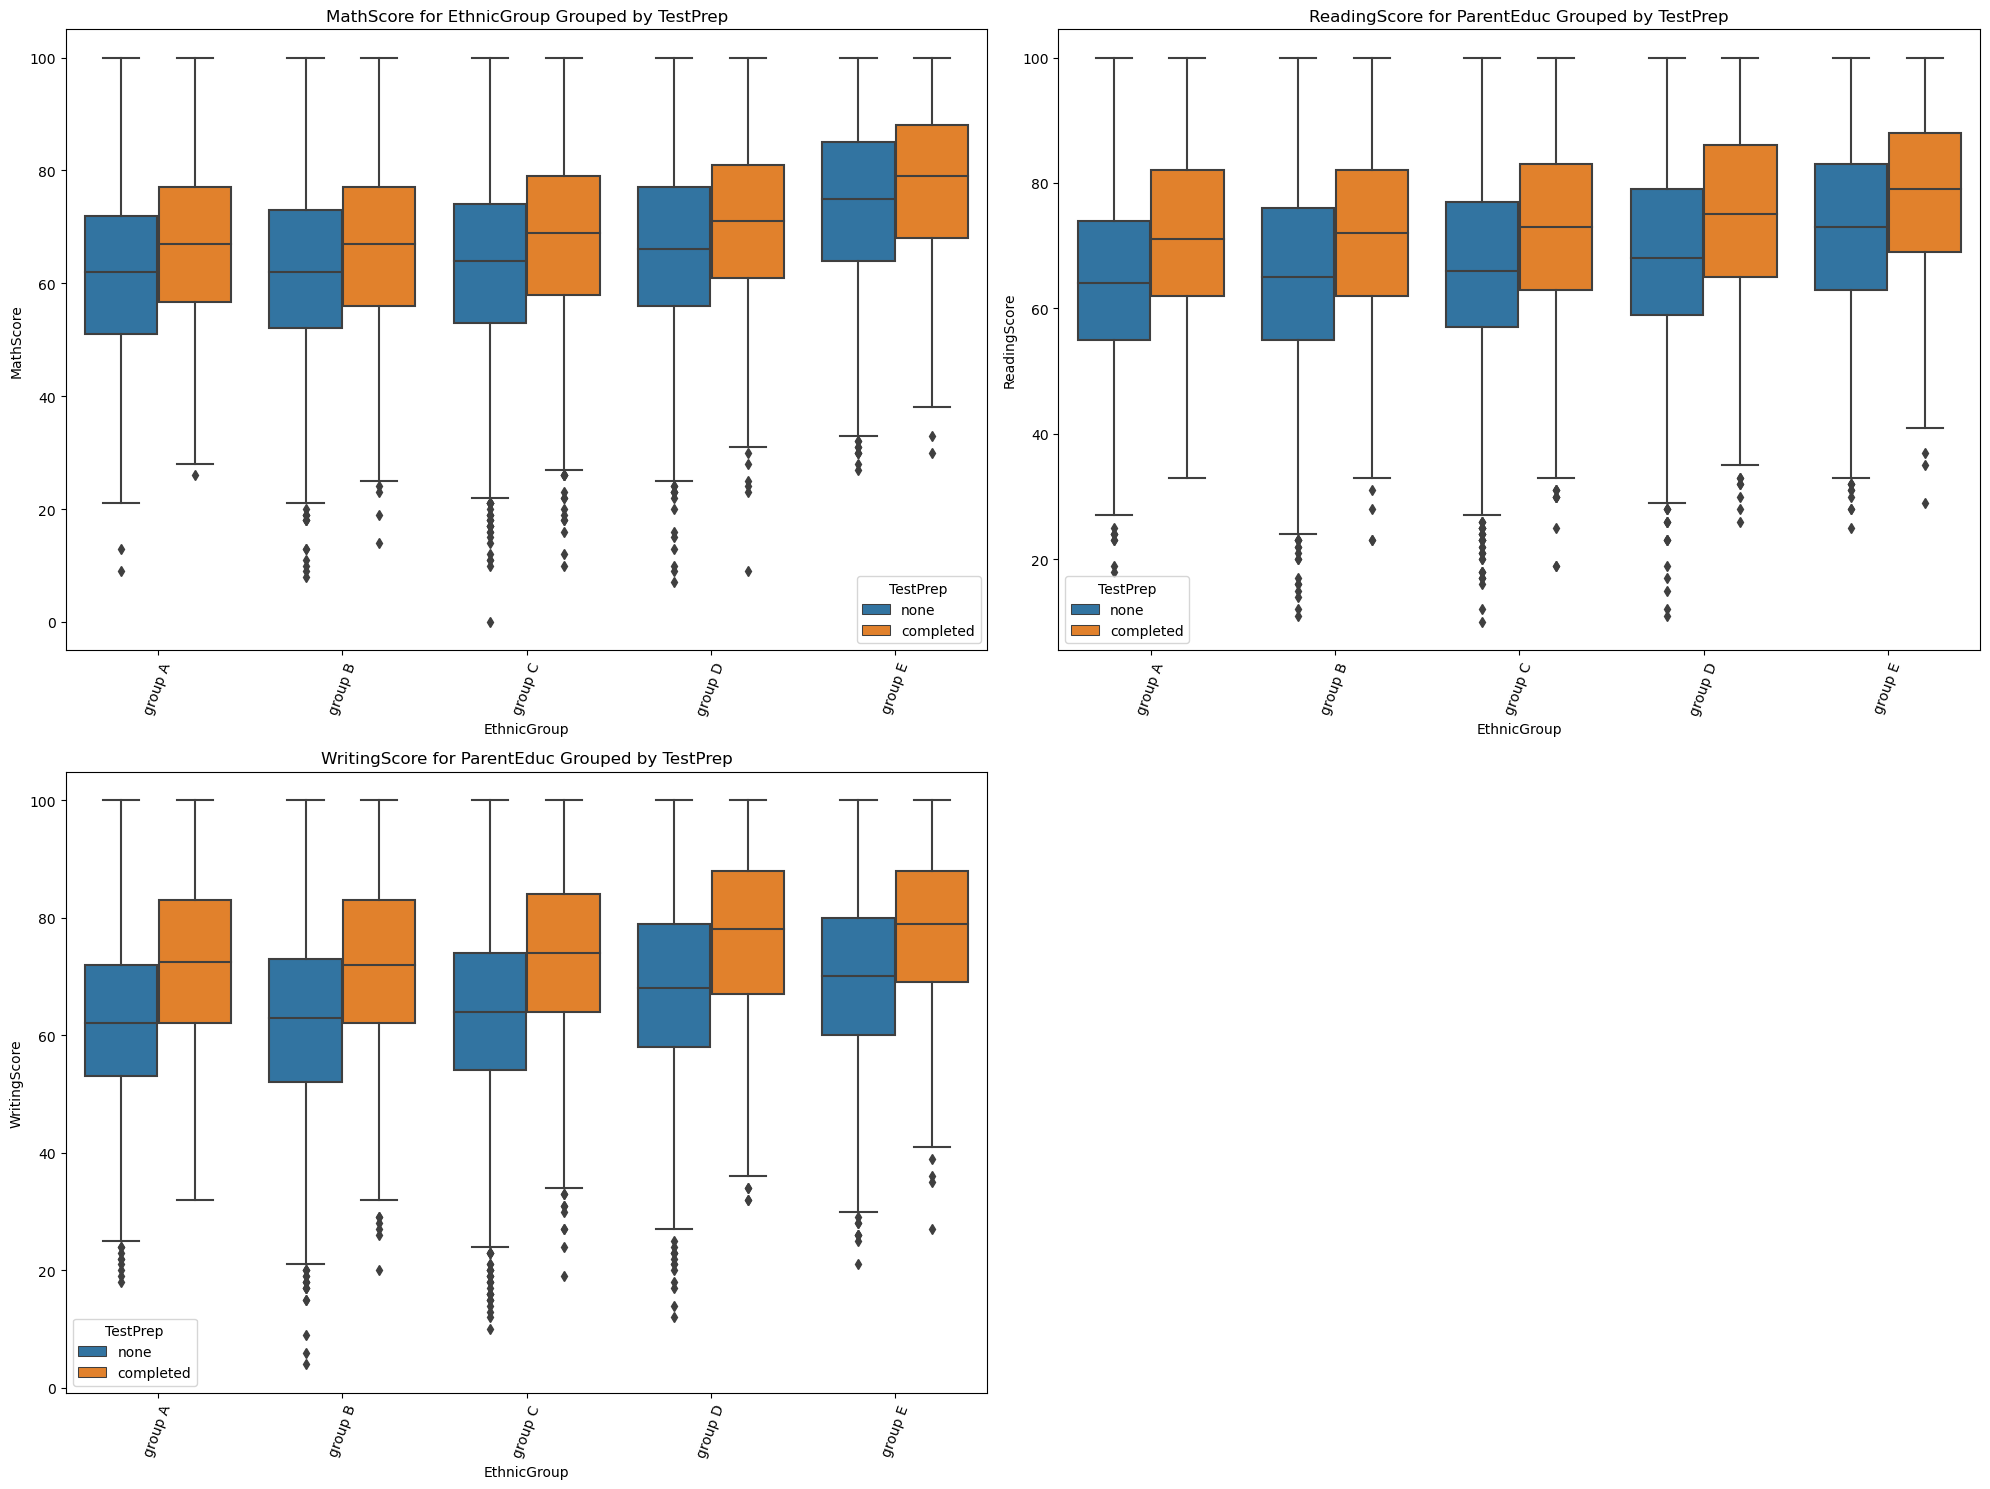

In [56]:
df3['EthnicGroup'] = df3['EthnicGroup'].astype('category')
df3["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E"])

plot_imputed_2var("EthnicGroup", "TestPrep")

#### 3) Test Prep | Gender | Score Visual
Taking Test Prep and Scores and adding Gender, we want to create a multivariate plot with all the variables. 

Similar to what we found above, those who've completed the test prep have higher scores. Females have a higher median on reading and writing while male take the prize for math.

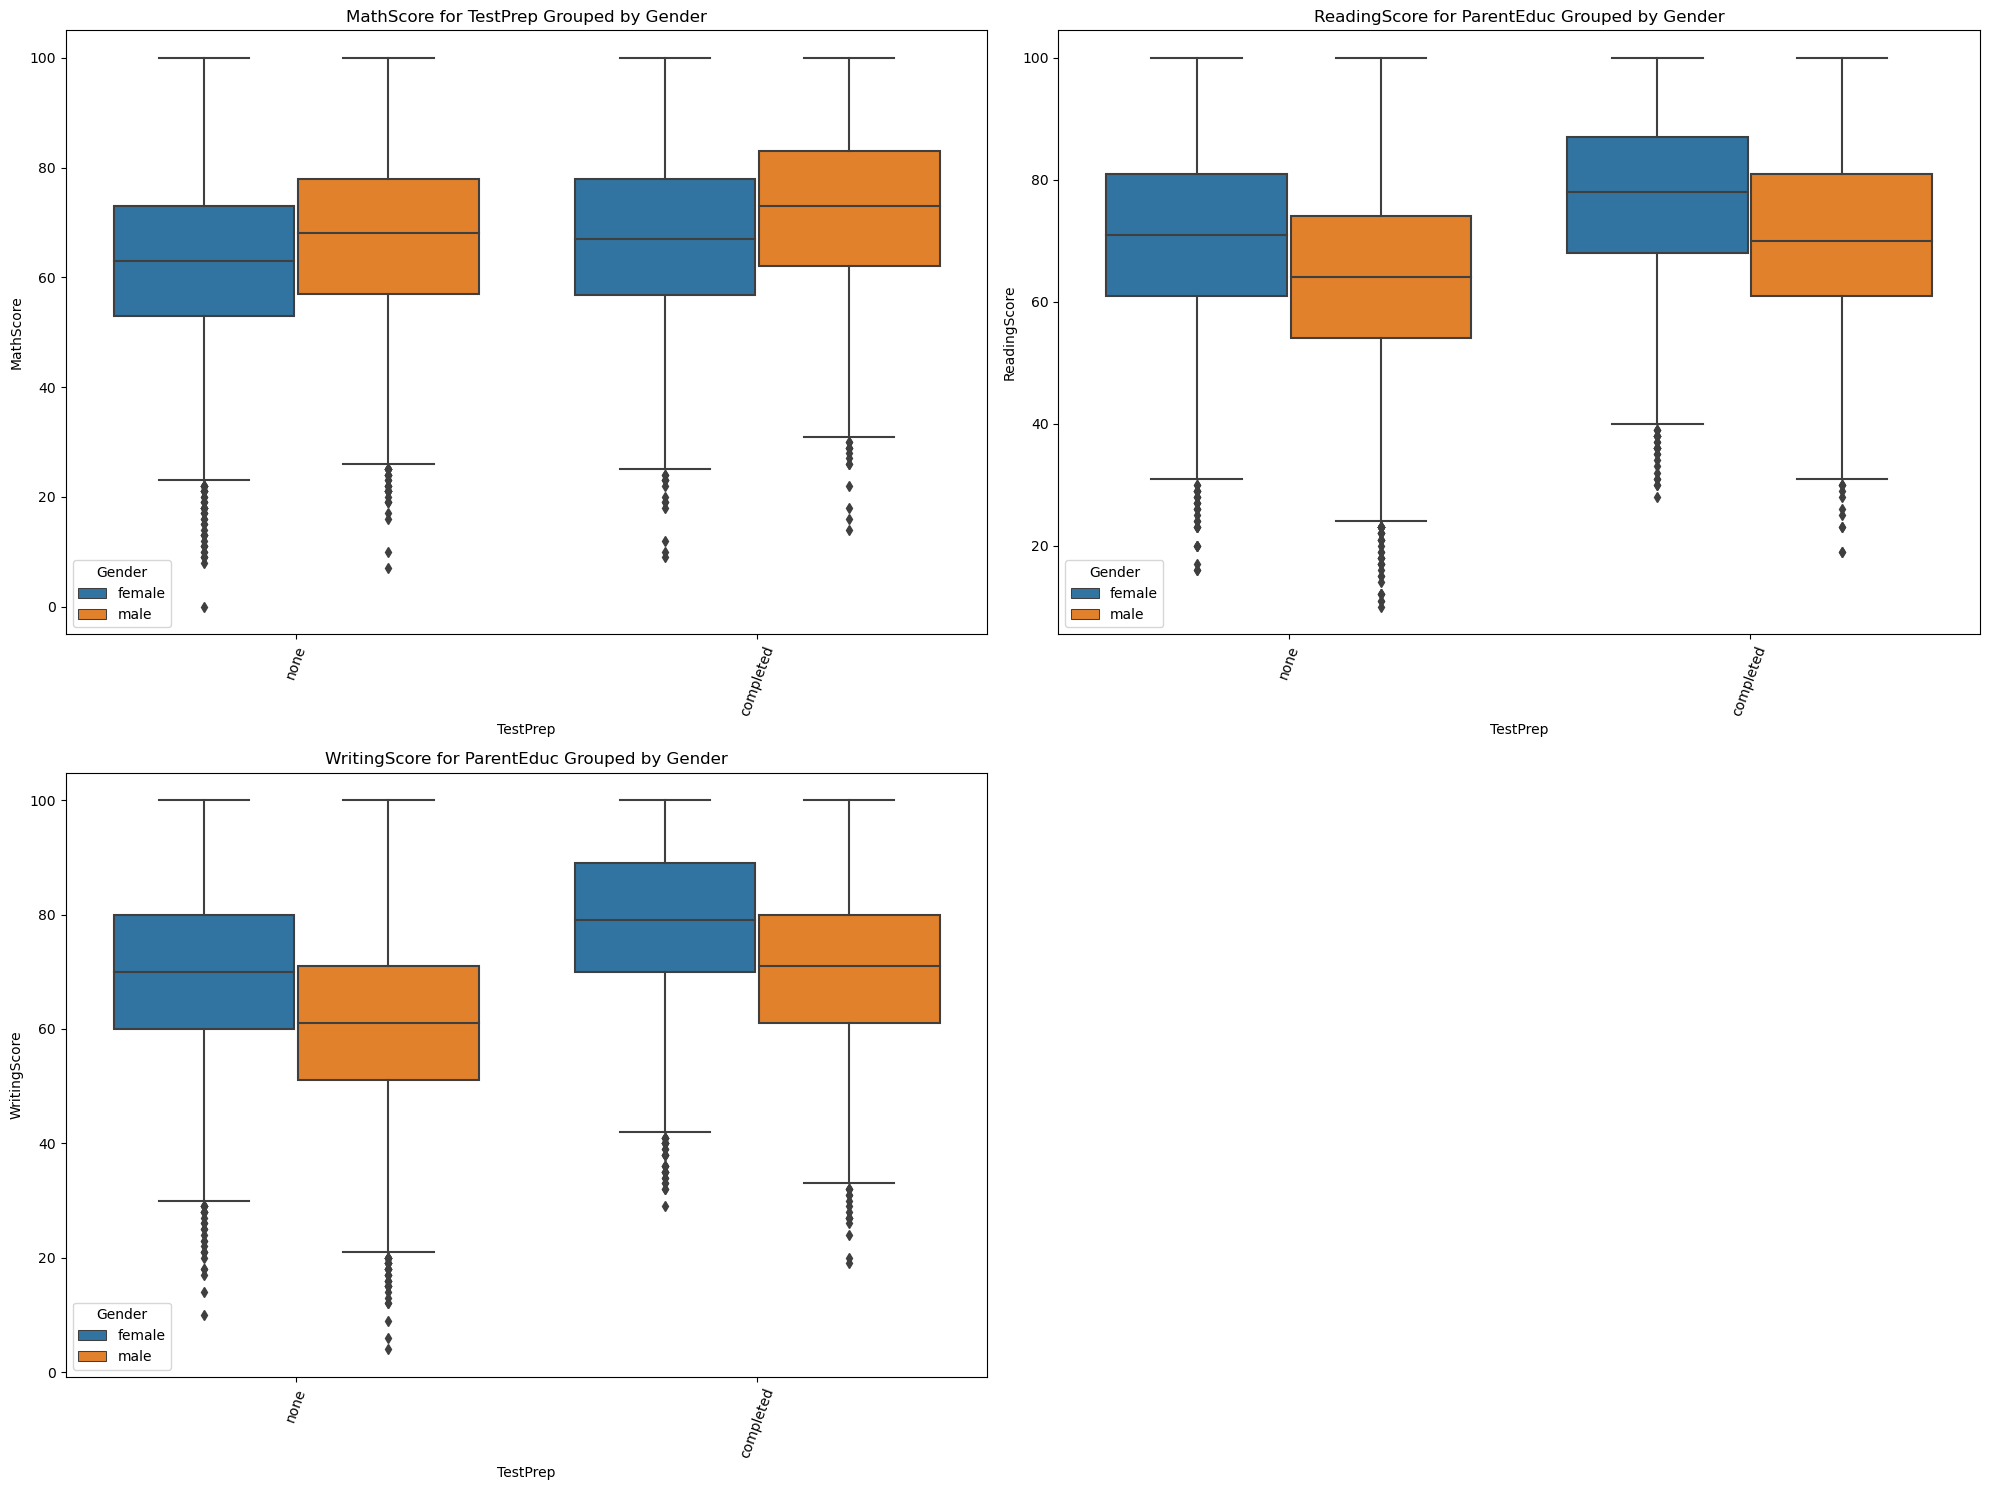

In [57]:
plot_imputed_2var("TestPrep", "Gender")

#### 4) ParentMaritalStatus | Score Visual

**Visual Interpretation**
 - There doesn't seem to much of a difference in the scores regardless of a student's parent's martial status. However, we should note(from the countplot)that there are far more married and very few widowed. 
<br><br>

**Why the Visual is Appropriate:**
- A box plot is an appropriate visual for comparing the test scores for groups who did/didn't participate in test prep. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.

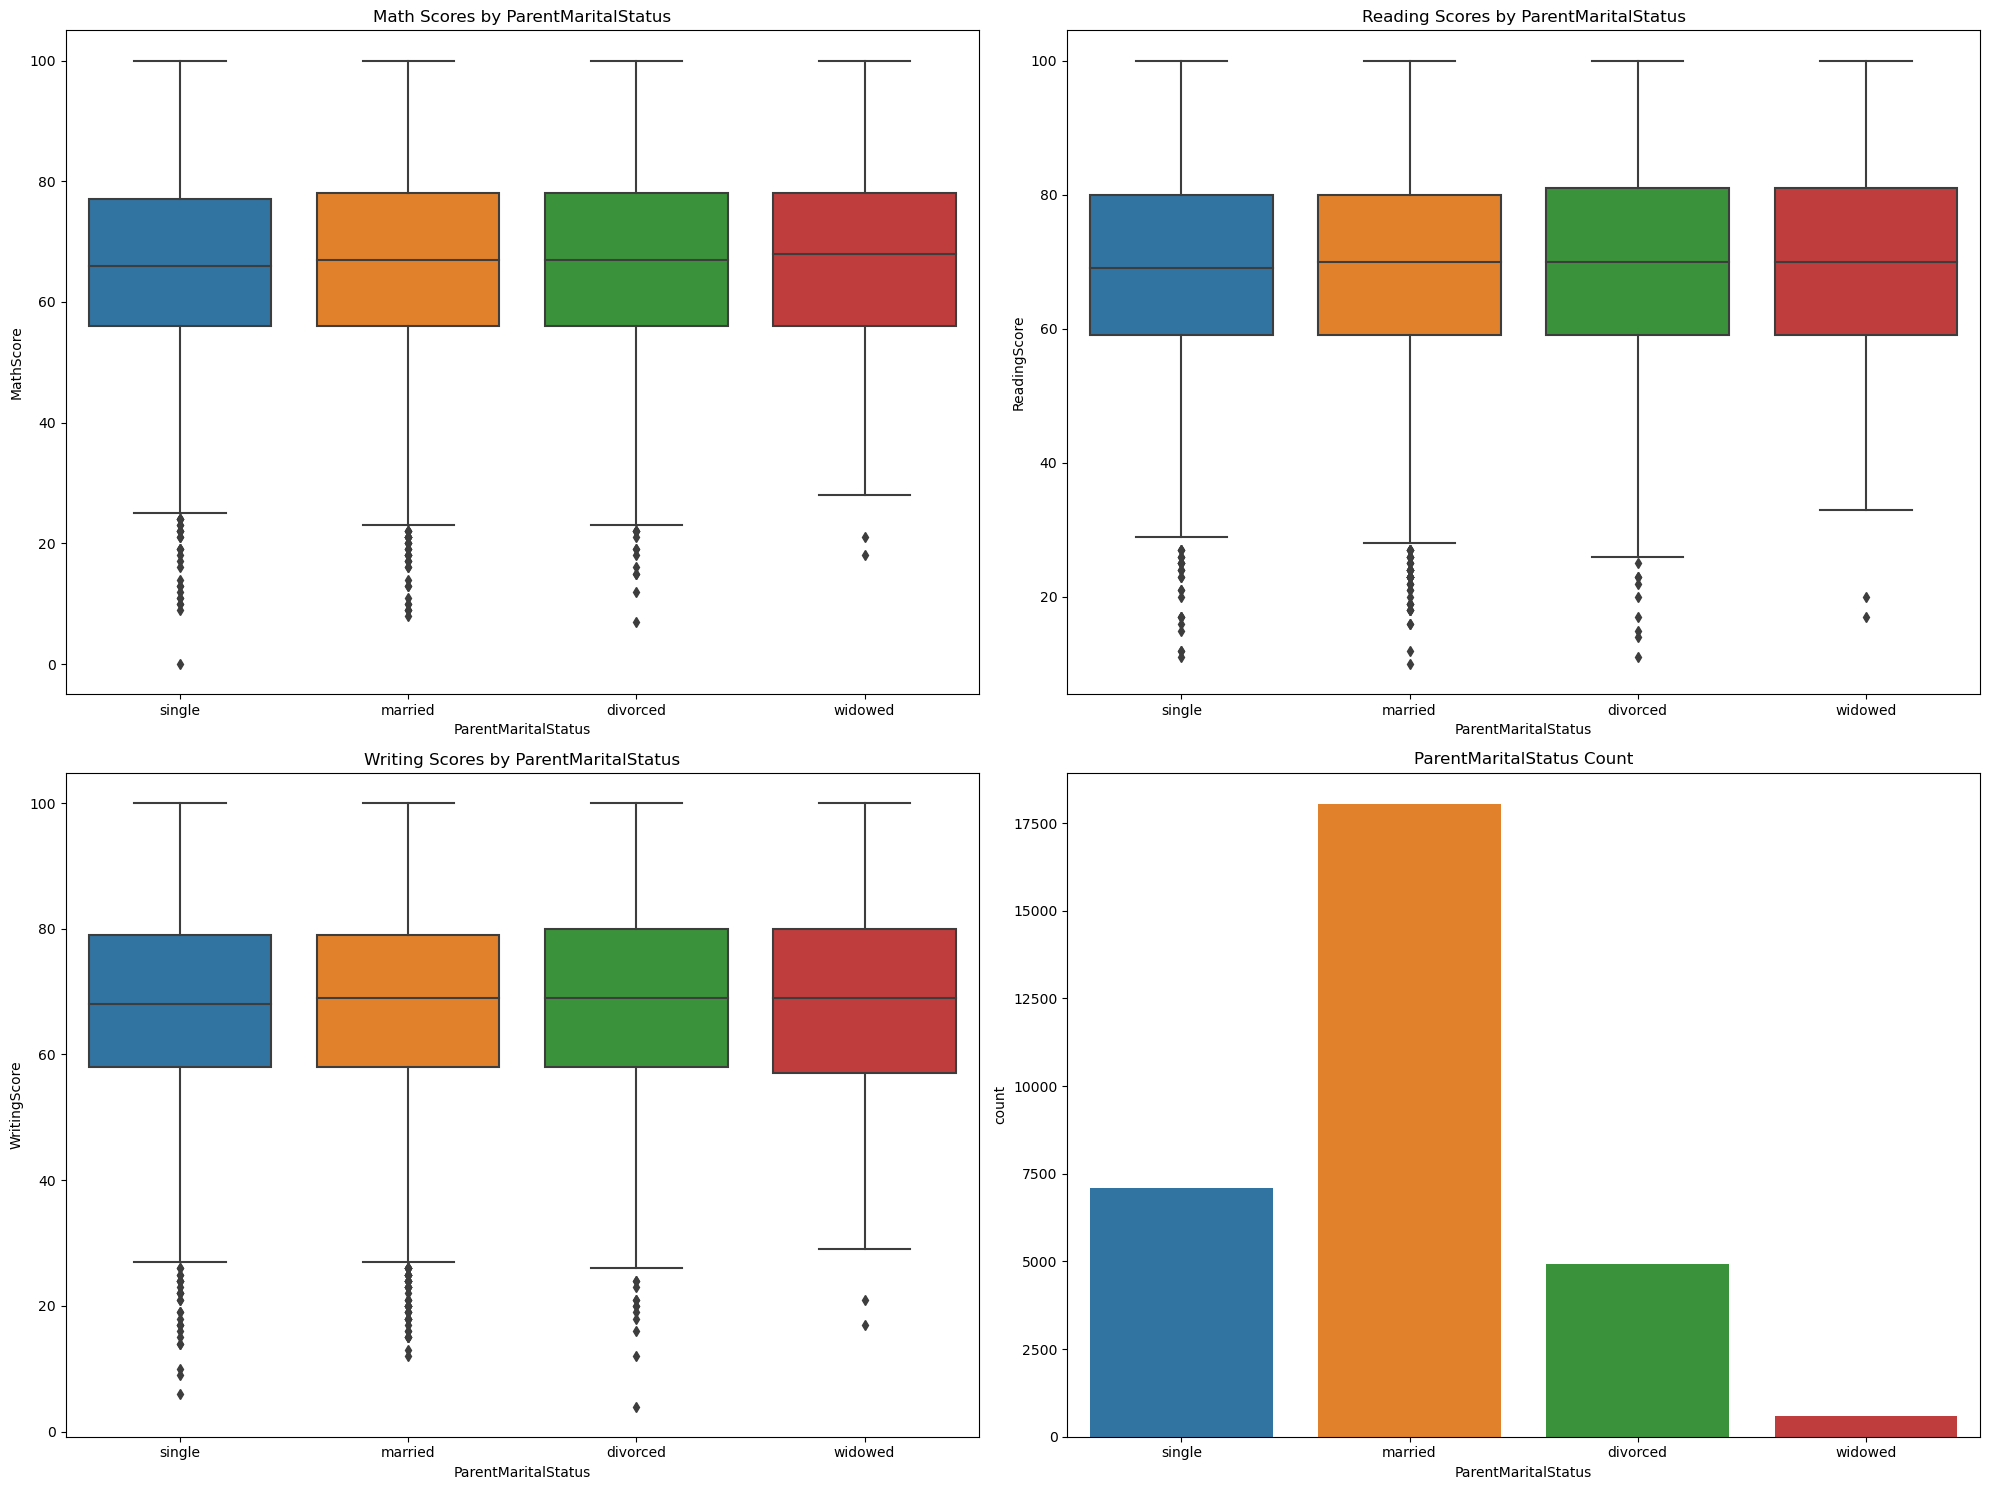

In [58]:
df3["ParentMaritalStatus"] = df3["ParentMaritalStatus"].astype('category')
df3["ParentMaritalStatus"] = df3["ParentMaritalStatus"].cat.reorder_categories(["single", "married", "divorced",
                                                                               "widowed"])

plot_imputed("ParentMaritalStatus")

#### 5) ParentMaritalStatus | LunchType | Score Visual

Once again, using ParentMaritalStatus LunchType and  above and adding a new one(LunchType), we want to create a multivariate plot to see how the scores behave.

This is interesting because we didn't see much of a difference in score across marital status by itself, but, when we add Lunch Type, we find that those with free/reduced lunches score significantly lower than their counterpart. Due to this finding we want to examine the LunchType variable later in this section.

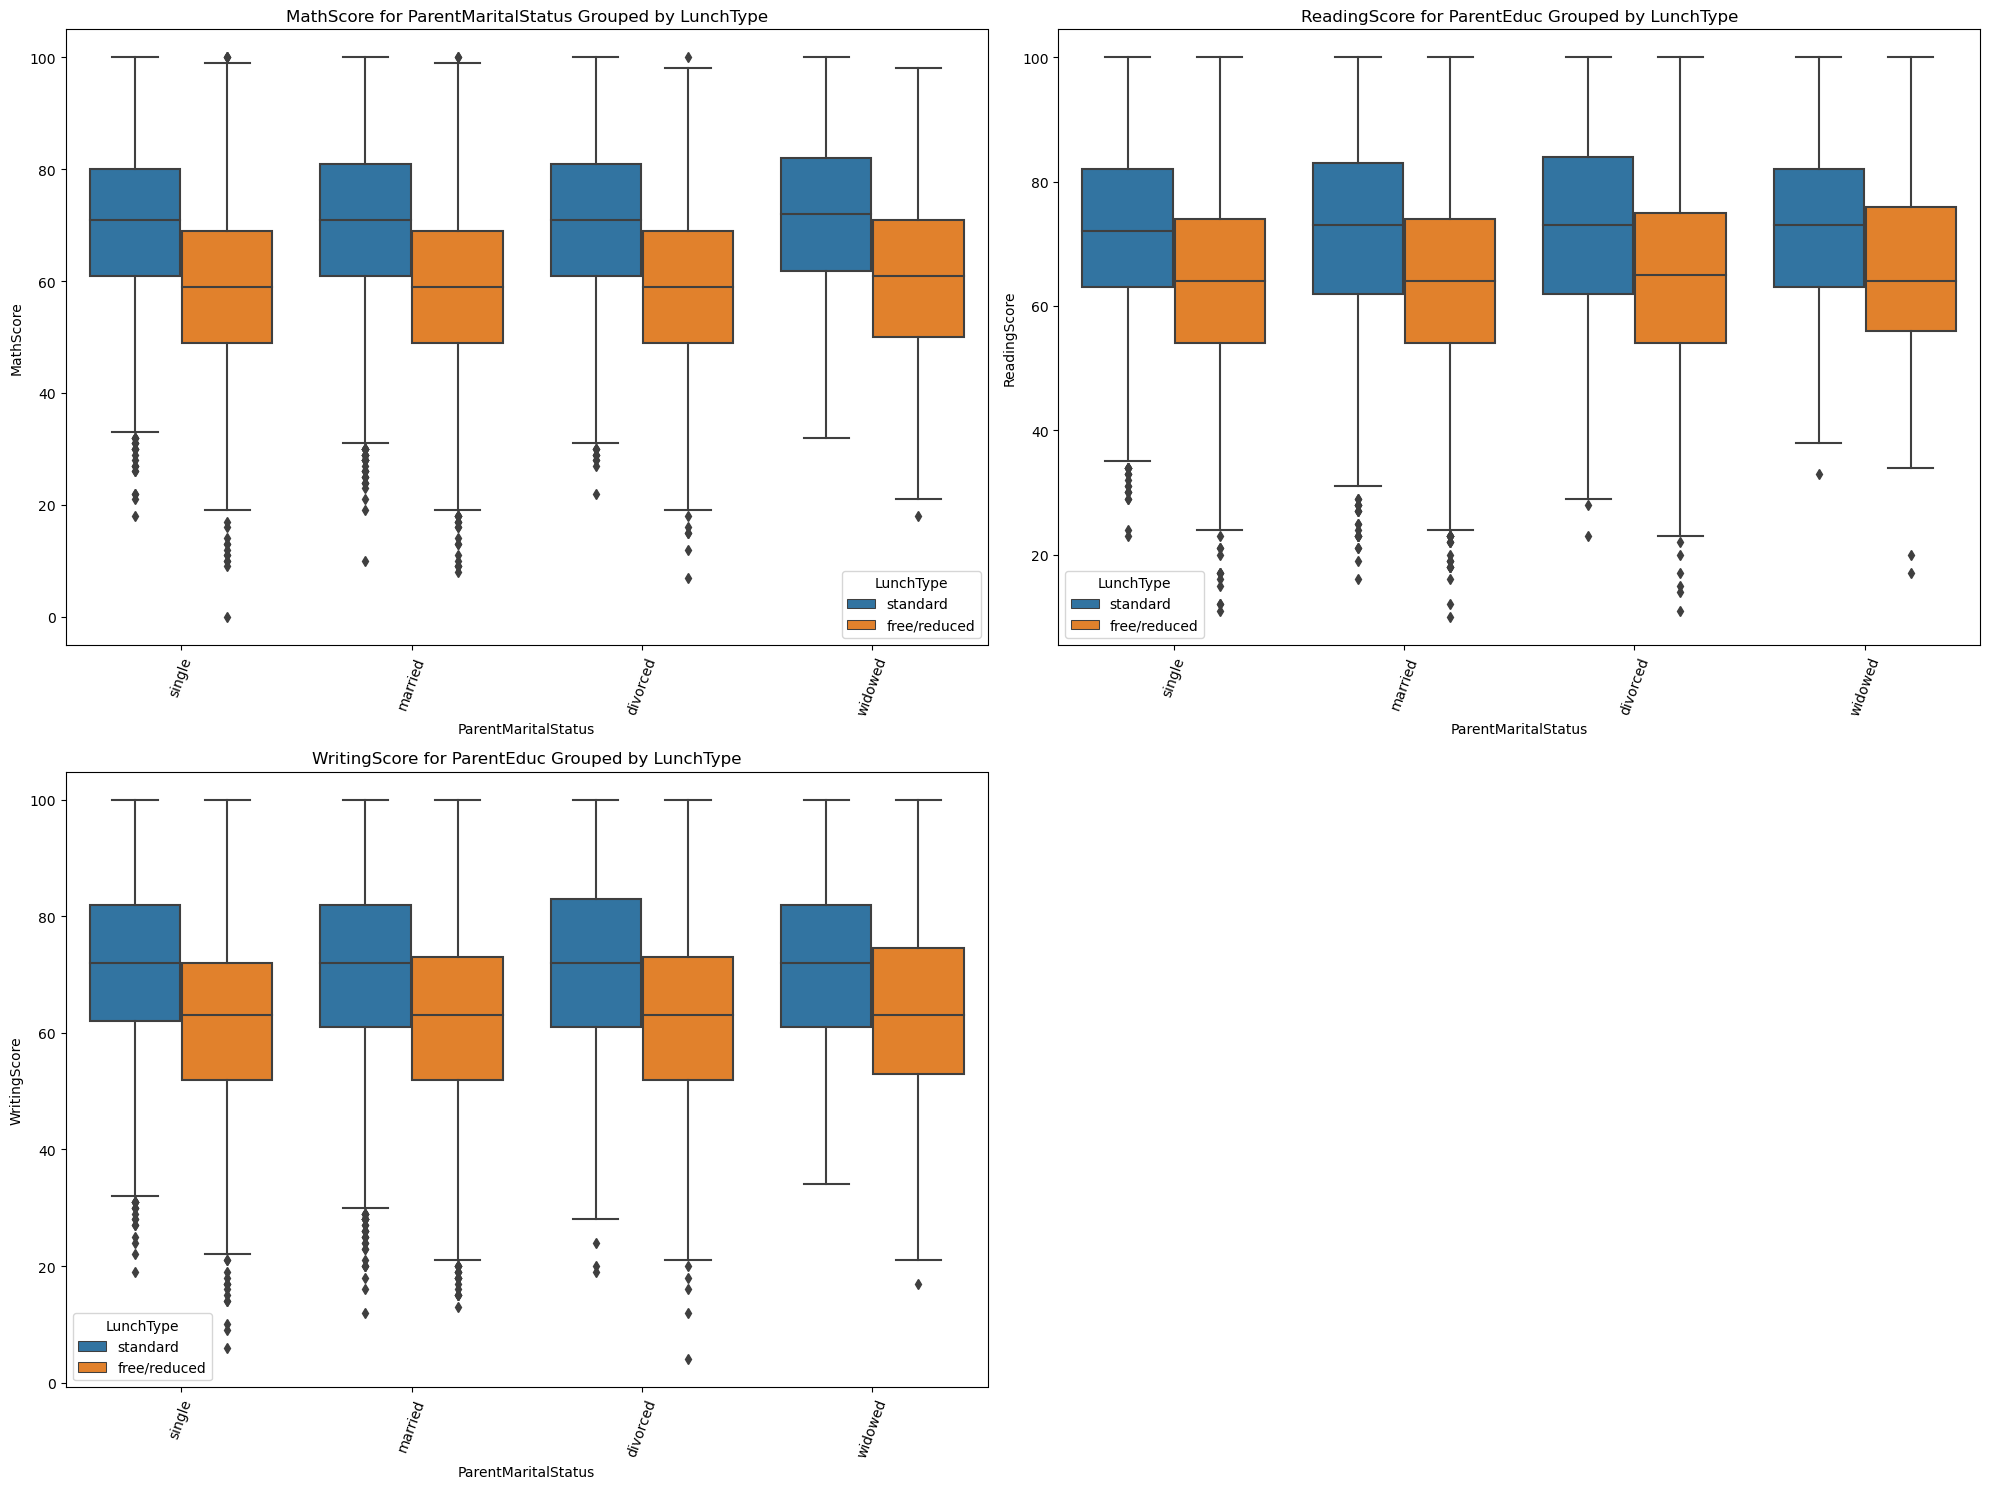

In [59]:
plot_imputed_2var("ParentMaritalStatus", "LunchType")

#### 6) Practice Sport | Score Visual

Looking at the boxplots, we find that those who pratice sports regularly achieve higher tests scores across the board and, the less they practice, the lower their test scores.One interesting aspect to note is the number of student who claims to never practice sports. It is less than half of those who practice regularly.  

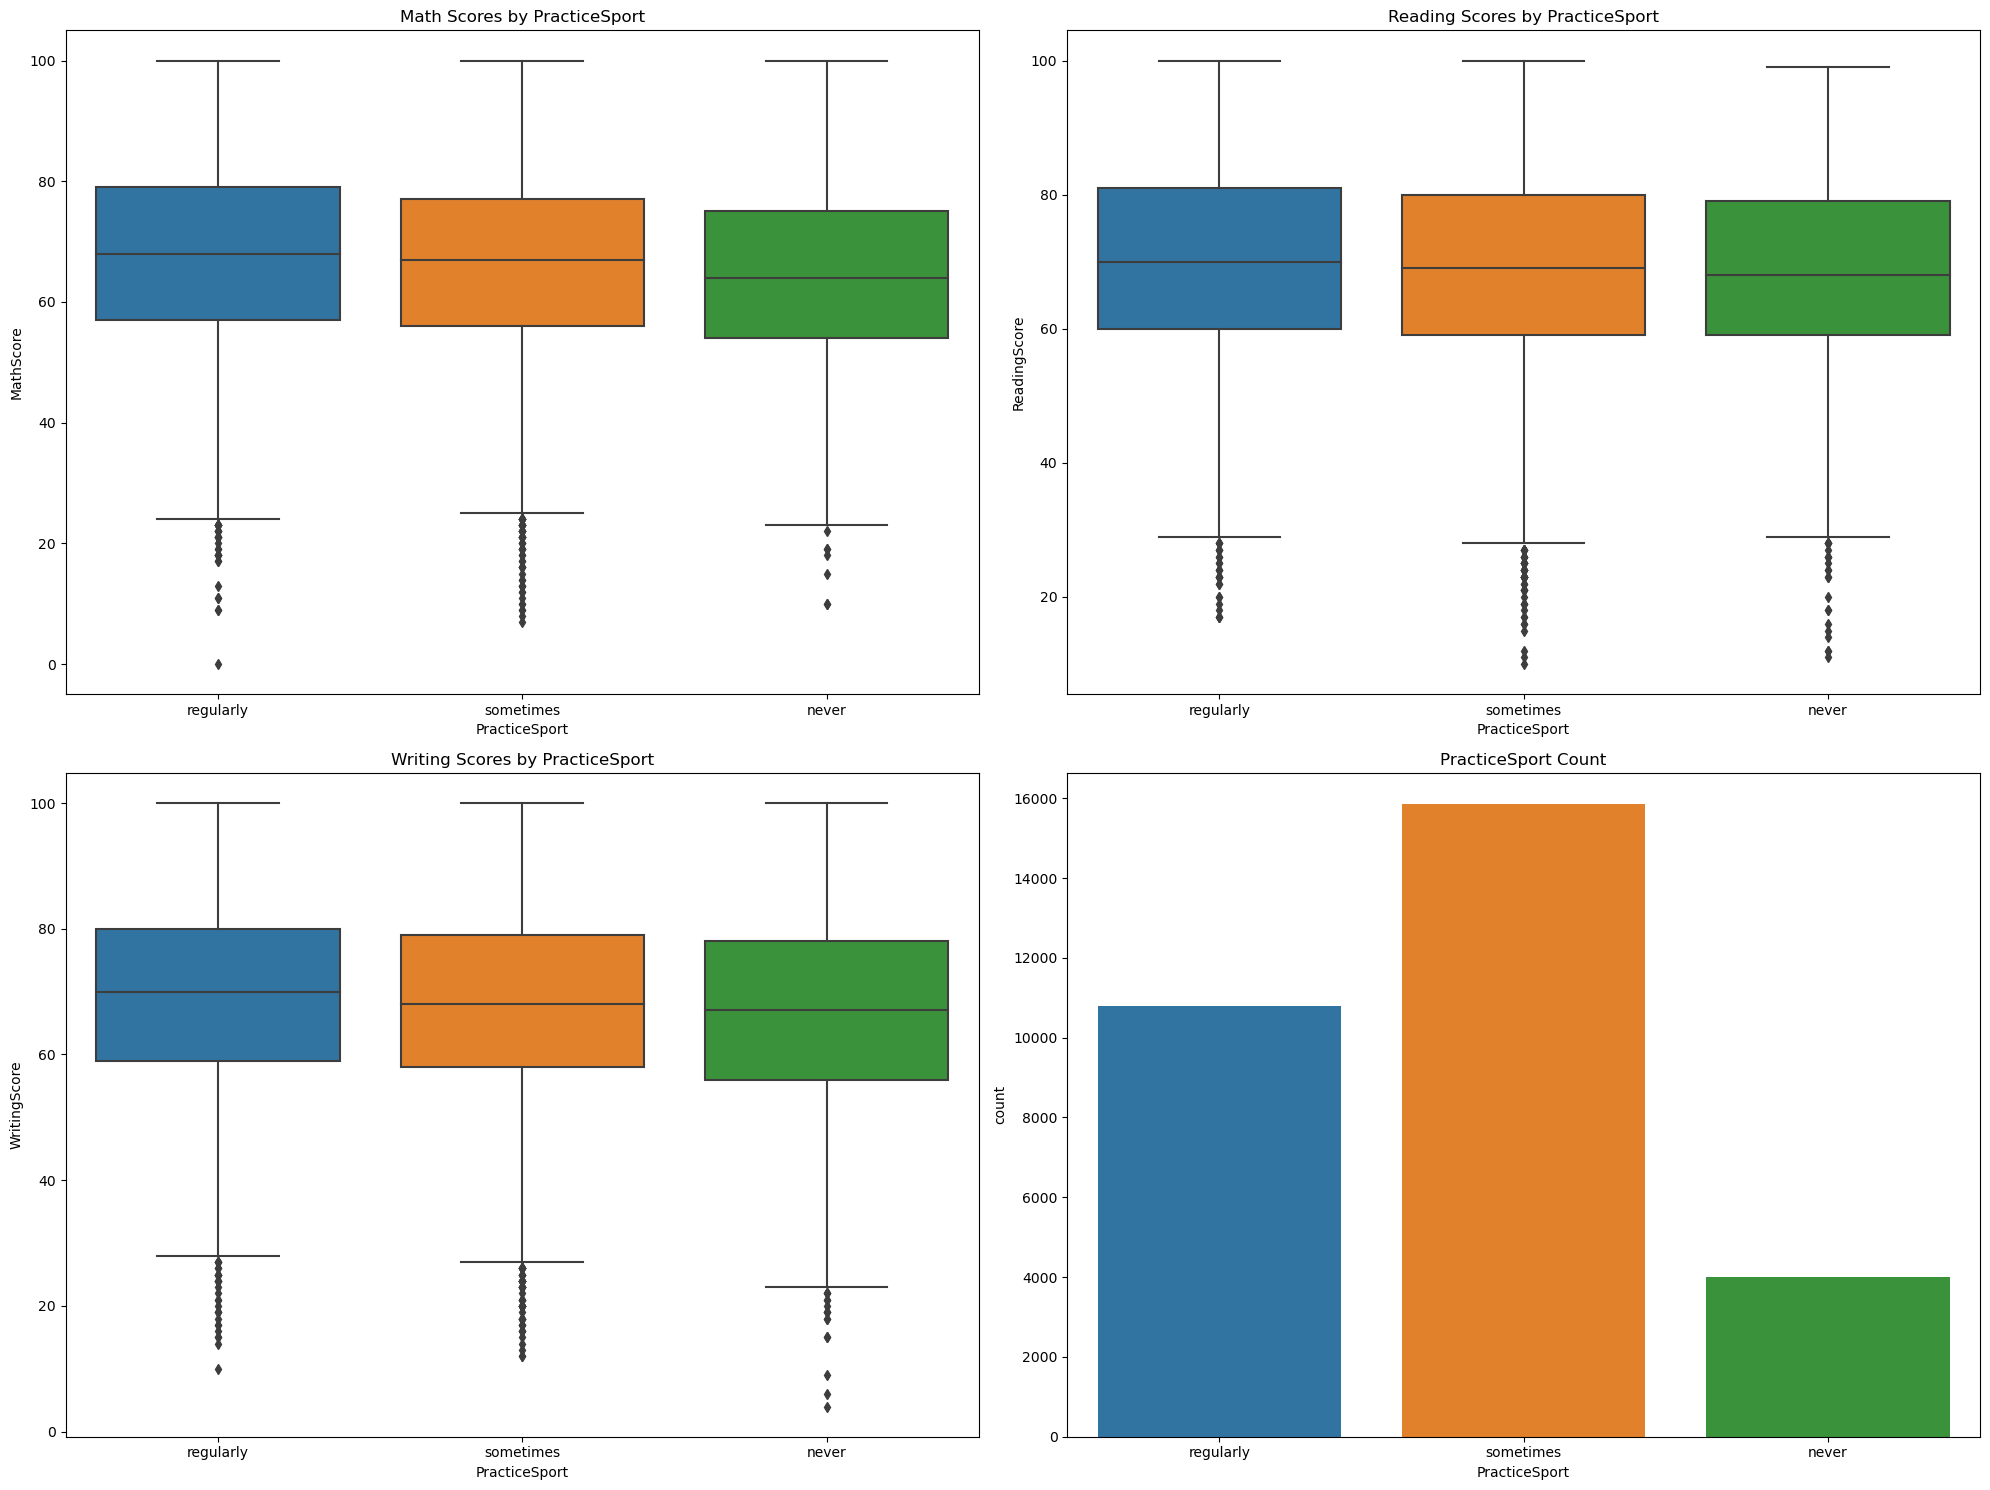

In [60]:
plot_imputed("PracticeSport")

#### 7) Practice Sport |WklyStudyHrs | Score Visual

Adding WklyStudyHours to our plot, we don't really discover anything new. Those who study more than 10 hours have a higher median score whether or not a person practices sports, but the difference is miniscule for Reading and Writing. However, the difference is more notable in math as the difference between each category for WklyStudyHours is more noticeable.

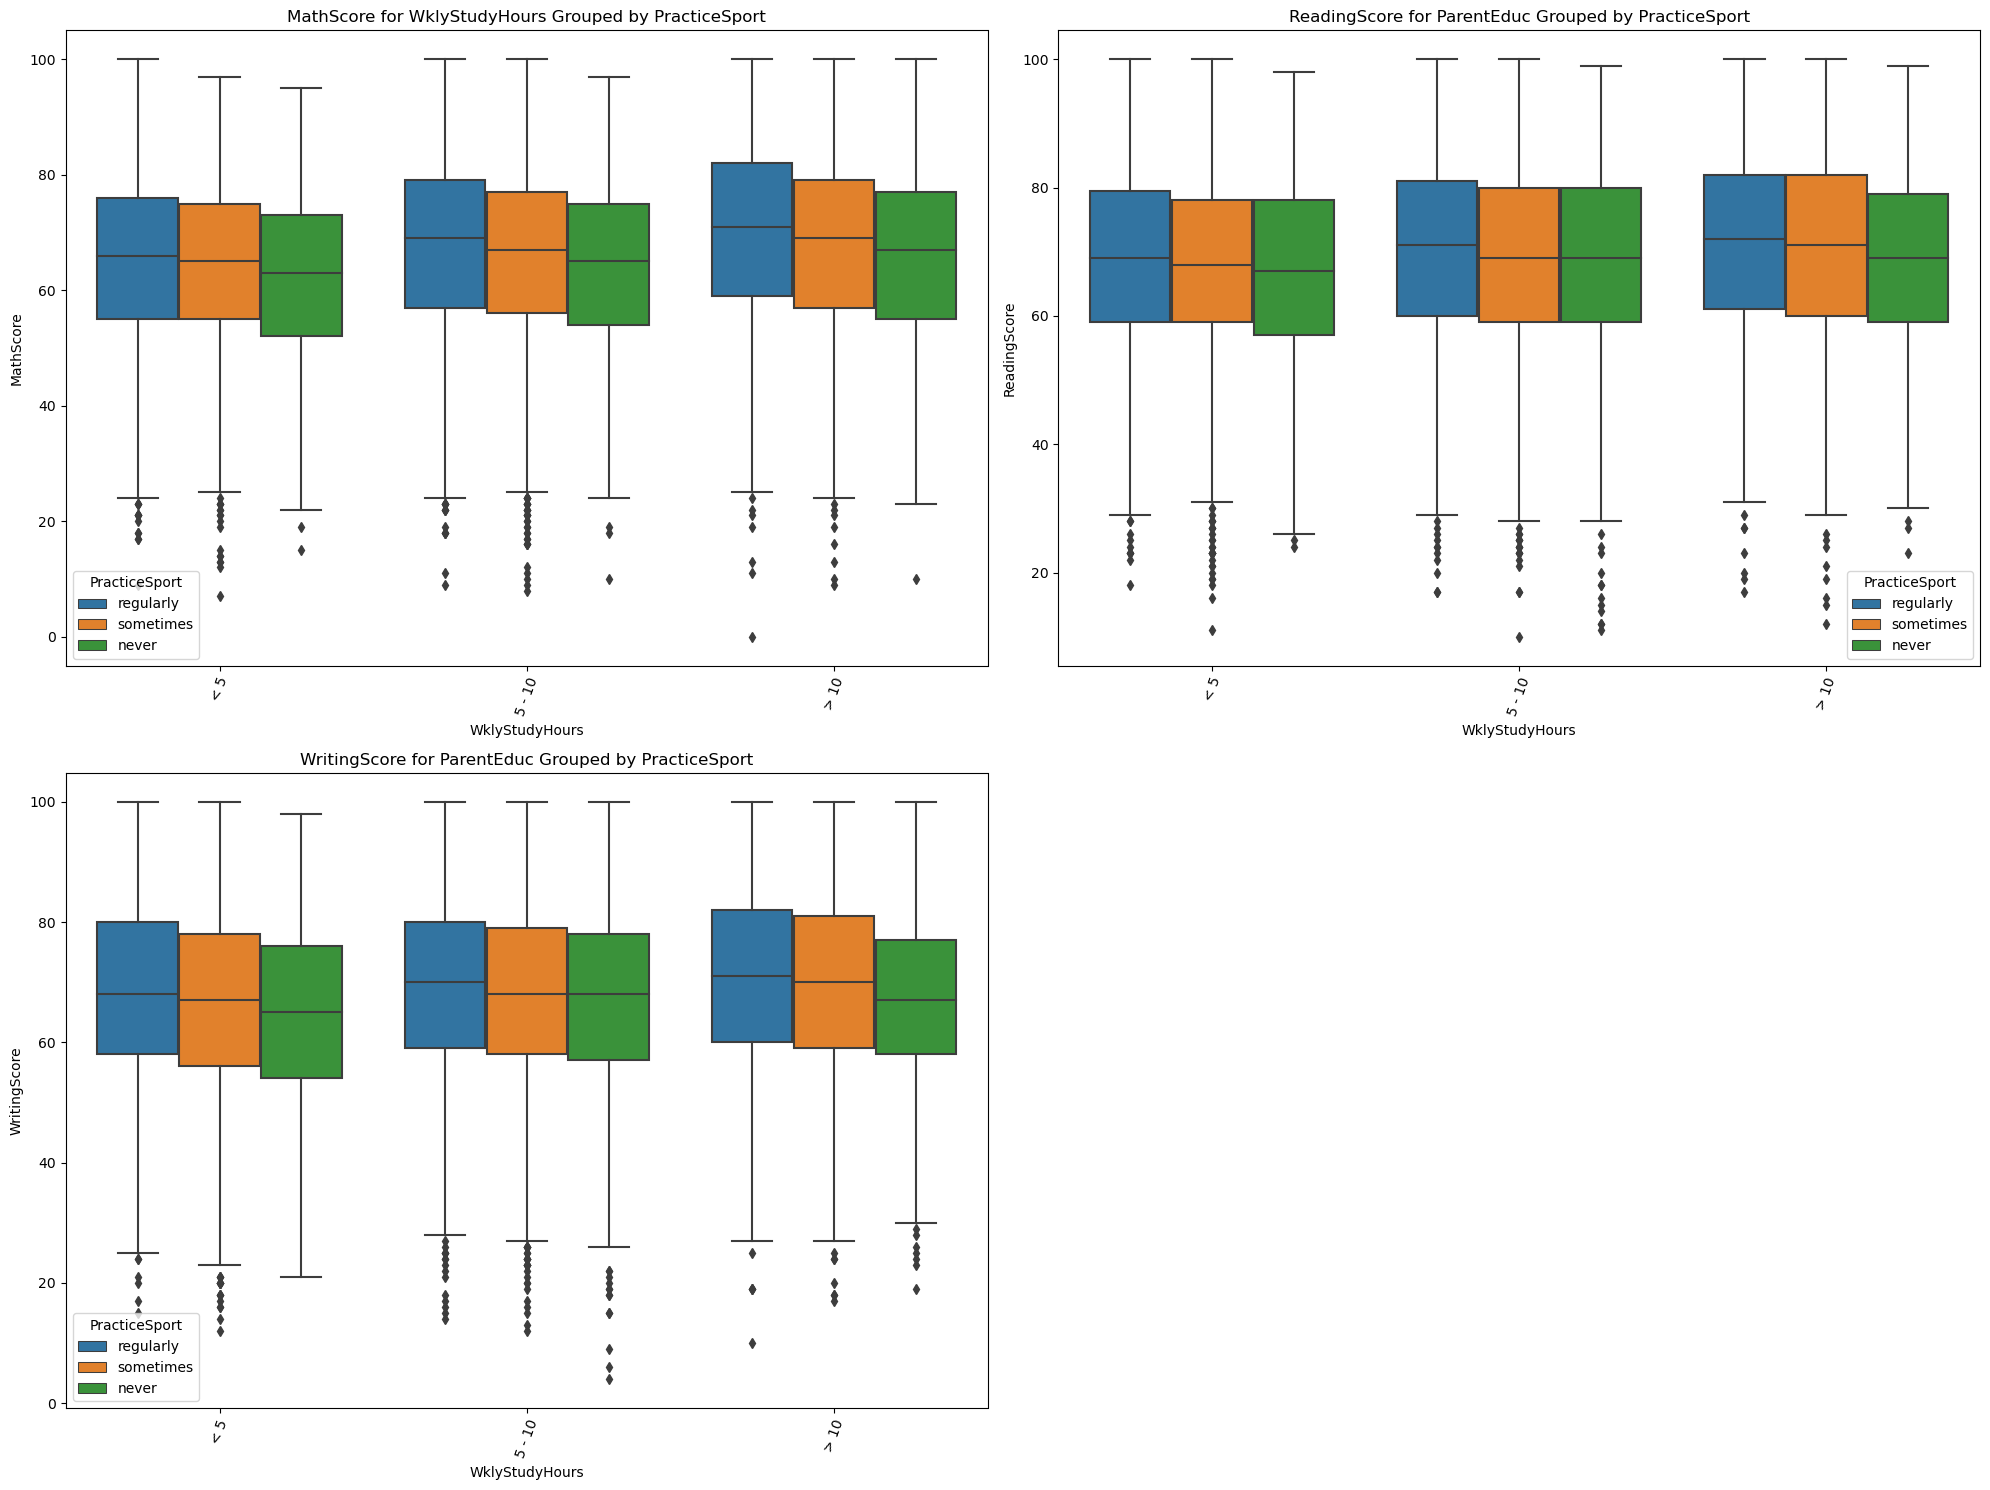

In [61]:
plot_imputed_2var("WklyStudyHours", "PracticeSport")

#### 8) WklyStudyHrs | Score Visual

The boxplots proved what we expected through intuition. The more an individual studies the higher the score they achieve. This is true across the board. However, we should note that the count for those who study 5-10 hours is much higher than the other two.

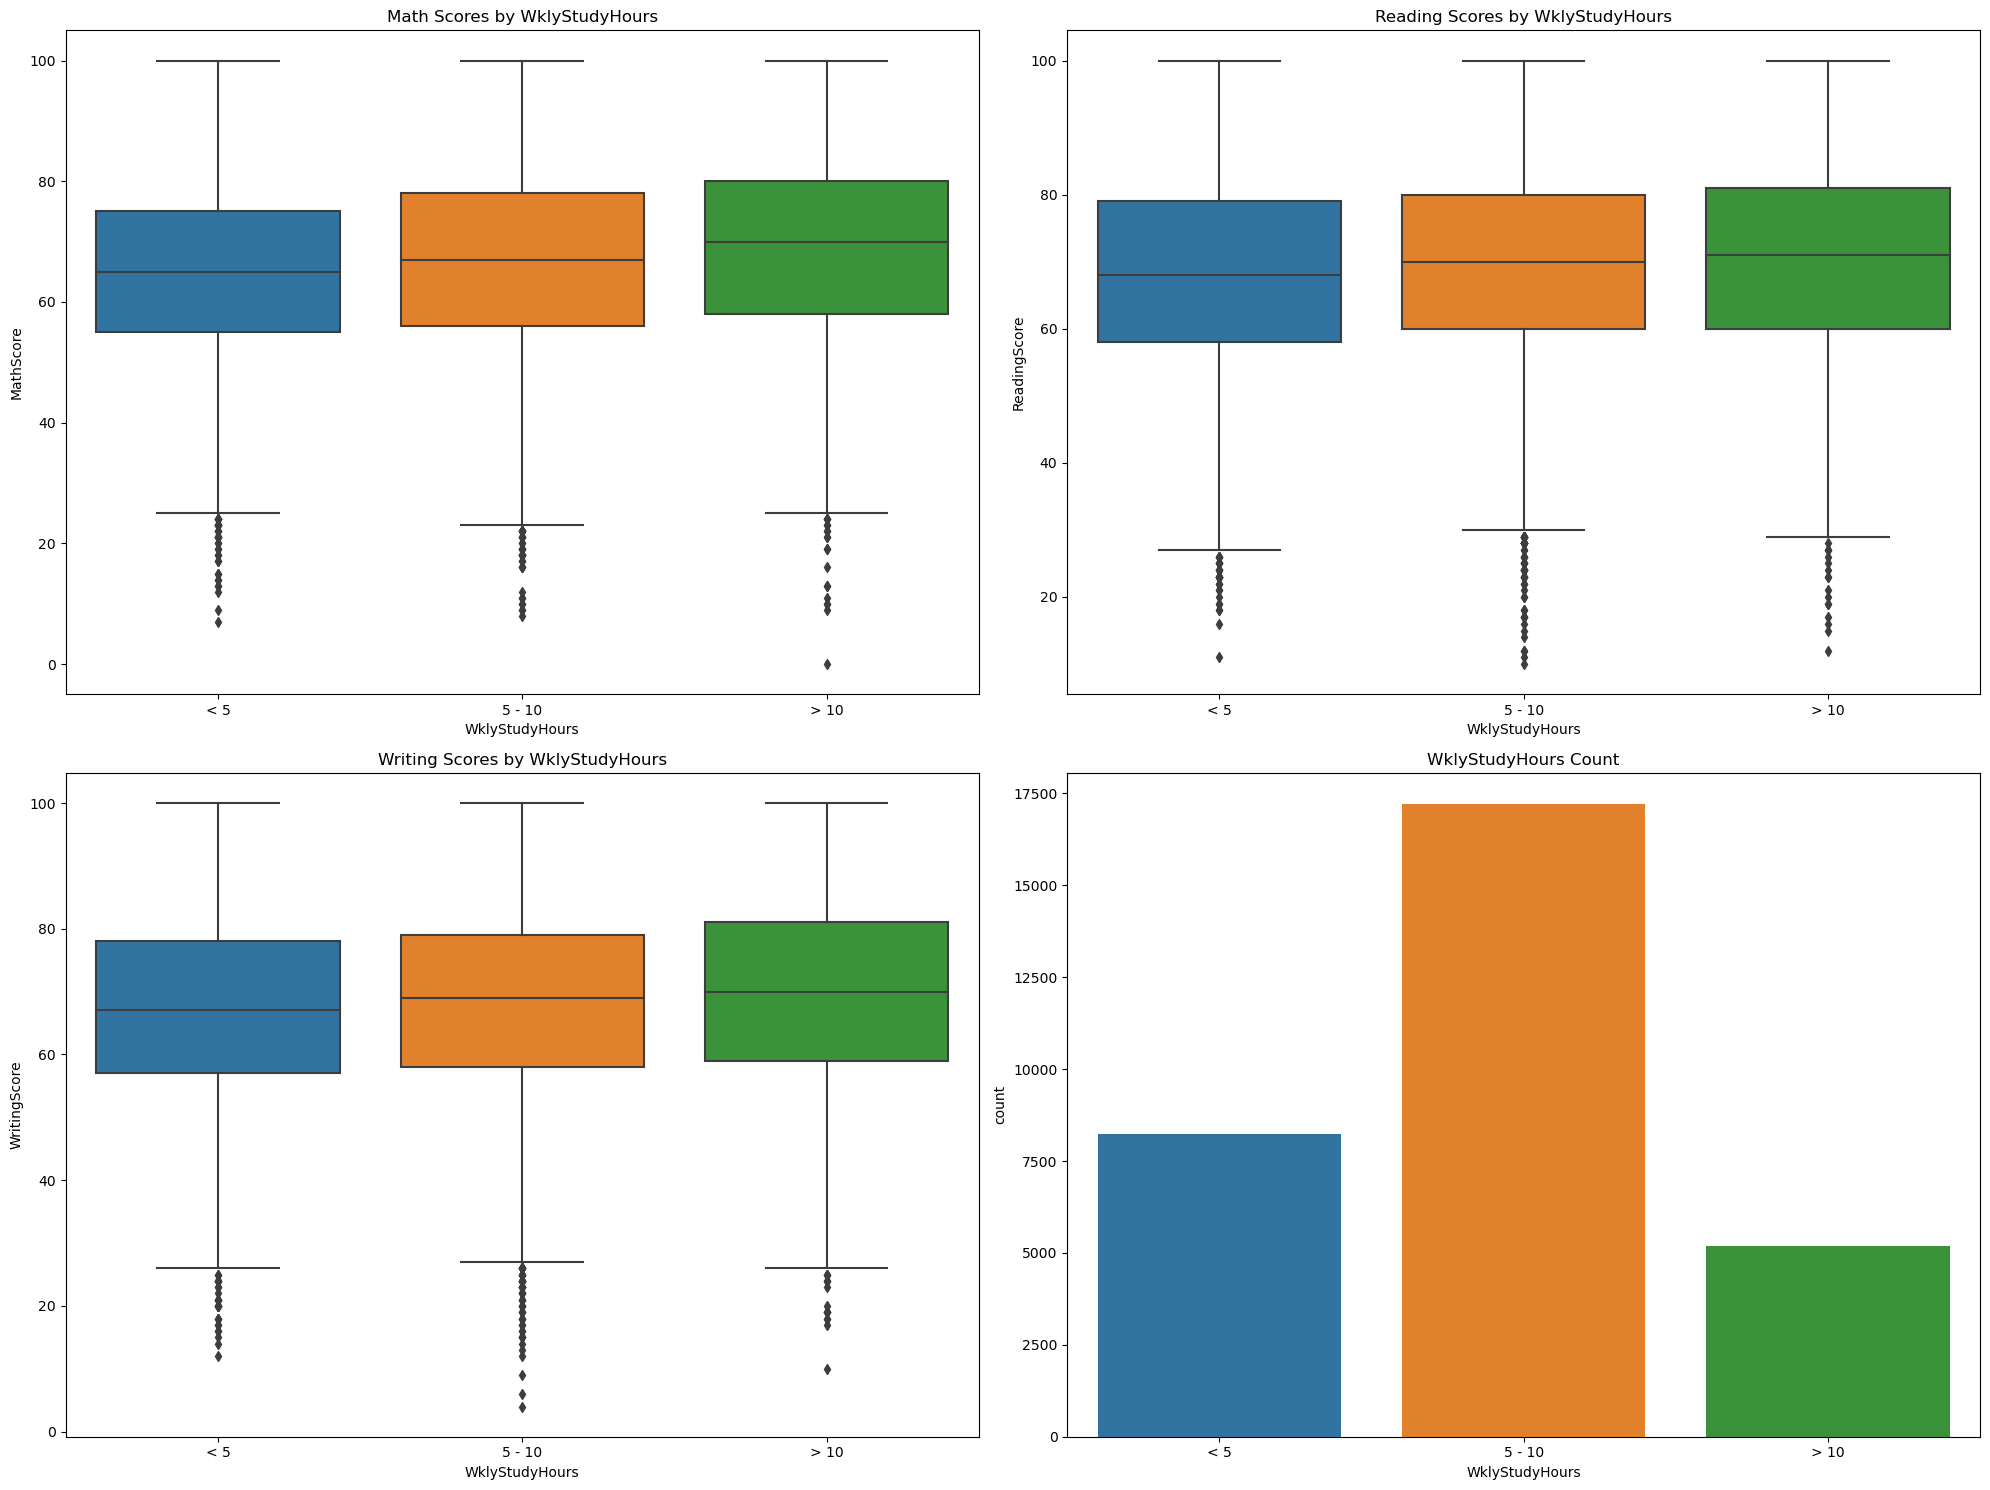

In [62]:
plot_imputed("WklyStudyHours")

#### 9) WklyStudyHrs | EthnicGroup | Score Visual

This time we would like to create a multivariable plot with our previous 2 variables and EthnicGroup. 

As expected, regardless of Ethnic Group, those who've logged more than 10 hours tend to have a higher score than those who've studied for less than 10. It's also interesting to note that Group E has the highest median score across all the plots when comparing each respective hour range of each group. One interesting aspect to note is that in Group A, those who've logged more than 10 hours have a notable difference than those who've logged 5-10 hours. This difference is greater than the difference of all the other groups(comparing 5-10 and >10).

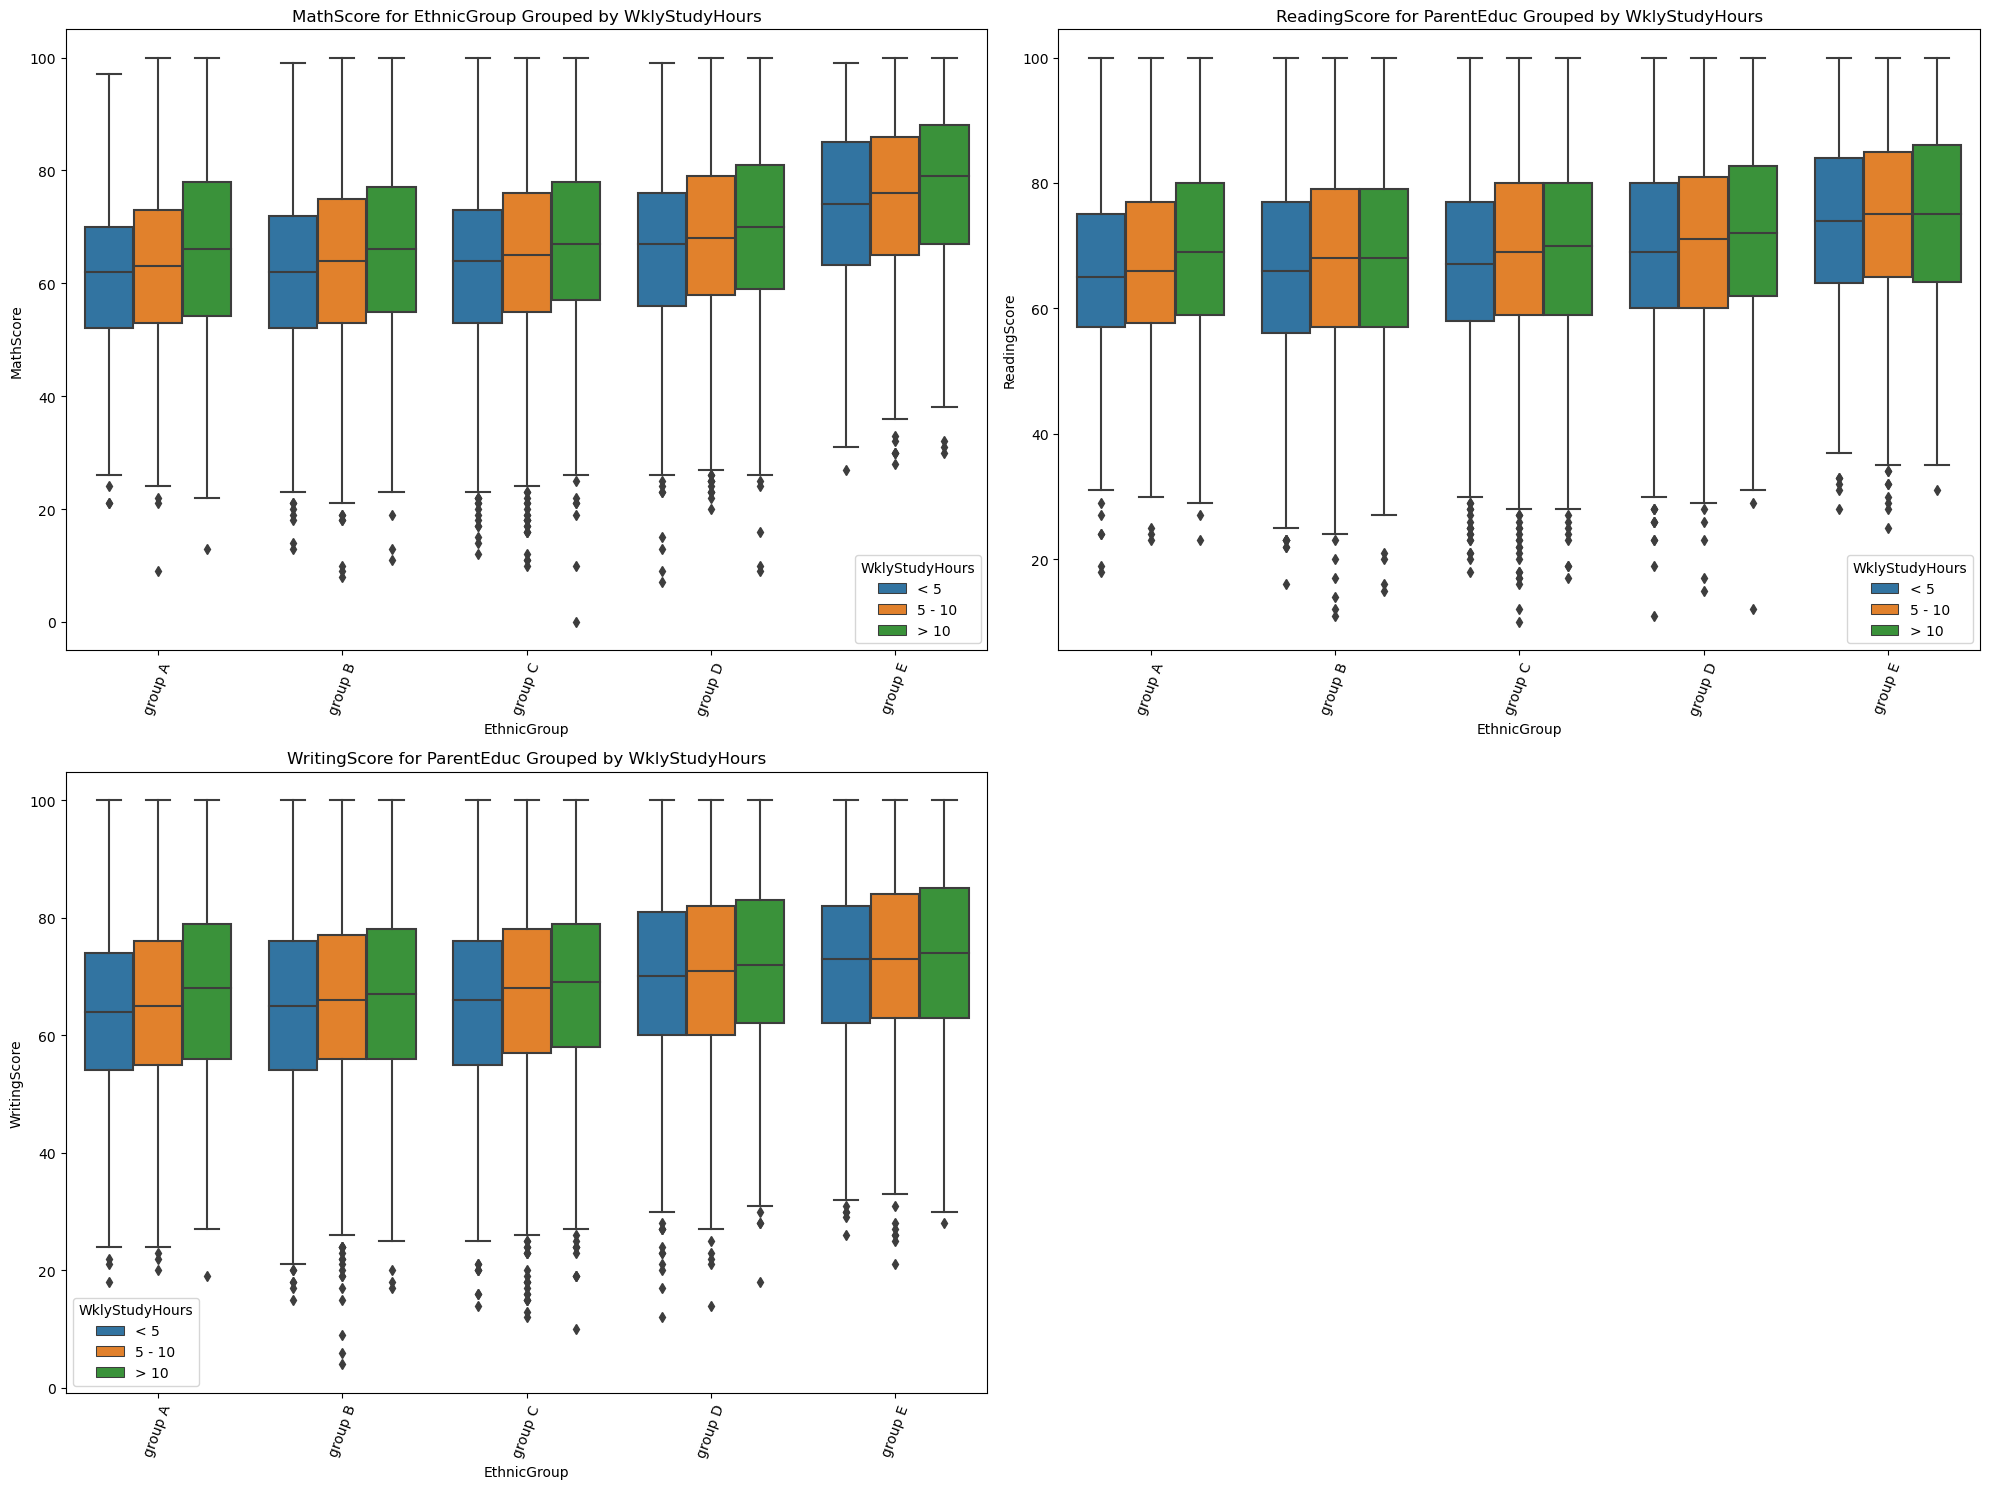

In [63]:
plot_imputed_2var("EthnicGroup", "WklyStudyHours")

<hr>

### Creating Additional Features [↑](#toc)
<a class="anchor" id="possible"></a>


**Features that could be added to the data:**
1) School (or geographic location/district)<br><br> 
2) Teacher (or class) <br><br> 
3) Extracurricular Activities (other than sport specifically)<br><br> 
4) Parent Household Income<br><br> 
5) Work with Tutor<br><br> 
6) Teacher offers tutoring<br><br> 
7) Age<br><br> 
8) Participant in "student government" <br><br> 
9) Parent participation in PTA<br><br> 
10) Class or school average GPA<br><br> 
11) Student GPA<br><br> 

**Features that can be created from existing features:**

1) Pass/Fail for Math/Reading/Writing can be created by creating levels of score data (>=70 : pass, <70 : Fail) <br><br>

### <b> Pass / Fail Variable Creation [↑](#toc) </b>
<a class="anchor" id="pass"></a>

**Pass | Fail Variable**
-  The new pass/fail variable adds a binary assessment dimension to the data, allowing for a simplified understanding and analysis of student performance. When it comes to making predictions, having a pass/fail variable instead of a continuous variable can impact the methods we are able to attempt such as: 

1) **Classification vs. Regression:** With a pass/fail variable, the prediction task typically shifts from regression (predicting a continuous variable) to classification (predicting a discrete class label). This change in problem formulation affects the choice of algorithms and evaluation metrics. Classification algorithms such as logistic regression, decision trees, random forests, or support vector machines may be more suitable for predicting pass/fail outcomes.
<br><br>
2) **Interpretability:** Predicting a pass/fail outcome can be more interpretable and actionable than predicting a continuous variable. This new attribute allows us to gain insights into the factors contributing to pass/fail predictions, identifying which attributes or features have the most significant influence. This interpretability can aid decision-making, intervention strategies, and understanding the factors driving student success.
<br><br>
3) **Model evaluation:** The evaluation of pass/fail predictions often requires different metrics than those used for continuous variables. Accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are common metrics used to assess the performance of classification models.

### Feature Creation Summary

The potential addition of various features to the data, including school, teacher, extracurricular activities, parent household income, and more, can provide valuable insights for analyzing student performance. Furthermore, creating a pass/fail variable based on score data introduces a binary assessment dimension that simplifies the understanding and analysis of student outcomes.

<br>By incorporating these additional features and creating the pass/fail variable, educators and researchers can gain valuable insights into student performance, make informed decisions, and develop targeted interventions to improve educational outcomes.

## Exceptional Additional Work [↑](#toc)
<a class="anchor" id="work"></a>


### Dimensionality Reduction
<a class="anchor" id="reduction"></a>


Dimensionality reduction is the process of reducing the number of variables or features in a dataset. This is often done to simplify the data and make it easier to analyze or visualize. The two main types of dimensionality reduction are feature selection and feature extraction. Feature selection involves selecting a subset of the original variables, while feature extraction involves transforming the variables into a new set of variables. Principal Component Analysis (PCA) is a common technique used for feature extraction.<br>
<br>PCA was attempted but as expected it was not very useful/beneficial. PCA is more appropriate when dealing with many numerical features. While one-hot encoding variables is an option to manipulate data into a "numerical" form, this will not result in making PCA a more appropriate choice.<br>

MCA seems to be a more appropriate process to implement and would serve as a more effective alternative. Before proceeding it must be stated compared to PCA, MCA loses the power of the interpretation that we would have had with PCA created variables.


### <b> MCA (Multiple Correspondence Analysis) [↑](#toc) </b>
<a class="anchor" id="mca"></a>


In [64]:
import prince
import altair as alt

In [65]:
# allows us to work with the altair functionality and bypass the row limitation
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [66]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)


In [67]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [68]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"


In [69]:
df["MathResult"] = df["MathScore"].apply(pass_fail)
df["ReadingResult"] = df["ReadingScore"].apply(pass_fail)
df["WritingResult"] = df["WritingScore"].apply(pass_fail)

In [70]:
selected_columns = ["MathResult","ReadingResult","WritingResult","EthnicGroup",
                    "ParentEduc", "LunchType", "TestPrep", "PracticeSport",
                    "ParentMaritalStatus","TransportMeans","WklyStudyHours",
                    "IsFirstChild", "Gender"]

df[selected_columns] = df[selected_columns].astype('category')

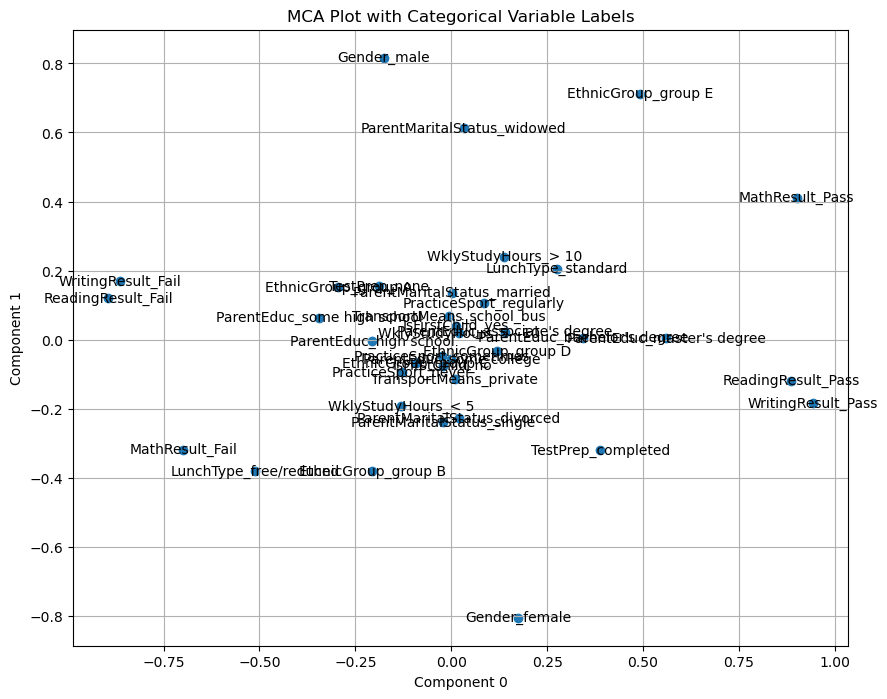

In [71]:
# set seed
np.random.seed(12)

df_dummy = pd.get_dummies(df[selected_columns])

# Perform (MCA) on the dummy dataframe
mca = prince.MCA(n_components=2, random_state=12)
mca = mca.fit(df_dummy)

# Get the column coordinates from MCA
mca_coordinates = mca.column_coordinates(df_dummy)

# Plot the MCA results with labels for categorical variables
plt.figure(figsize=(10, 8))
plt.scatter(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1])

# Add labels for categorical variables
for i, (x, y) in enumerate(zip(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1])):
    plt.text(x, y, mca_coordinates.index[i], ha='center', va='center')

plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('MCA Plot with Categorical Variable Labels')
plt.grid(True)
plt.show()


In [73]:
#!conda install adjustText
from adjustText import adjust_text

np.random.seed(12)

df_dummy = pd.get_dummies(df[selected_columns])

# Perform Multiple Correspondence Analysis (MCA) on the dummy dataframe
mca = prince.MCA(n_components=2, random_state=12)
mca = mca.fit(df_dummy)

# Get the column coordinates from MCA
mca_coordinates = mca.column_coordinates(df_dummy)

# Plot the MCA results with labels for categorical variables
plt.figure(figsize=(10, 8))
plt.scatter(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1], color='blue')

# Define base line length
line_length = 0.1  # adjust as needed

# Calculate the median for x and y
median_x = mca_coordinates.iloc[:, 0].median()
median_y = mca_coordinates.iloc[:, 1].median()

# Variables to hold line ends and text objects for adjustment
line_ends_x = []
line_ends_y = []
texts = []

# Add labels for categorical variables with lines for clarity
for i, (x, y) in enumerate(zip(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1])):
    label = mca_coordinates.index[i]

    # Adjust line length based on density of points
    density = len([point for point in zip(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1]) 
                   if np.sqrt((x - point[0]) ** 2 + (y - point[1]) ** 2) < line_length])
    adjusted_line_length = line_length * density

    if x <= median_x and y >= median_y:      # Quadrant II
        line_end = (x-adjusted_line_length, y-adjusted_line_length)
        plt.plot([x, line_end[0]], [y, line_end[1]], color='red')
    elif x > median_x and y >= median_y:     # Quadrant I
        line_end = (x+adjusted_line_length, y-adjusted_line_length)
        plt.plot([x, line_end[0]], [y, line_end[1]], color='red')
    elif x <= median_x and y < median_y:     # Quadrant III
        line_end = (x-adjusted_line_length, y+adjusted_line_length)
        plt.plot([x, line_end[0]], [y, line_end[1]], color='red')
    else:                                    # Quadrant IV
        line_end = (x+adjusted_line_length, y+adjusted_line_length)
        plt.plot([x, line_end[0]], [y, line_end[1]], color='red')

    line_ends_x.append(line_end[0])
    line_ends_y.append(line_end[1])
    texts.append(plt.text(line_end[0], line_end[1], label, ha='center', va='center'))

# Adjust labels to avoid overlap
adjust_text(texts, x=line_ends_x, y=line_ends_y)

plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('MCA Plot with Categorical Variable Labels')
plt.grid(True)
plt.show()


Solving environment: done

# All requested packages already installed.



ModuleNotFoundError: No module named 'adjustText'

### MCA Interpretation

Multiple Correspondence Analysis (MCA) is a statistical visualization technique used for categorical variables.
MCA plots components and highlights possible  relationships and patterns in the data. Each point on the plot represents a level of a categorical variable, and the distance between these points represents the relationships between them.
<br><br>Some key insights we can obtain from an MCA plot are:
- **Proximity of Points:** Points (or labels representing levels of categorical variables) close to each other on the plot share similar profiles, which means they have a similar distribution across the categorical variables in the dataset.

- **Proximity to Origin:** Points located near the origin do not contribute much to the overall variability in the dataset. In contrast, points located far from the origin are particularly characteristic of the respective dimension they're located on.

- **Dimensions:** The axes (dimensions) represent the underlying structure of the data. The first dimension (axis) explains the most variance in the dataset, the second dimension explains the second most variance, and so on.

- **Explained Variance:** The total variance explained by the plot can be obtained. This gives us an idea of how much of the total variability of the dataset is represented in the plot.

From our plot we can use this to explore and interpret relationships between variables. An example of this would be examining where our response variables lie on the plot (such as MathResult_Pass or MathResult_Fail) and then using proximity to determine which other variables share similar profiles. 

# <b> Conclusion | Summary of Findings [↑](#toc) </b>
<a class="anchor" id="Conclusion"></a>


**Business Understanding:**

The dataset consists of scores from three tests along with personal and socio-economic factors, collected with the goal of identifying relationships between these factors and test scores. The objective is to determine the most significant factors influencing test scores, which can help educators, parents, and students focus on variables that can improve academic performance. The information gathered can inform educational policies, practices, and interventions to support struggling students and enhance overall educational outcomes. Understanding and analyzing the dataset can lead to insights regarding student performance factors, teaching practices, and the impact of socio-economic status on academic outcomes. Evaluating the effectiveness of prediction algorithms involves assessing their accuracy in predicting test scores and their interpretability in identifying influential factors. Both accuracy and interpretability are important in evaluating the effectiveness of a prediction algorithm.

**Data Understanding:**

- **Missing data:** <br>After thorough consideration and investigation of the missing data in our dataset, we have decided to proceed with imputing the missing values based on frequency. The dataset initially exhibited a substantial number of missing values, amounting to 37.2% of the data, particularly in categorical variables. While the reasons for missingness remain unclear due to limited information on data collection, we have assumed that the missing data is Missing Completely at Random (MCAR). 

    <br> To handle this missing data, we explored various options such as discarding observations with missing values, which would result in a significant loss of information, or relying on learning algorithms to handle missing values during training. However, we ultimately chose to impute the missing values based on frequency.

    <br> By imputing the missing values using the frequency-based approach, we can retain the entirety of our dataset and preserve the sample size, maintaining statistical power and precision. This method involves filling in the missing values with the most frequent category or response in each respective variable. While imputation has its limitations, including potential bias and assumptions, the frequency-based approach is a practical and reasonable choice given the MCAR assumption and the nature of our categorical variables.

    <br>It is important to acknowledge that imputation based on frequency may introduce some uncertainty, as it does not account for the variability of the missing values. Nevertheless, this chosen approach strikes a balance between preserving the integrity of the dataset and mitigating the potential biases associated with missing data.

    <br>In summary, by opting to impute the missing values based on frequency, we aim to address the missingness in our dataset, maximize the utilization of available data, and facilitate robust analyses that can contribute to informed decision-making and a deeper understanding of the relationships and factors influencing the outcomes of interest.
    <br><br><hr>
- **Data Summary**
    <br> Analyzing the statistics for Reading Score, Math Score, and Writing Score provides valuable insights for educators, researchers, and policymakers. These statistics enable the identification of areas of improvement and performance trends among students. For instance, if the mean score for Reading Score is significantly lower than that of Math Score and Writing Score, it suggests a need for targeted efforts to enhance reading skills.
    Similarly, if the standard deviation of Math Score is considerably higher than that of Reading Score and Writing Score, it indicates greater variability in math performance, necessitating investigation and potential interventions.
    <br><br>The provided statistics, including count, mean, standard deviation, minimum, quartiles, maximum, mode, and range, aid in understanding the performance distribution and characteristics of students in these subjects. They assist in comparing different groups, identifying common scores, central tendencies, variability, and the spread of scores. The sample size, indicated by the count, offers insights into the data's representativeness and generalizability.
    <br><br>By leveraging these statistics, educators can tailor instructional strategies to address specific areas of weakness, researchers can examine factors influencing student performance, and policymakers can design interventions to improve academic outcomes. Understanding the nuances and patterns within the dataset enhances decision-making processes and supports efforts to promote educational excellence for all students.
